In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read MA PPE data
df = pd.read_csv('MA_ppe_regions.csv', parse_dates=['Time'])
df.drop(['Total Persons Tested','Percent Positivity','Deaths','Hospitalized Total', 'Hospitalized ICU'], axis=1, inplace=True)
df = df.loc[df['Region']!='State Agency'].dropna(how='all')
df

Time                 Region  N95s/KN95s       Masks     Gowns  \
0   2020-04-29  Central Massachusetts    138350.0    263767.0   43293.0   
1   2020-04-30  Central Massachusetts    146820.0    269267.0   43573.0   
2   2020-05-01  Central Massachusetts    157800.0    276767.0   43838.0   
3   2020-05-02  Central Massachusetts    161960.0    277517.0   44658.0   
4   2020-05-03  Central Massachusetts    161960.0    277517.0   44658.0   
..         ...                    ...         ...         ...       ...   
347 2020-08-12          Massachusetts  10476785.0  11665045.0  736612.0   
348 2020-08-19          Massachusetts  11161755.0  12488545.0  742512.0   
349 2020-08-26          Massachusetts  11192185.0  12525245.0  747887.0   
350 2020-09-02          Massachusetts  11194995.0  12544695.0  752587.0   
351 2020-09-09          Massachusetts  11206955.0  12547295.0  756087.0   

         Gloves  Ventilators  Confirmed Cases  
0      454250.0         79.0           5363.0  
1      457450.0         79.0              NaN  
2      472050.0         79.0              NaN  
3      480450.0         79.0              NaN  
4      480450.0         79.0              NaN  
..          ...          ...              ...  
347  10116833.0        679.0         113198.0  
348  10422377.0        679.0         115048.0  
349  10502349.0        679.0         117085.0  
350  10527949.0        679.0         119426.0  
351  10546549.0        679.0         121396.0  

[308 rows x 8 columns]

# Note:
## This notebook is generalized in three parts for each region to analyze PPE distribution vs confirmed cases.
### 1: Figures of absolue value of cumulative PPE data vs cumulative confirmed cases data. 
### 2: Figures of ratios of PPE data to confirmed cases. (See comments for 6 different ratios)
### 3: Figures of regression and results.


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Summary
### 1: This data set is from DPH and MEMA. The PPEs are distributed to those who will have a supply shortage within the next 5 days and are not able to sourcethe material through their normal supply chain. This data set may not show the entire pucture of PPE supply in Mass.
### 2: At first, Feds gave Mass. the least amount of PPE but sent large shipments to states with smaller population and far few cases. (https://www.wbur.org/news/2020/07/23/fema-masks-ppe-massachusetts-coronavirus)
### 3: There is a huge increase on July 22 for N95s/KN95s which may be caused by large supplys from FEMA.(Not sure) 
### 4: For the same ppe, it has similar distribution trend in different regions while different ppes have different trends in the same region. 
### 5: There is a linear relationship between cumulative gowns/gloves and cumulative confirmed cases based on the data we have. If we ignore the data from 7/22/2020, the relationship also exists between cumulative N95s/KN95s/Masks and cumulative confirmed cases. 
...


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# PPE Distribution vs Confirmed Cases
## Southeastern Massachusetts

Time                      Region   N95s/KN95s      Masks     Gowns  \
176 2020-04-29  Southeastern Massachusetts   234696.000   408835.0   66317.0   
183 2020-05-06  Southeastern Massachusetts   271607.000   494885.0   80542.0   
190 2020-05-13  Southeastern Massachusetts   294853.000   579135.0   93570.0   
197 2020-05-20  Southeastern Massachusetts   306789.000   610735.0  101149.0   
204 2020-05-27  Southeastern Massachusetts   354094.000   643835.0  121174.0   
205 2020-06-03  Southeastern Massachusetts   371135.000   674335.0  127784.0   
206 2020-06-10  Southeastern Massachusetts   377062.000   691835.0  131684.0   
207 2020-06-17  Southeastern Massachusetts   378627.000   697785.0  134614.0   
208 2020-06-24  Southeastern Massachusetts   381785.000   705885.0  138104.0   
209 2020-07-01  Southeastern Massachusetts   383545.000   705885.0  139104.0   
210 2020-07-08  Southeastern Massachusetts   388295.000   713385.0  140304.0   
211 2020-07-15  Southeastern Massachusetts   402660.000   755335.0  145104.0   
212 2020-07-22  Southeastern Massachusetts   627550.000  1085285.0  146004.0   
213 2020-07-29  Southeastern Massachusetts   845815.000  1336835.0  149674.0   
214 2020-08-05  Southeastern Massachusetts   957085.000  1467935.0  151024.0   
215 2020-08-12  Southeastern Massachusetts  1273785.000  1783185.0  151924.0   
216 2020-08-19  Southeastern Massachusetts  1363775.000  1880035.0  152574.0   
217 2020-08-26  Southeastern Massachusetts  1369645.000  1885135.0  155474.0   
218 2020-09-02  Southeastern Massachusetts  1369795.000  1887235.0  155474.0   
219 2020-09-09  Southeastern Massachusetts  1370274.573  1887335.0  156374.0   

        Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
176   686220.0         79.0           9446.0     17.127662   21.662026   
183   853420.0         79.0          11616.0     19.821356   26.221365   
190  1020308.0         79.0          13243.0     21.517804   30.685331   
197  1111008.0         79.0          14953.0     22.388871   32.359650   
204  1198208.0         79.0          16026.0     25.841098   34.113446   
205  1338408.0         79.0          16832.0     27.084718   35.729481   
206  1369208.0         79.0          17297.0     27.517259   36.656714   
207  1370008.0         79.0          17597.0     27.631469   36.971974   
208  1436408.0         79.0          17770.0     27.861934   37.401150   
209  1453608.0         79.0          17965.0     27.990376   37.401150   
210  1471908.0         79.0          18123.0     28.337021   37.798536   
211  1519908.0         79.0          18280.0     29.385352   40.021247   
212  1536908.0         79.0          18501.0     45.797391   57.503570   
213  1572708.0         79.0          18803.0     61.725950   70.831887   
214  1596908.0         79.0          19143.0     69.846221   77.778190   
215  1607908.0         79.0          19411.0     92.958377   94.481637   
216  1665676.0         79.0          19648.0     99.525674   99.613211   
217  1695476.0         79.0          19904.0     99.954055   99.883434   
218  1703276.0         79.0          20316.0     99.965002   99.994702   
219  1711276.0         79.0          20666.0    100.000000  100.000000   

        Gowns %    Gloves %  Ventilators %  
176   42.409224   40.099902          100.0  
183   51.506005   49.870389          100.0  
190   59.837313   59.622644          100.0  
197   64.684027   64.922783          100.0  
204   77.489864   70.018396          100.0  
205   81.716909   78.211113          100.0  
206   84.210930   80.010939          100.0  
207   86.084643   80.057688          100.0  
208   88.316472   83.937834          100.0  
209   88.955965   84.942931          100.0  
210   89.723356   86.012309          100.0  
211   92.792920   88.817233          100.0  
212   93.368463   89.810644          100.0  
213   95.715400   91.902650          100.0  
214   96.578715   93.316800          100.0  
215   97.154258   93.959595          100.0  
216   97.

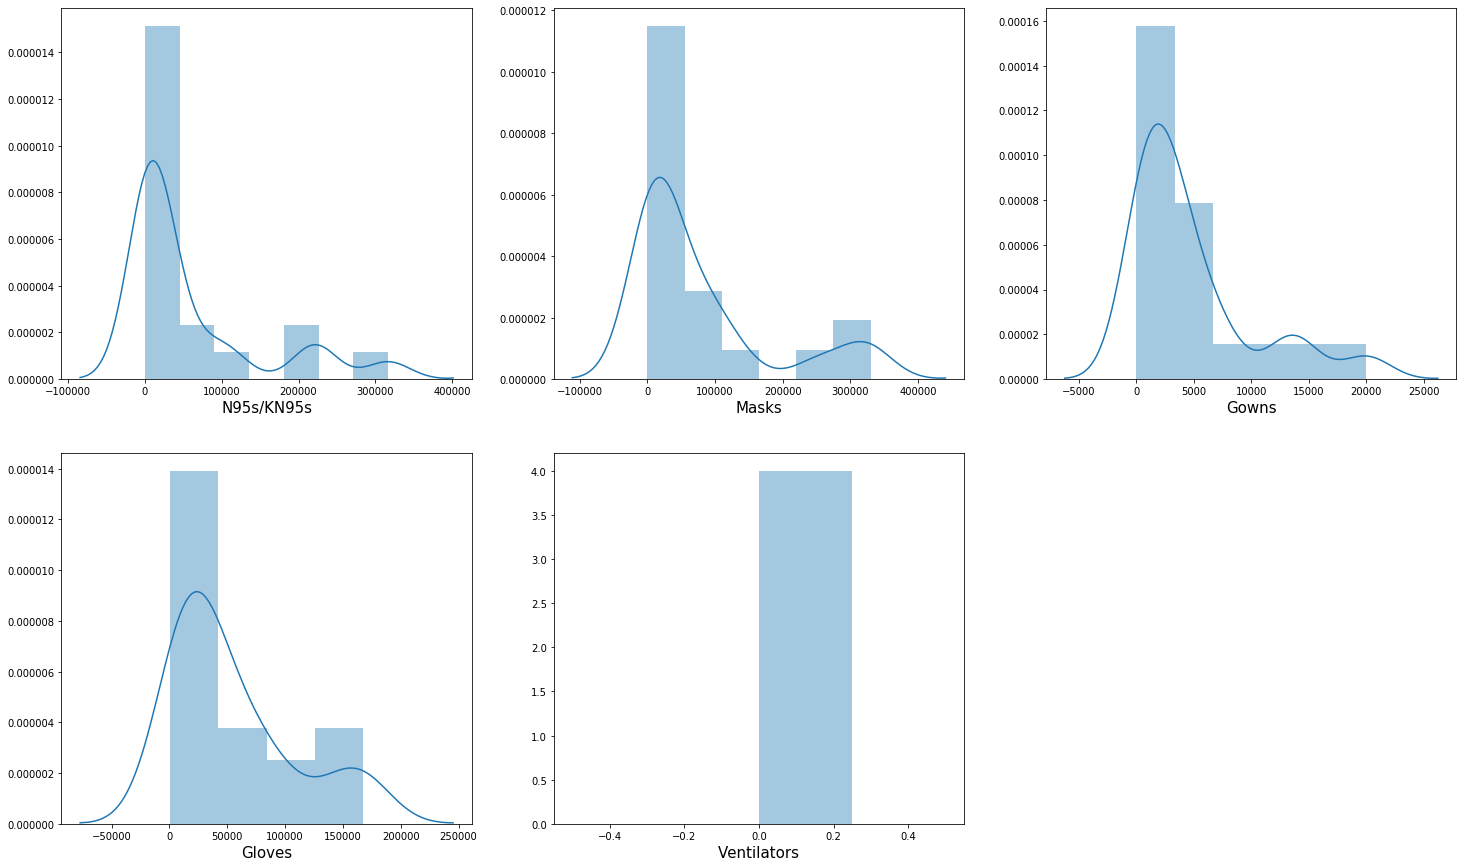

In [3]:
SM = df.loc[df['Region']=='Southeastern Massachusetts']
SM_CC = SM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    SM_CC['{} %'.format(category)] = SM_CC[category]/SM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(SM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
SM_CC

Distplot of PPE Growth

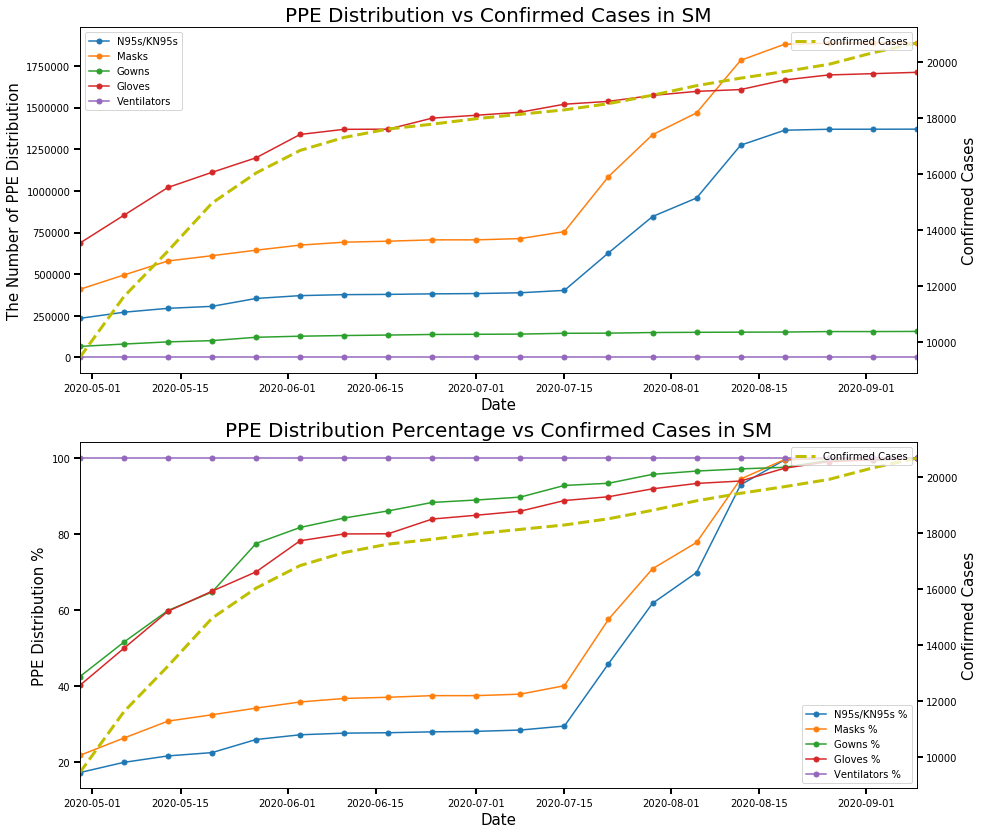

In [4]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=SM_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 9,9)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in SM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=SM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=SM_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 9,9)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in SM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=SM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    SM_CC['{} Ratio 1'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
SM_CC['Confirmed Cases(ma1)'] = SM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
SM_CC.iloc[0,-1] = (6065 + 9446) / 2
for category in categories:
    SM_CC['{} Ratio 2'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
SM_CC['Confirmed Cases(ma2)'] = SM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    SM_CC['{} Ratio 3'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
SM_CC['Confirmed Cases(ma3)'] = SM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
SM_CC.iloc[0,-1] = (6065+9446+11616)/3
for category in categories:
    SM_CC['{} Ratio 4'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    SM_CC['{} Ratio 5'.format(category)] = SM_CC[category].diff()/SM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    SM_CC['{} Ratio 6'.format(category)] = SM_CC[category].diff()/SM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
# SM_CC

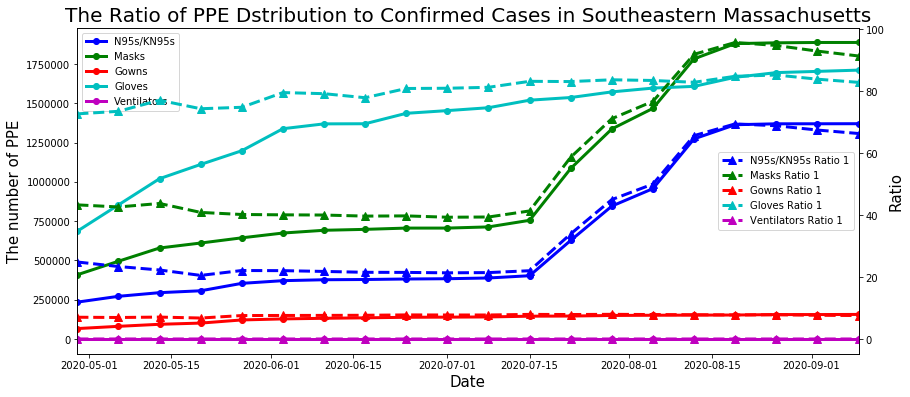

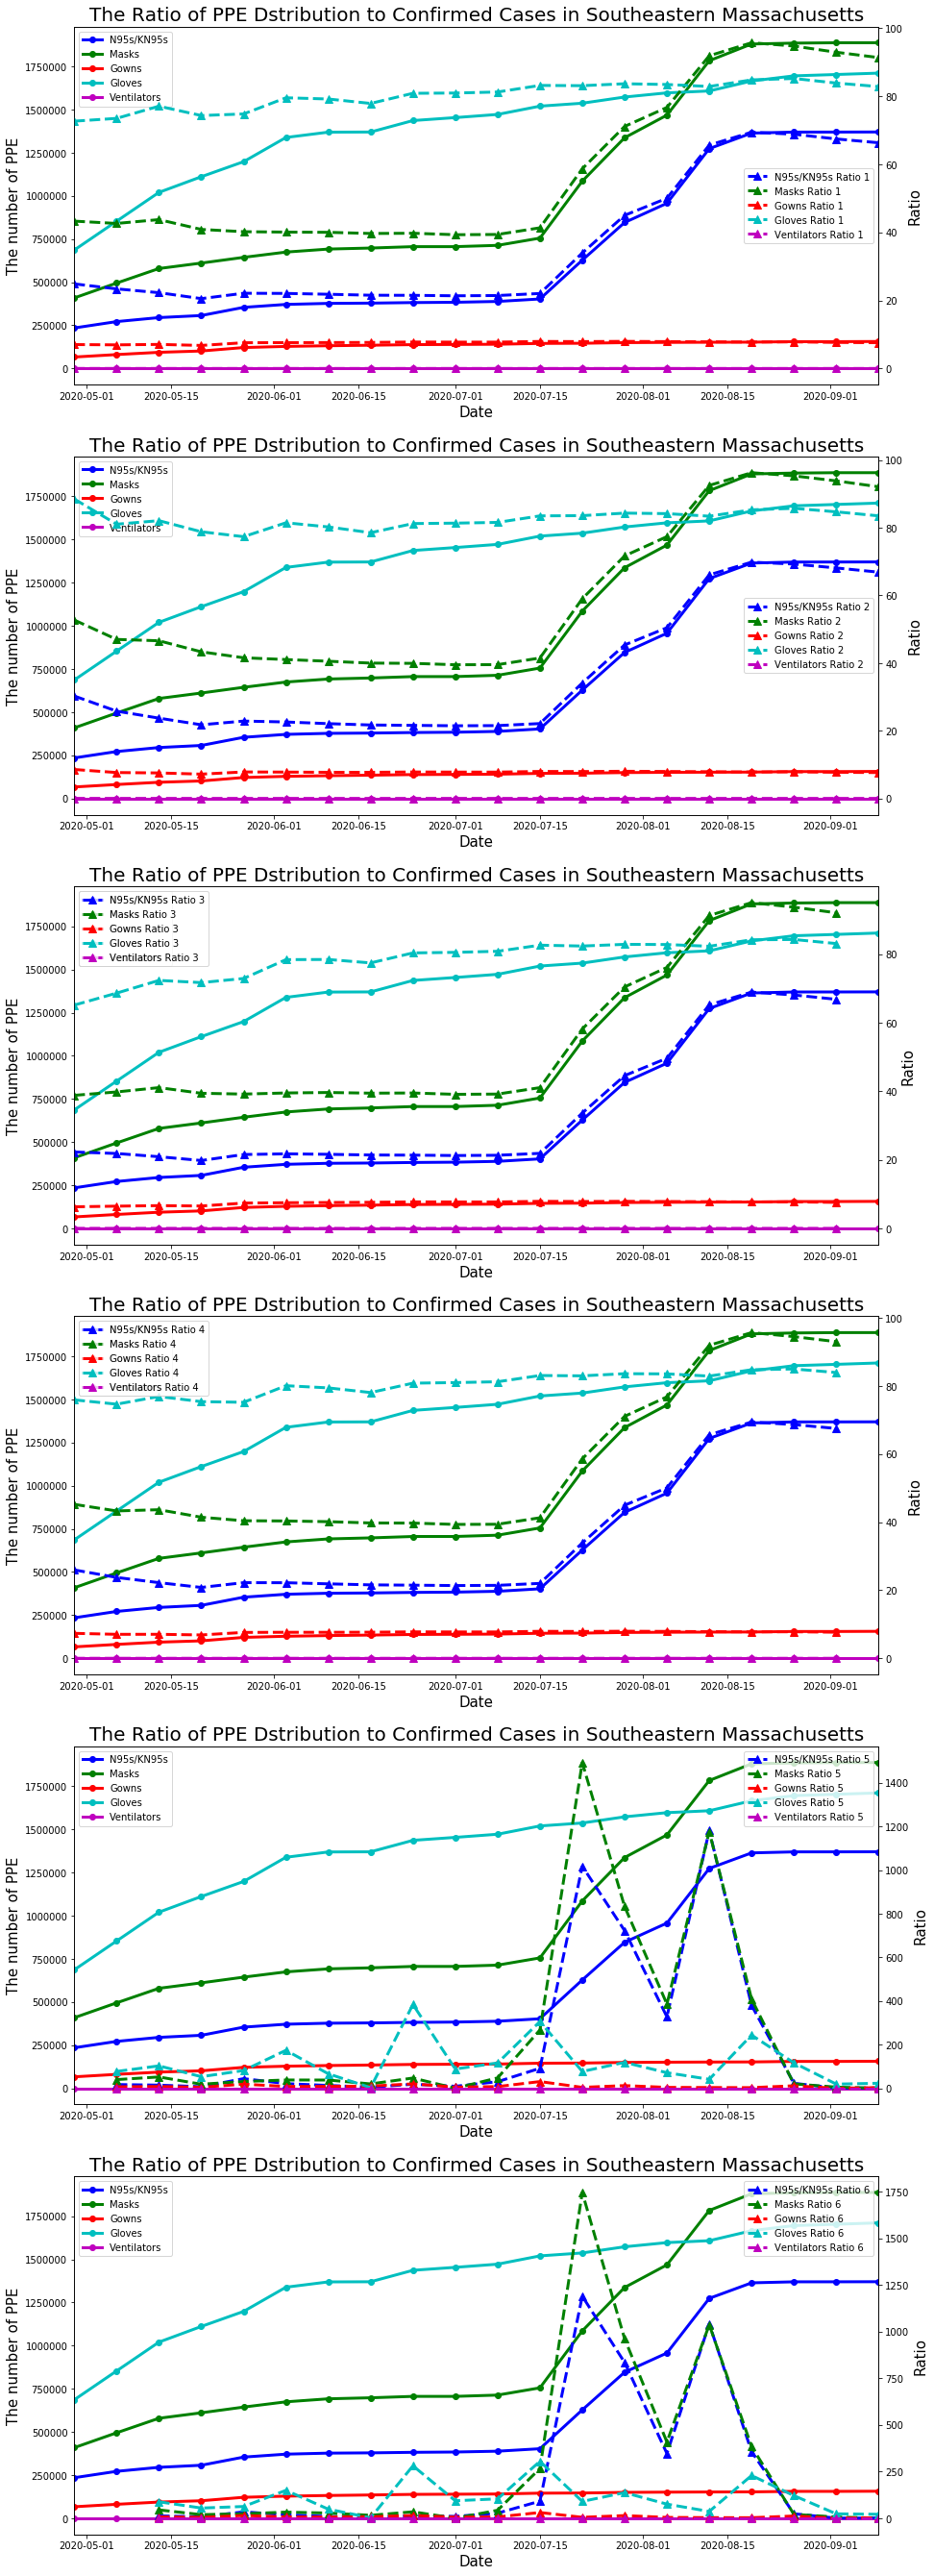

In [6]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, ax = plt.subplots(1,1,figsize=(14, 6))
color = ['b', 'g', 'r', 'c', 'm']

for category in categories:
    ax.plot('Time', category, data=SM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('The number of PPE', fontsize=15)
    ax.set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 9,9)])
    ax.legend(loc='best')
    ax.set_title('The Ratio of PPE Dstribution to Confirmed Cases in Southeastern Massachusetts', fontsize=20)
ax1 = ax.twinx()
for ratio in RATIO1:
    ax1.plot('Time', ratio, data=SM_CC, color=color[RATIO1.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
    ax1.set_ylabel('Ratio', fontsize=15)
    ax1.legend(loc='best')
plt.show()

         
         
fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']

for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=SM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Southeastern Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=SM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot(delta vs delta)')

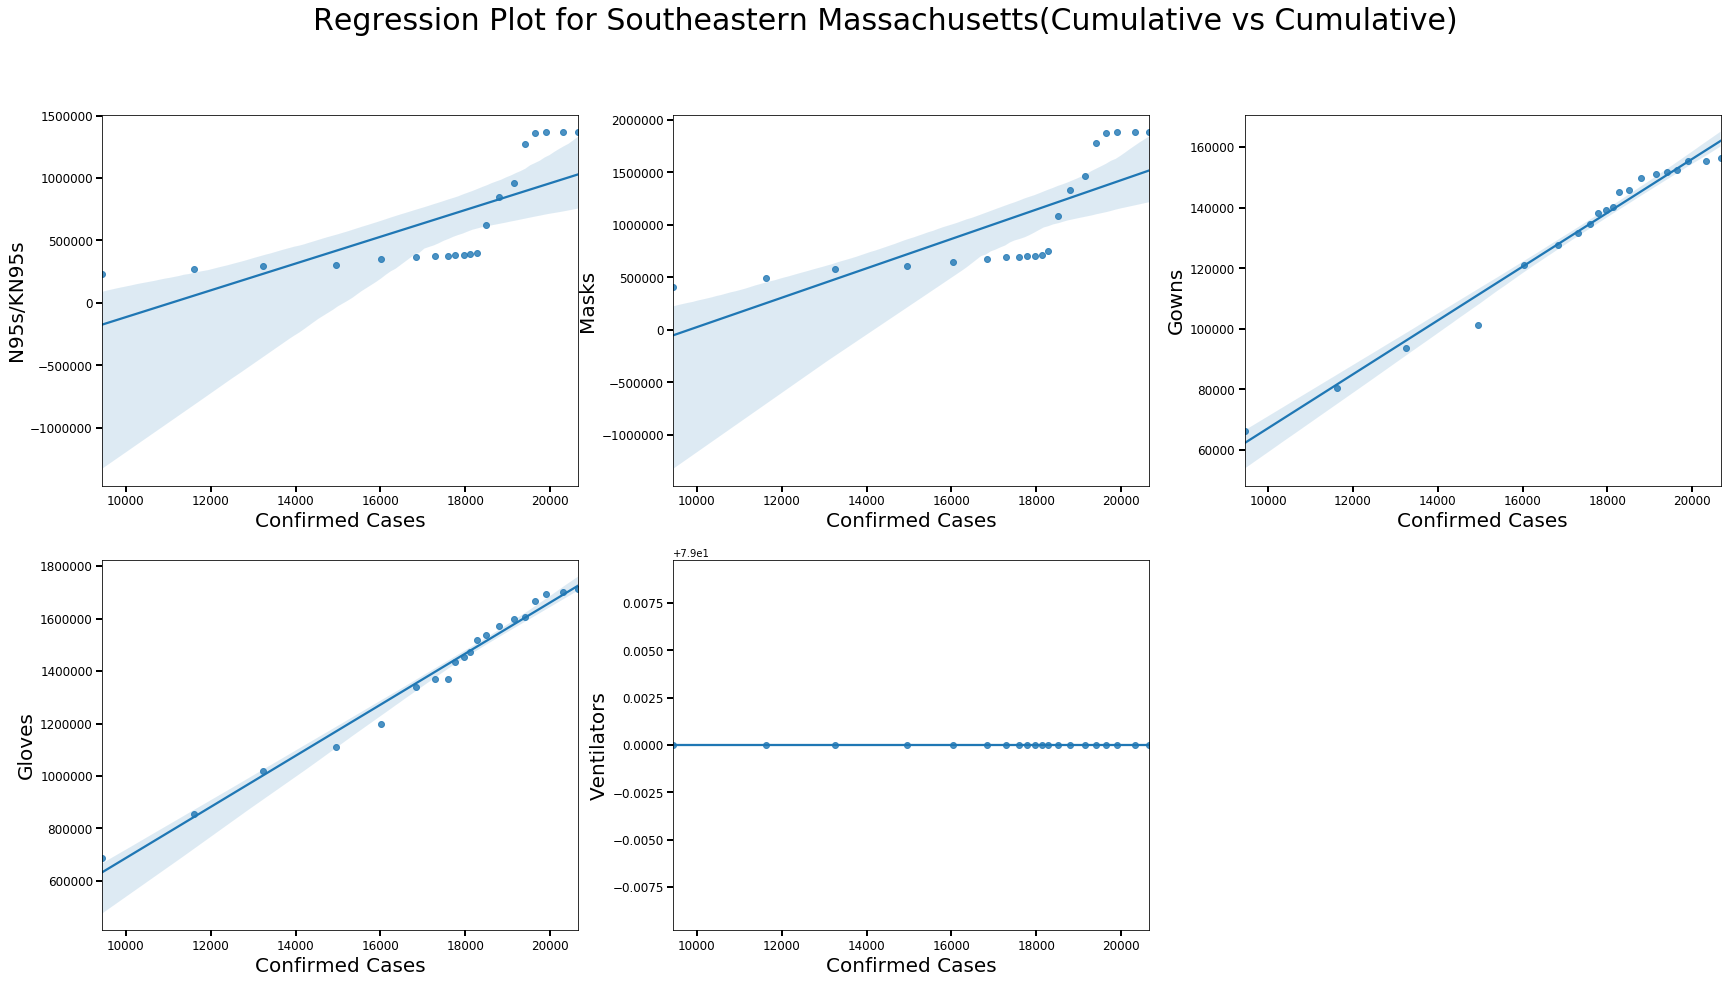

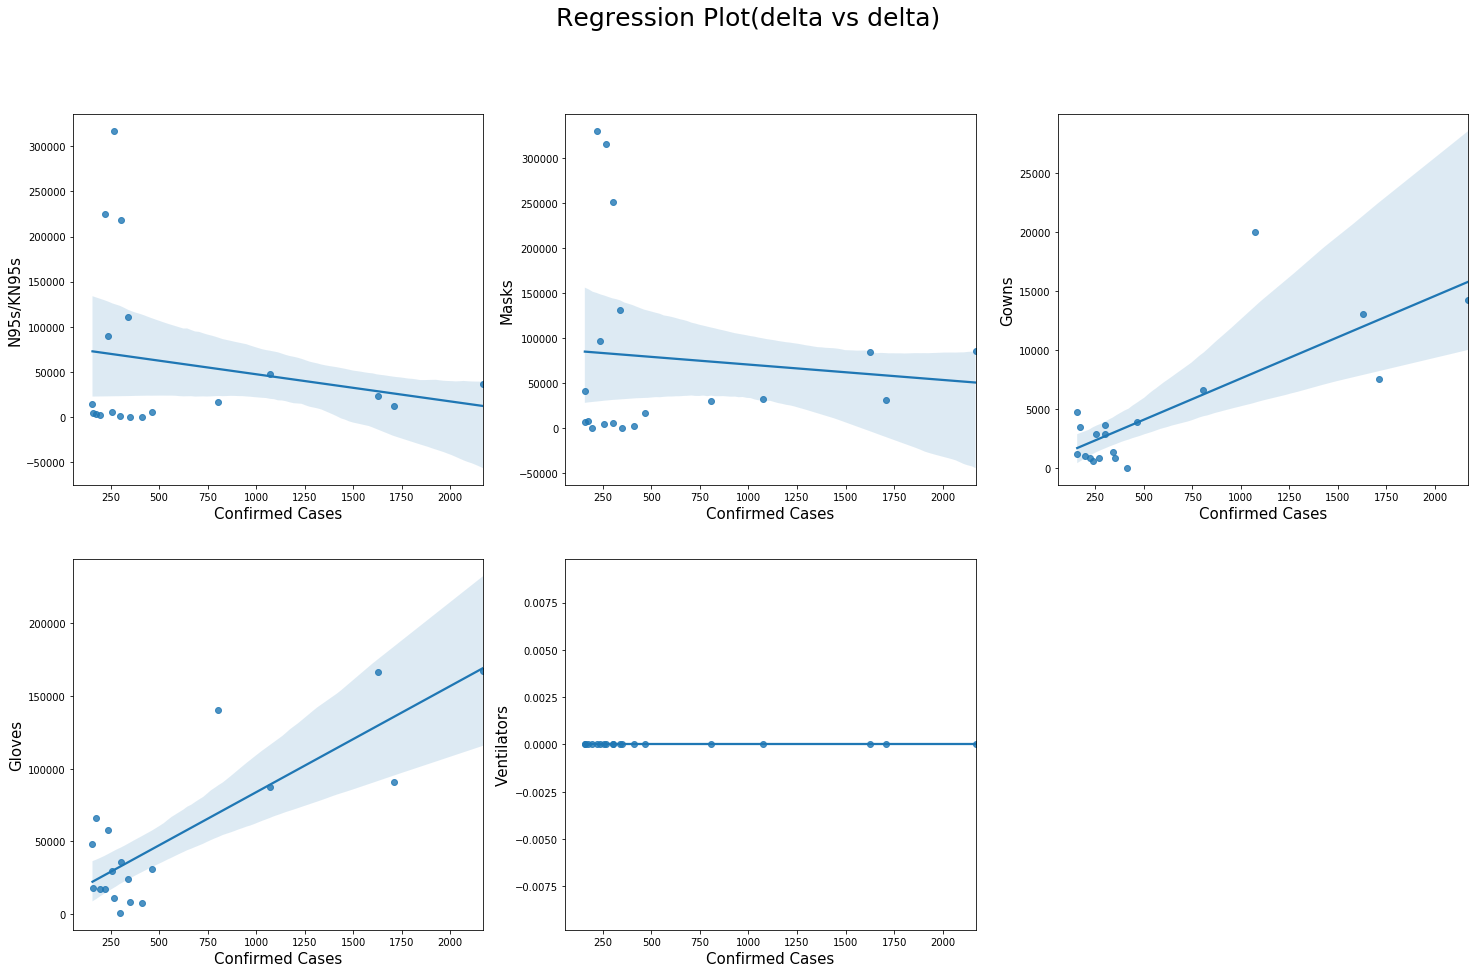

In [7]:
for category in categories:
    SM_CC['{} delta'.format(category)] = SM_CC[category].diff()
    SM_CC['Confirmed Cases delta'] = SM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(29,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=SM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=20)
    ax.set_ylabel(category, fontsize=20)
    ax.tick_params(direction='out', length=6, width=2, labelsize=12)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot for Southeastern Massachusetts(Cumulative vs Cumulative)', fontsize=30)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=SM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot(delta vs delta)', fontsize=25)



In [8]:
# Regression Analysis
import statsmodels.api as sm

Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = SM_CC[category]
    X[categories.index(category)] = SM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     18.51
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           0.000429
Time:                        20:58:00   Log-Likelihood:                -280.81
No. Observations:                  20   AIC:                             565.6
Df Residuals:                      18   BIC:                             567.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.186e+06   4.36e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Northeastern Massachusetts
### Northeastern Massachusetts is the region with the most confirmed cases number.

Time                      Region   N95s/KN95s      Masks    Gowns  \
132 2020-04-29  Northeastern Massachusetts   113720.000   226198.0  22974.0   
139 2020-05-06  Northeastern Massachusetts   144600.000   260413.0  27849.0   
146 2020-05-13  Northeastern Massachusetts   158983.000   297113.0  32024.0   
153 2020-05-20  Northeastern Massachusetts   164193.000   320263.0  35174.0   
160 2020-05-27  Northeastern Massachusetts   186775.000   339663.0  40604.0   
161 2020-06-03  Northeastern Massachusetts   193712.000   366013.0  42635.0   
162 2020-06-10  Northeastern Massachusetts   196071.000   375913.0  46315.0   
163 2020-06-17  Northeastern Massachusetts   198897.000   385913.0  49195.0   
164 2020-06-24  Northeastern Massachusetts   200936.000   390163.0  50520.0   
165 2020-07-01  Northeastern Massachusetts   201506.000   391063.0  50870.0   
166 2020-07-08  Northeastern Massachusetts   202526.000   392663.0  51370.0   
167 2020-07-15  Northeastern Massachusetts   207526.000   442163.0  52670.0   
168 2020-07-22  Northeastern Massachusetts   575436.000   857263.0  55670.0   
169 2020-07-29  Northeastern Massachusetts   876266.000  1225163.0  55820.0   
170 2020-08-05  Northeastern Massachusetts   891786.000  1242163.0  55920.0   
171 2020-08-12  Northeastern Massachusetts  1119236.000  1473313.0  56270.0   
172 2020-08-19  Northeastern Massachusetts  1289776.000  1643613.0  56470.0   
173 2020-08-26  Northeastern Massachusetts  1292496.000  1643613.0  56720.0   
174 2020-09-02  Northeastern Massachusetts  1292996.000  1648613.0  56770.0   
175 2020-09-09  Northeastern Massachusetts  1293465.941  1648913.0  56770.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
132  335932.0        117.0          14920.0      8.791882   13.718007   
139  427832.0        117.0          18056.0     11.179266   15.793010   
146  514032.0        117.0          20158.0     12.291240   18.018719   
153  559032.0        117.0          22088.0     12.694034   19.422674   
160  614332.0        117.0          23370.0     14.439885   20.599207   
161  688832.0        117.0          24334.0     14.976196   22.197229   
162  700832.0        117.0          25003.0     15.158575   22.797625   
163  703632.0        117.0          25424.0     15.377057   23.404085   
164  726632.0        117.0          25734.0     15.534696   23.661831   
165  730632.0        117.0          26022.0     15.578764   23.716412   
166  731132.0        117.0          26316.0     15.657621   23.813446   
167  739632.0        117.0          26659.0     16.044180   26.815423   
168  744632.0        117.0          26969.0     44.487913   51.989583   
169  744632.0        117.0          27346.0     67.745580   74.301252   
170  746632.0        117.0          27934.0     68.945457   75.332234   
171  761992.0        117.0          28416.0     86.529994   89.350560   
172  771952.0        117.0          28909.0     99.714725   99.678576   
173  783952.0        117.0          29416.0     99.925012   99.678576   
174  783952.0        117.0          29972.0     99.963668   99.981806   
175  783952.0        117.0          30541.0    100.000000  100.000000   

        Gowns %    Gloves %  Ventilators %  
132   40.468557   42.851093          100.0  
139   49.055839   54.573749          100.0  
146   56.410076   65.569321          100.0  
153   61.958781   71.309468          100.0  
160   71.523692   78.363471          100.0  
161   75.101286   87.866604          100.0  
162   81.583583   89.397310          100.0  
163   86.656685   89.754475          100.0  
164   88.990664   92.688328          100.0  
165   89.607187   93.198563          100.0  
166   90.487934   93.262343          100.0  
167   92.777876   94.346593          100.0  
168   98.062357   94.984387          100.0  
169   98.326581   94.984387          100.0  
170   98.502730   95.239504          100.0  
171   99.119253   97.198808          100.0  
172   99.471552   98.469294          100.0  
173   

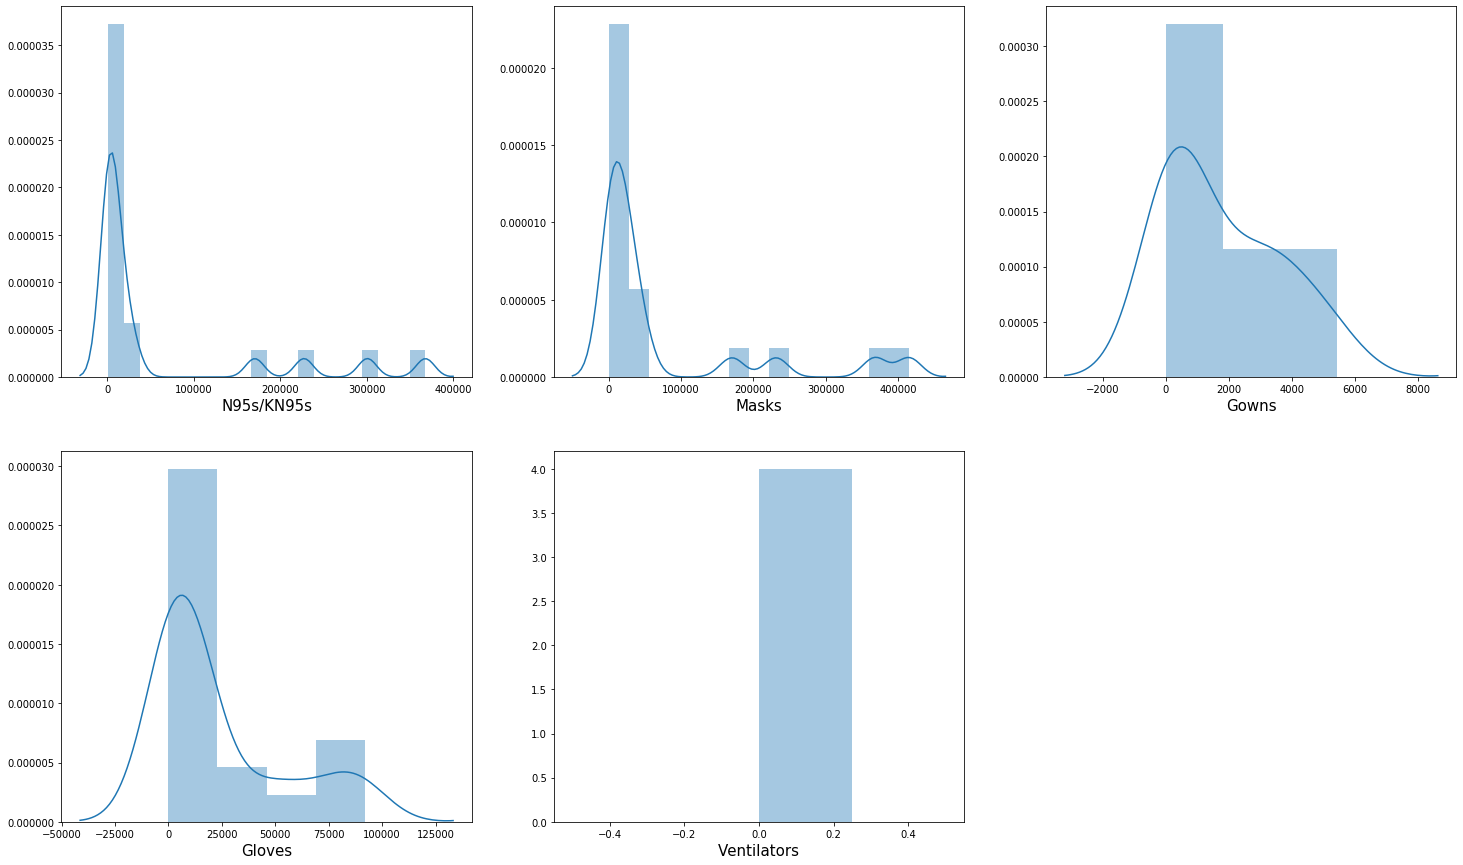

In [9]:
NM = df.loc[df['Region']=='Northeastern Massachusetts']
NM_CC = NM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    NM_CC['{} %'.format(category)] = NM_CC[category]/NM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(NM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
NM_CC

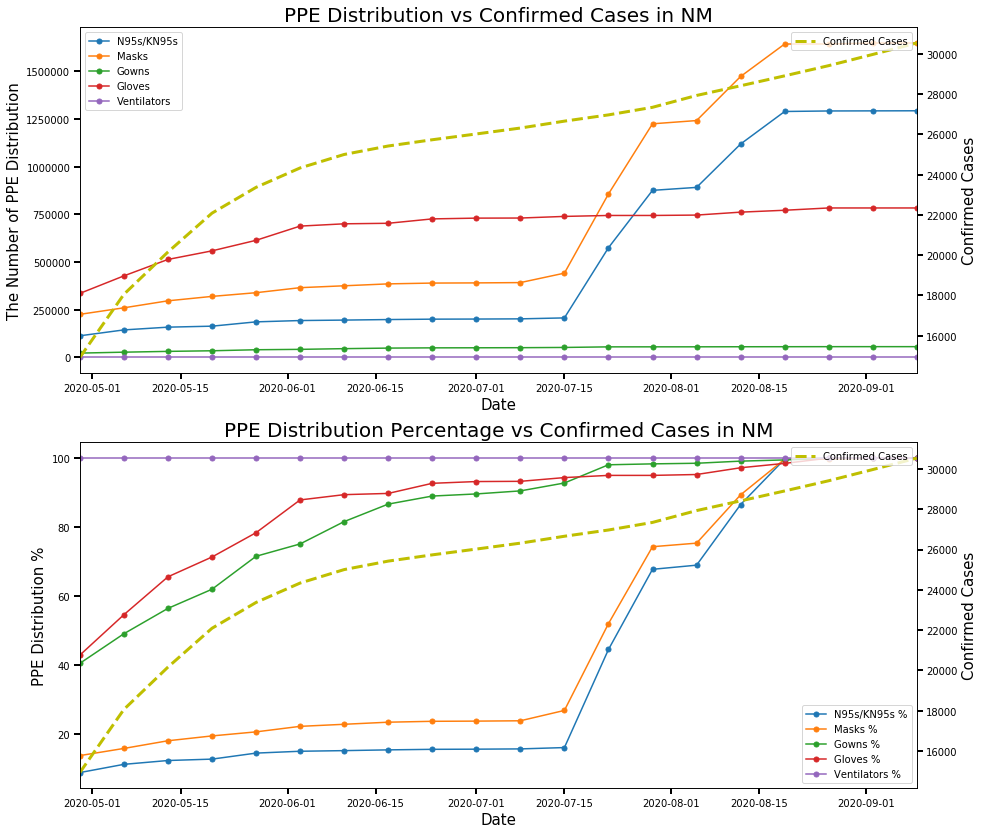

In [10]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=NM_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in NM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=NM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=NM_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in NM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=NM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [11]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    NM_CC['{} Ratio 1'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
NM_CC['Confirmed Cases(ma1)'] = NM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
NM_CC.iloc[0,-1] = (10641+14920) / 2
for category in categories:
    NM_CC['{} Ratio 2'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
NM_CC['Confirmed Cases(ma2)'] = NM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    NM_CC['{} Ratio 3'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
NM_CC['Confirmed Cases(ma3)'] = NM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
NM_CC.iloc[0,-1] = (10641+14920+18056)/3
for category in categories:
    NM_CC['{} Ratio 4'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    NM_CC['{} Ratio 5'.format(category)] = NM_CC[category].diff()/NM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    NM_CC['{} Ratio 6'.format(category)] = NM_CC[category].diff()/NM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
NM_CC

Time                      Region   N95s/KN95s      Masks    Gowns  \
132 2020-04-29  Northeastern Massachusetts   113720.000   226198.0  22974.0   
139 2020-05-06  Northeastern Massachusetts   144600.000   260413.0  27849.0   
146 2020-05-13  Northeastern Massachusetts   158983.000   297113.0  32024.0   
153 2020-05-20  Northeastern Massachusetts   164193.000   320263.0  35174.0   
160 2020-05-27  Northeastern Massachusetts   186775.000   339663.0  40604.0   
161 2020-06-03  Northeastern Massachusetts   193712.000   366013.0  42635.0   
162 2020-06-10  Northeastern Massachusetts   196071.000   375913.0  46315.0   
163 2020-06-17  Northeastern Massachusetts   198897.000   385913.0  49195.0   
164 2020-06-24  Northeastern Massachusetts   200936.000   390163.0  50520.0   
165 2020-07-01  Northeastern Massachusetts   201506.000   391063.0  50870.0   
166 2020-07-08  Northeastern Massachusetts   202526.000   392663.0  51370.0   
167 2020-07-15  Northeastern Massachusetts   207526.000   442163.0  52670.0   
168 2020-07-22  Northeastern Massachusetts   575436.000   857263.0  55670.0   
169 2020-07-29  Northeastern Massachusetts   876266.000  1225163.0  55820.0   
170 2020-08-05  Northeastern Massachusetts   891786.000  1242163.0  55920.0   
171 2020-08-12  Northeastern Massachusetts  1119236.000  1473313.0  56270.0   
172 2020-08-19  Northeastern Massachusetts  1289776.000  1643613.0  56470.0   
173 2020-08-26  Northeastern Massachusetts  1292496.000  1643613.0  56720.0   
174 2020-09-02  Northeastern Massachusetts  1292996.000  1648613.0  56770.0   
175 2020-09-09  Northeastern Massachusetts  1293465.941  1648913.0  56770.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
132  335932.0        117.0          14920.0      8.791882   13.718007   
139  427832.0        117.0          18056.0     11.179266   15.793010   
146  514032.0        117.0          20158.0     12.291240   18.018719   
153  559032.0        117.0          22088.0     12.694034   19.422674   
160  614332.0        117.0          23370.0     14.439885   20.599207   
161  688832.0        117.0          24334.0     14.976196   22.197229   
162  700832.0        117.0          25003.0     15.158575   22.797625   
163  703632.0        117.0          25424.0     15.377057   23.404085   
164  726632.0        117.0          25734.0     15.534696   23.661831   
165  730632.0        117.0          26022.0     15.578764   23.716412   
166  731132.0        117.0          26316.0     15.657621   23.813446   
167  739632.0        117.0          26659.0     16.044180   26.815423   
168  744632.0        117.0          26969.0     44.487913   51.989583   
169  744632.0        117.0          27346.0     67.745580   74.301252   
170  746632.0        117.0          27934.0     68.945457   75.332234   
171  761992.0        117.0          28416.0     86.529994   89.350560   
172  771952.0        117.0          28909.0     99.714725   99.678576   
173  783952.0        117.0          29416.0     99.925012   99.678576   
174  783952.0        117.0          29972.0     99.963668   99.981806   
175  783952.0        117.0          30541.0    100.000000  100.000000   

        Gowns %    Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
132   40.468557   42.851093          100.0            7.621984      15.160724   
139   49.055839   54.573749          100.0            8.008418      14.422519   
146   56.410076   65.569321          100.0            7.886844      14.739210   
153   61.958781   71.309468          100.0            7.433584      14.499411   
160   71.523692   78.363471          100.0            7.992084      14.534146   
161   75.101286   87.866604          100.0            7.960549      15.041218   
162   81.583583   89.397310          100.0            7.841899      15.034716   
163   86.656685   89.754475          100.0            7.823199      15.179083   
164   88.990664   92.688328          100.0            7.808191      15.161382   
165   

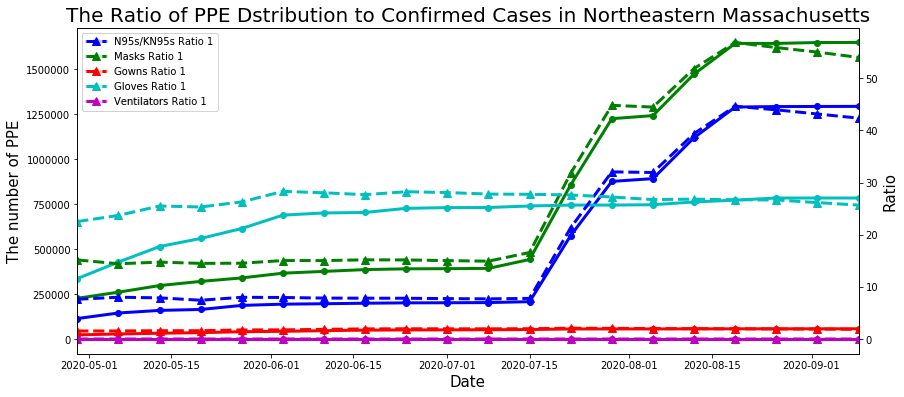

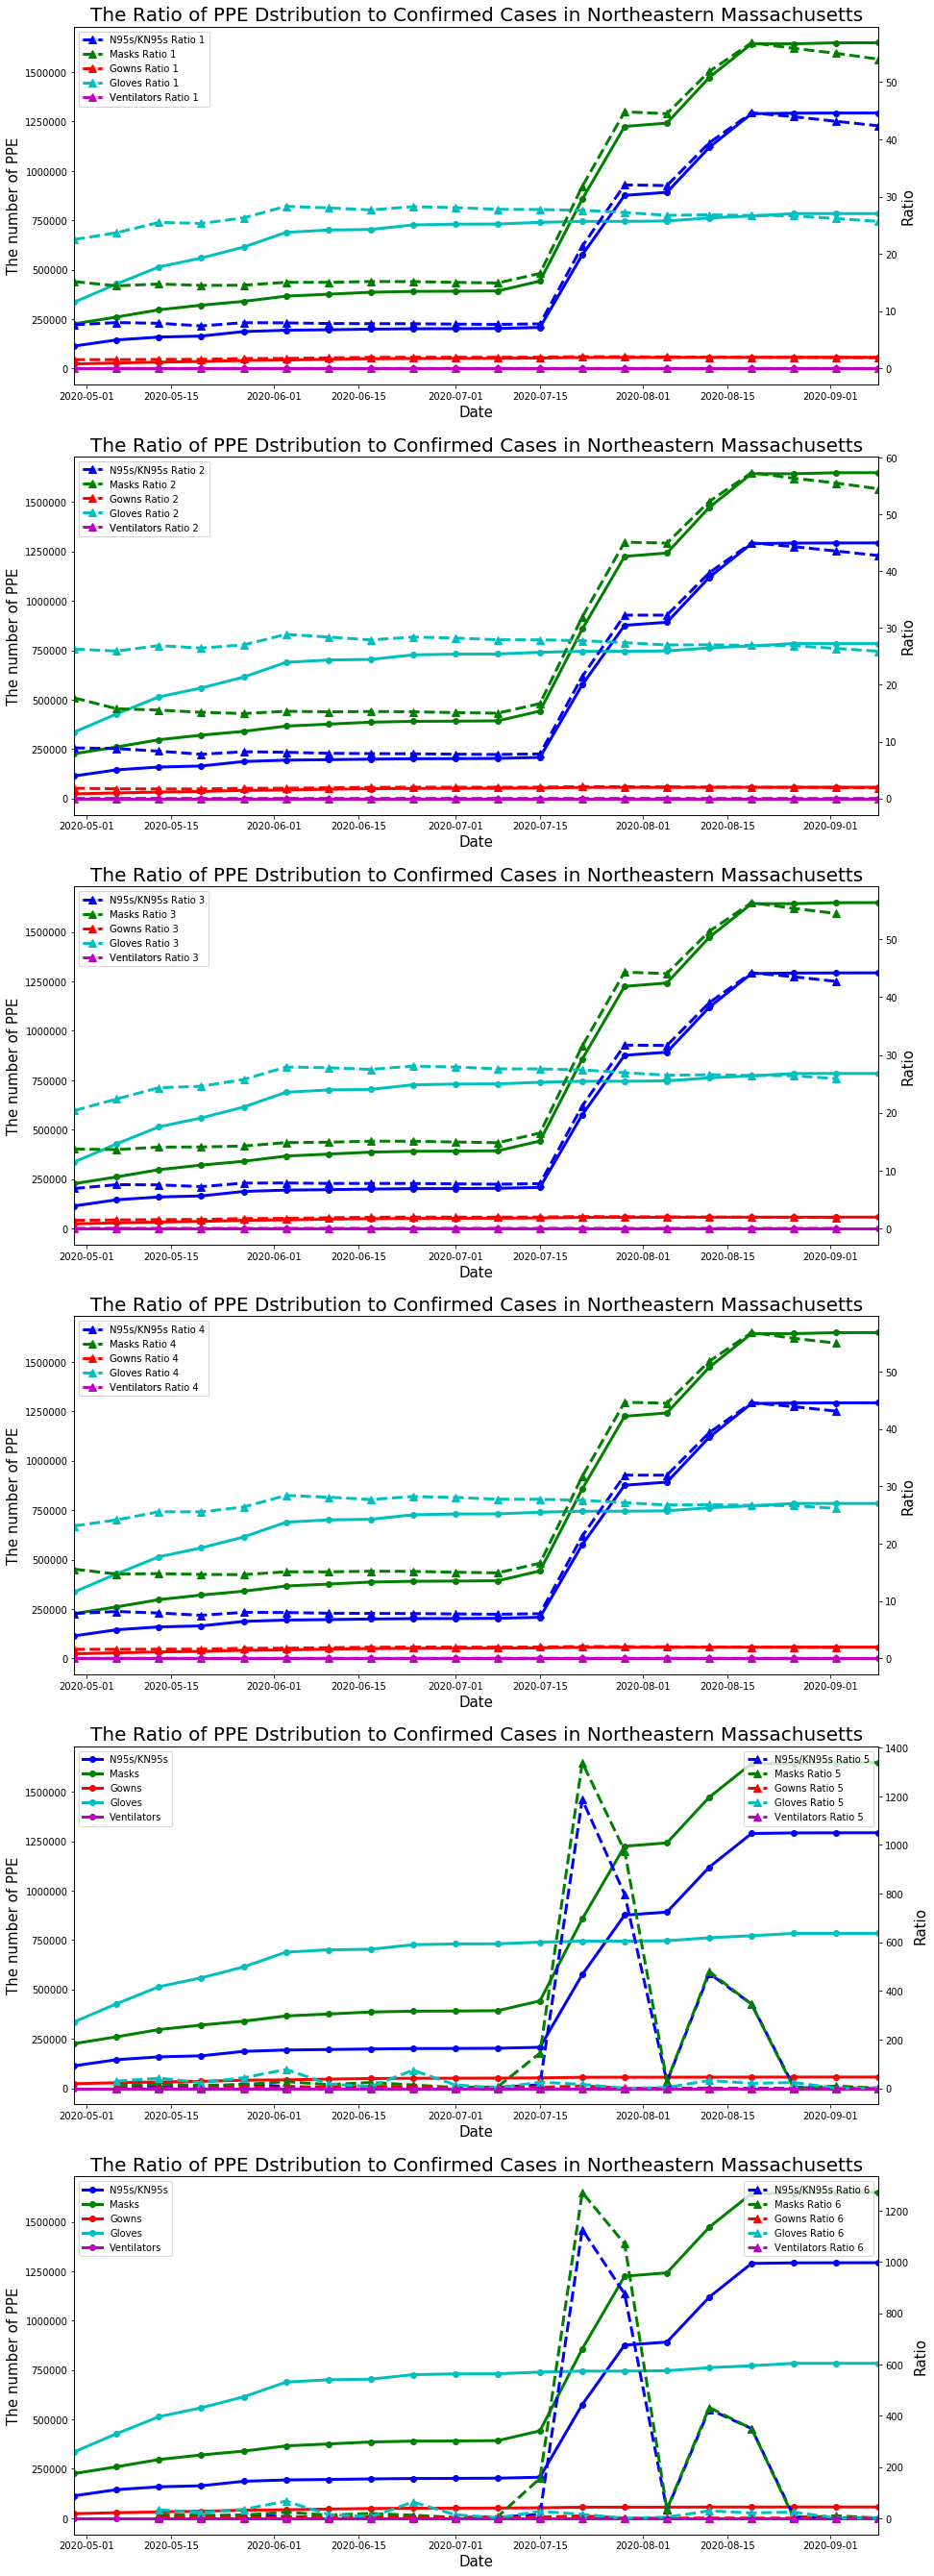

In [12]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))
        
fig, ax = plt.subplots(1,1,figsize=(14, 6))
color = ['b', 'g', 'r', 'c', 'm']

for category in categories:
    ax.plot('Time', category, data=NM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('The number of PPE', fontsize=15)
    ax.set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
    ax.legend(loc='best')
    ax.set_title('The Ratio of PPE Dstribution to Confirmed Cases in Northeastern Massachusetts', fontsize=20)
ax1 = ax.twinx()
for ratio in RATIO1:
    ax1.plot('Time', ratio, data=NM_CC, color=color[RATIO1.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
    ax1.set_ylabel('Ratio', fontsize=15)
    ax1.legend(loc='best')
plt.show()



fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=NM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Northeastern Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=NM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

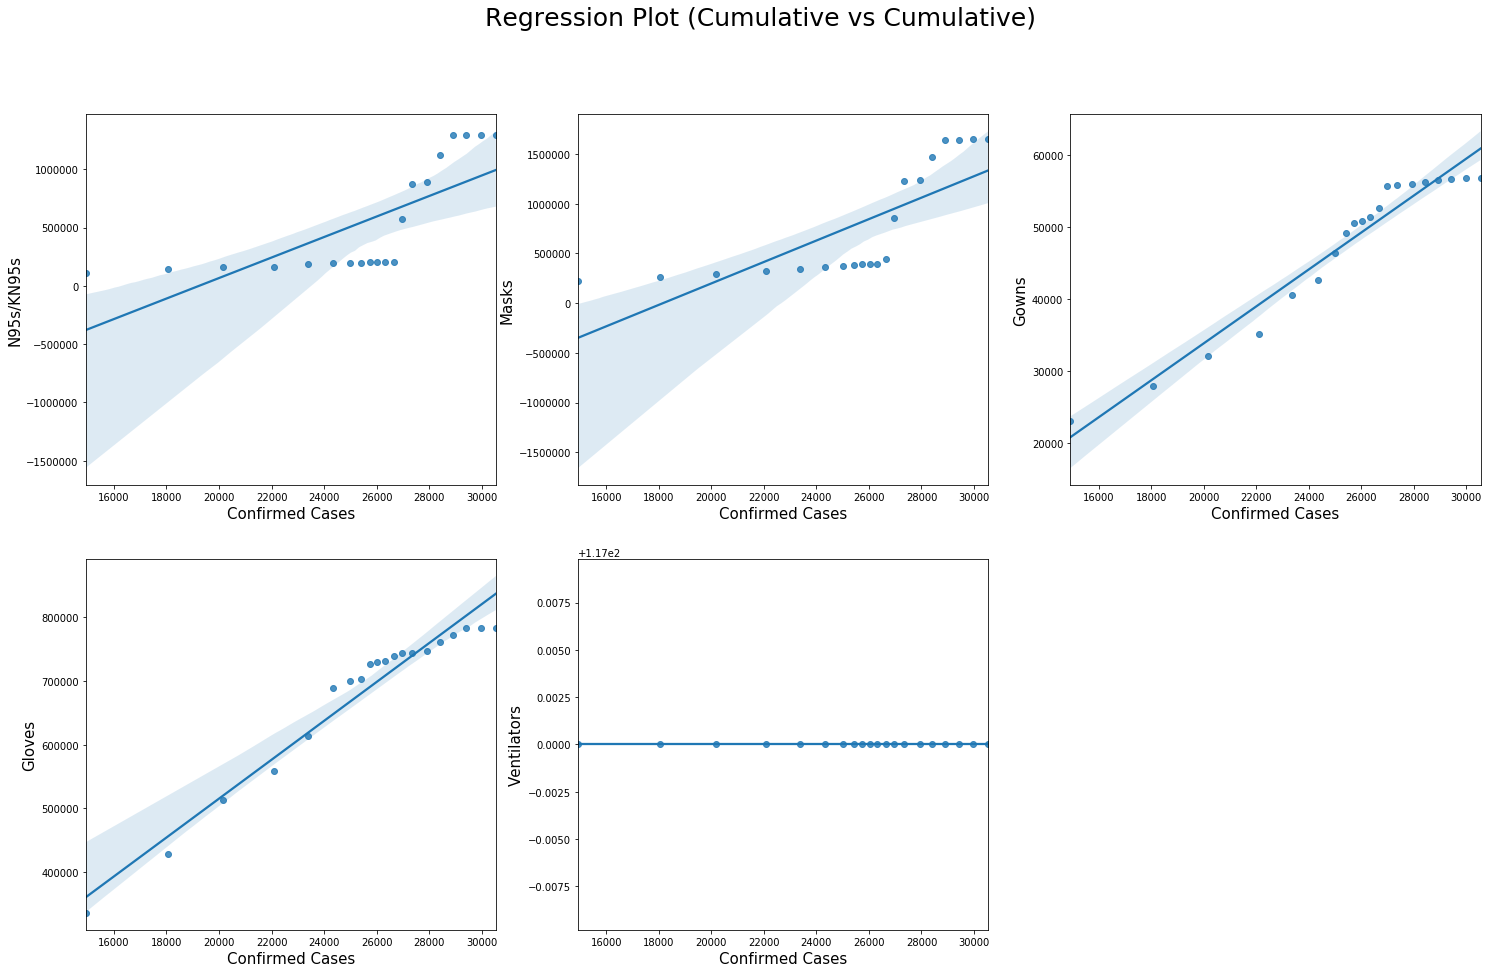

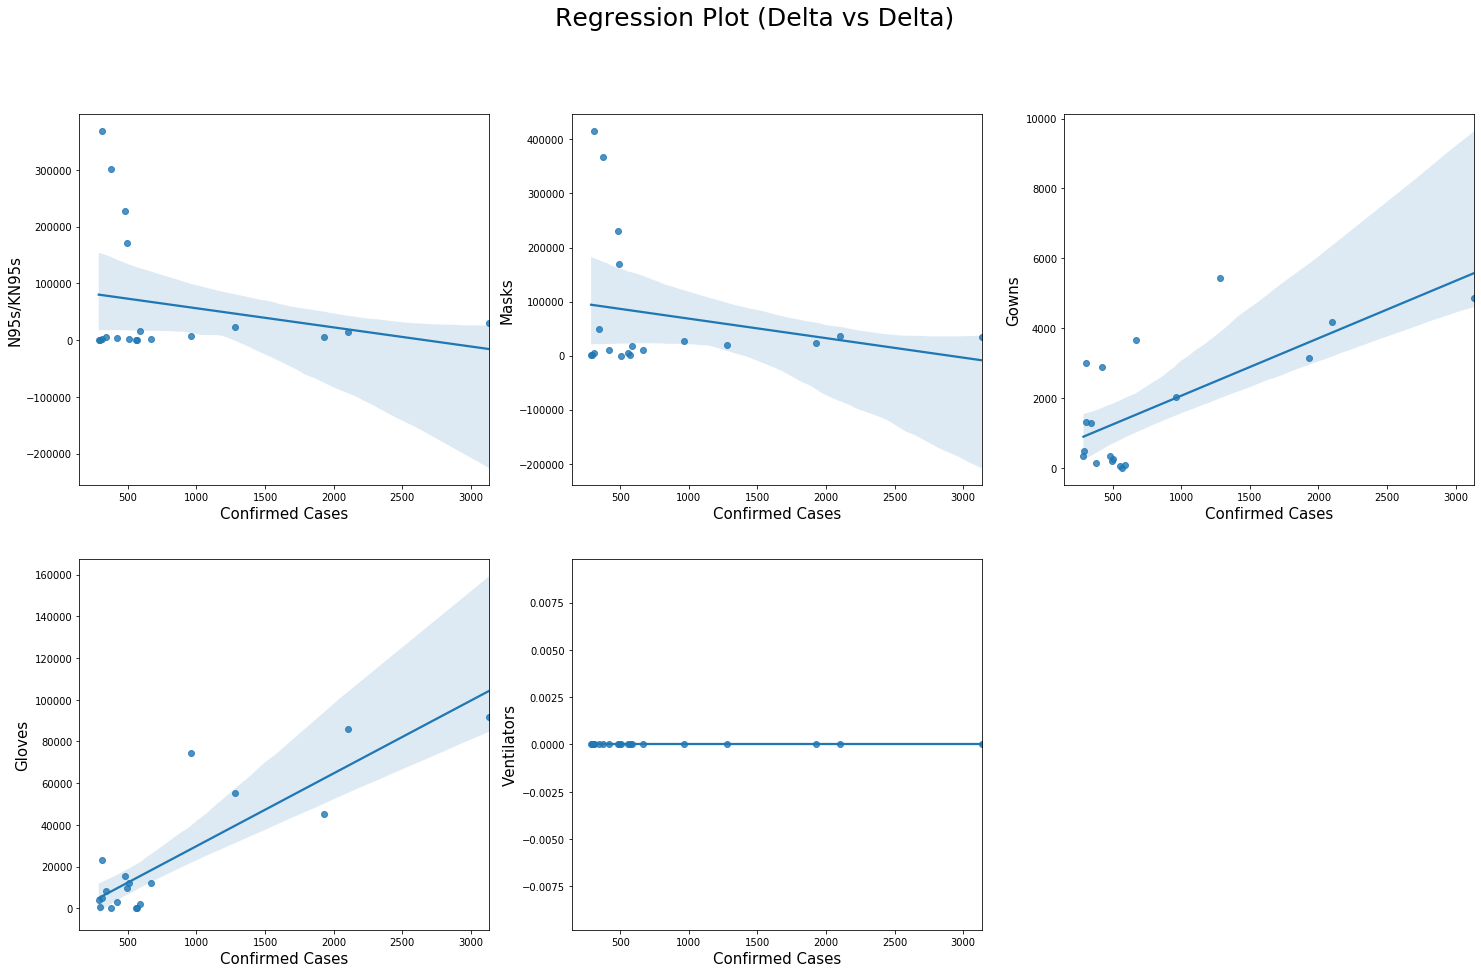

In [13]:
for category in categories:
    NM_CC['{} delta'.format(category)] = NM_CC[category].diff()
    NM_CC['Confirmed Cases delta'] = NM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=NM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=NM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [14]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = NM_CC[category]
    X[categories.index(category)] = NM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     21.32
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           0.000214
Time:                        20:58:07   Log-Likelihood:                -281.72
No. Observations:                  20   AIC:                             567.4
Df Residuals:                      18   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.692e+06   4.89e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Metro West
### Metro West is the region with the most deaths number.

Time      Region   N95s/KN95s      Masks     Gowns     Gloves  \
88  2020-04-29  Metro West   212466.000   373412.0   50610.0   372180.0   
95  2020-05-06  Metro West   292073.000   475762.0   55812.0   592330.0   
102 2020-05-13  Metro West   336159.000   564732.0   71127.0   701630.0   
109 2020-05-20  Metro West   380619.000   610582.0   88237.0   870902.0   
116 2020-05-27  Metro West   449855.000   661482.0  128047.0   977602.0   
117 2020-06-03  Metro West   463396.000   687532.0  135759.0  1052774.0   
118 2020-06-10  Metro West   479836.000   722682.0  145989.0  1121074.0   
119 2020-06-17  Metro West   486648.000   724682.0  148709.0  1182274.0   
120 2020-06-24  Metro West   514245.000   730682.0  150139.0  1188574.0   
121 2020-07-01  Metro West   516985.000   737682.0  154039.0  1233574.0   
122 2020-07-08  Metro West   518680.000   737682.0  160914.0  1246574.0   
123 2020-07-15  Metro West   535320.000   783032.0  162441.0  1319174.0   
124 2020-07-22  Metro West   978560.000  1232432.0  163441.0  1319574.0   
125 2020-07-29  Metro West  1221330.000  1510082.0  169731.0  1358574.0   
126 2020-08-05  Metro West  1229780.000  1538182.0  172781.0  1368374.0   
127 2020-08-12  Metro West  1555340.000  1880582.0  173181.0  1379534.0   
128 2020-08-19  Metro West  1751980.000  2076382.0  177881.0  1397406.0   
129 2020-08-26  Metro West  1759100.000  2100882.0  180031.0  1431206.0   
130 2020-09-02  Metro West  1759850.000  2100982.0  184681.0  1439806.0   
131 2020-09-09  Metro West  1760360.188  2101182.0  185231.0  1440406.0   

     Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
88         136.0          12601.0     12.069462   17.771521   27.322640   
95         136.0          14825.0     16.591661   22.642589   30.131026   
102        136.0          16491.0     19.096035   26.876872   38.399080   
109        136.0          17755.0     21.621655   29.058977   47.636195   
116        136.0          18580.0     25.554713   31.481423   69.128278   
117        136.0          19245.0     26.323931   32.721202   73.291728   
118        136.0          19490.0     27.257831   34.394070   78.814561   
119        136.0          19706.0     27.644797   34.489254   80.282998   
120        136.0          19906.0     29.212488   34.774808   81.055007   
121        136.0          20047.0     29.368137   35.107954   83.160486   
122        136.0          20195.0     29.464425   35.107954   86.872068   
123        136.0          20346.0     30.409686   37.266263   87.696444   
124        136.0          20589.0     55.588624   58.654224   88.236310   
125        136.0          20880.0     69.379551   71.868215   91.632070   
126        136.0          21274.0     69.859567   73.205558   93.278663   
127        136.0          21530.0     88.353509   89.501147   93.494609   
128        136.0          21831.0     99.523950   98.819712   96.031982   
129        136.0          22179.0     99.928413   99.985722   97.192695   
130        136.0          22598.0     99.971018   99.990482   99.703073   
131        136.0          22949.0    100.000000  100.000000  100.000000   

       Gloves %  Ventilators %  
88    25.838548          100.0  
95    41.122434          100.0  
102   48.710572          100.0  
109   60.462259          100.0  
116   67.869892          100.0  
117   73.088699          100.0  
118   77.830417          100.0  
119   82.079219          100.0  
120   82.516596          100.0  
121   85.640715          100.0  
122   86.543239          100.0  
123   91.583484          100.0  
124   91.611254          100.0  
125   94.318824          100.0  
126   94.999188          100.0  
127   95.773969          100.0  
128   97.014731          100.0  
129   99.361291          100.0  
130   99.958345          100.0  
131  100.000000          100.0

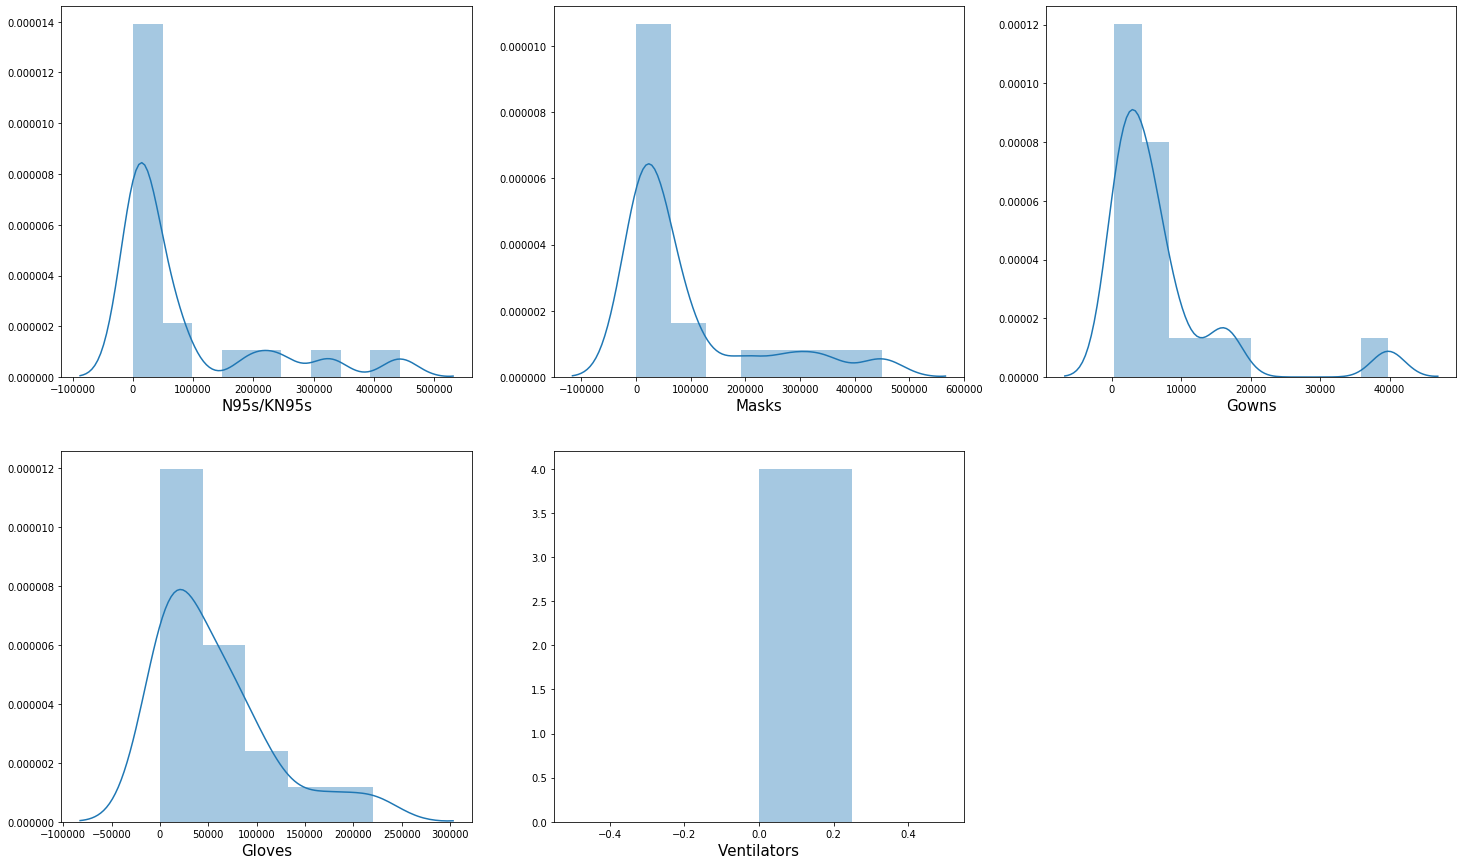

In [15]:
MW = df.loc[df['Region']=='Metro West']
MW_CC = MW.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    MW_CC['{} %'.format(category)] = MW_CC[category]/MW_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(MW_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
MW_CC

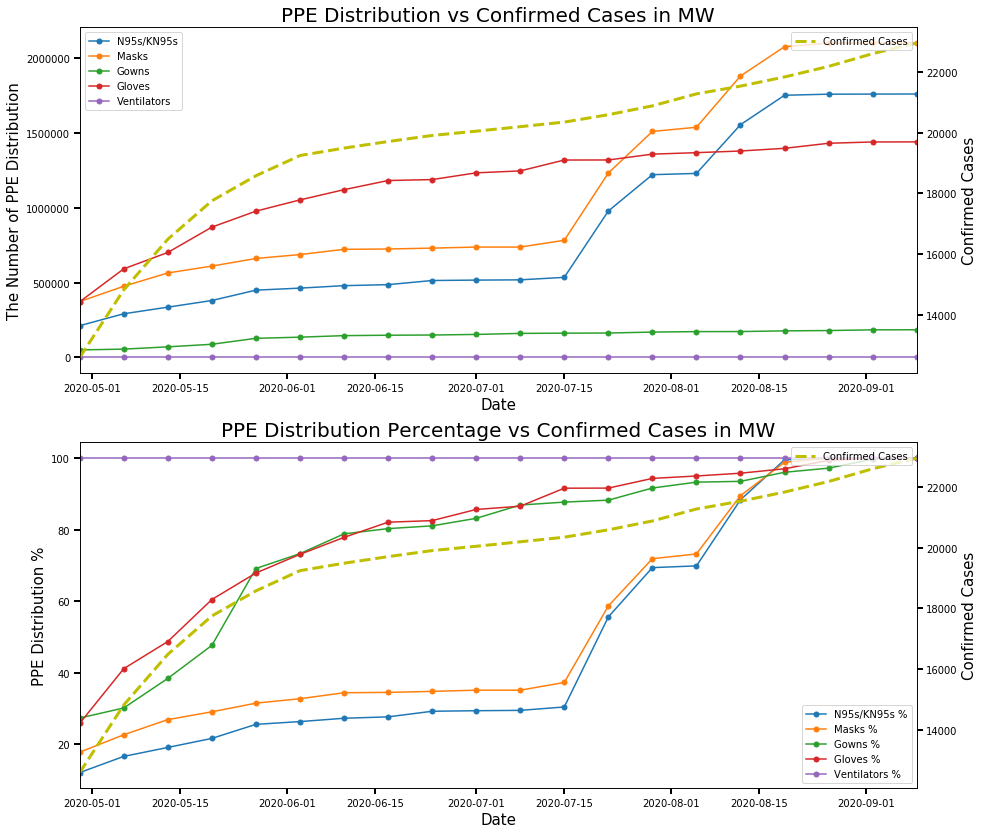

In [16]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=MW_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in MW', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=MW_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=MW_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in MW', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=MW_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [17]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    MW_CC['{} Ratio 1'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
MW_CC['Confirmed Cases(ma1)'] = MW_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
MW_CC.iloc[0,-1] = (9219+12601) / 2
for category in categories:
    MW_CC['{} Ratio 2'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
MW_CC['Confirmed Cases(ma2)'] = MW_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    MW_CC['{} Ratio 3'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
MW_CC['Confirmed Cases(ma3)'] = MW_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
MW_CC.iloc[0,-1] = (9219+12601+14825)/3
for category in categories:
    MW_CC['{} Ratio 4'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    MW_CC['{} Ratio 5'.format(category)] = MW_CC[category].diff()/MW_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    MW_CC['{} Ratio 6'.format(category)] = MW_CC[category].diff()/MW_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
MW_CC

Time      Region   N95s/KN95s      Masks     Gowns     Gloves  \
88  2020-04-29  Metro West   212466.000   373412.0   50610.0   372180.0   
95  2020-05-06  Metro West   292073.000   475762.0   55812.0   592330.0   
102 2020-05-13  Metro West   336159.000   564732.0   71127.0   701630.0   
109 2020-05-20  Metro West   380619.000   610582.0   88237.0   870902.0   
116 2020-05-27  Metro West   449855.000   661482.0  128047.0   977602.0   
117 2020-06-03  Metro West   463396.000   687532.0  135759.0  1052774.0   
118 2020-06-10  Metro West   479836.000   722682.0  145989.0  1121074.0   
119 2020-06-17  Metro West   486648.000   724682.0  148709.0  1182274.0   
120 2020-06-24  Metro West   514245.000   730682.0  150139.0  1188574.0   
121 2020-07-01  Metro West   516985.000   737682.0  154039.0  1233574.0   
122 2020-07-08  Metro West   518680.000   737682.0  160914.0  1246574.0   
123 2020-07-15  Metro West   535320.000   783032.0  162441.0  1319174.0   
124 2020-07-22  Metro West   978560.000  1232432.0  163441.0  1319574.0   
125 2020-07-29  Metro West  1221330.000  1510082.0  169731.0  1358574.0   
126 2020-08-05  Metro West  1229780.000  1538182.0  172781.0  1368374.0   
127 2020-08-12  Metro West  1555340.000  1880582.0  173181.0  1379534.0   
128 2020-08-19  Metro West  1751980.000  2076382.0  177881.0  1397406.0   
129 2020-08-26  Metro West  1759100.000  2100882.0  180031.0  1431206.0   
130 2020-09-02  Metro West  1759850.000  2100982.0  184681.0  1439806.0   
131 2020-09-09  Metro West  1760360.188  2101182.0  185231.0  1440406.0   

     Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
88         136.0          12601.0     12.069462   17.771521   27.322640   
95         136.0          14825.0     16.591661   22.642589   30.131026   
102        136.0          16491.0     19.096035   26.876872   38.399080   
109        136.0          17755.0     21.621655   29.058977   47.636195   
116        136.0          18580.0     25.554713   31.481423   69.128278   
117        136.0          19245.0     26.323931   32.721202   73.291728   
118        136.0          19490.0     27.257831   34.394070   78.814561   
119        136.0          19706.0     27.644797   34.489254   80.282998   
120        136.0          19906.0     29.212488   34.774808   81.055007   
121        136.0          20047.0     29.368137   35.107954   83.160486   
122        136.0          20195.0     29.464425   35.107954   86.872068   
123        136.0          20346.0     30.409686   37.266263   87.696444   
124        136.0          20589.0     55.588624   58.654224   88.236310   
125        136.0          20880.0     69.379551   71.868215   91.632070   
126        136.0          21274.0     69.859567   73.205558   93.278663   
127        136.0          21530.0     88.353509   89.501147   93.494609   
128        136.0          21831.0     99.523950   98.819712   96.031982   
129        136.0          22179.0     99.928413   99.985722   97.192695   
130        136.0          22598.0     99.971018   99.990482   99.703073   
131        136.0          22949.0    100.000000  100.000000  100.000000   

       Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
88    25.838548          100.0           16.861043      29.633521   
95    41.122434          100.0           19.701383      32.091872   
102   48.710572          100.0           20.384391      34.244861   
109   60.462259          100.0           21.437285      34.389299   
116   67.869892          100.0           24.211787      35.601830   
117   73.088699          100.0           24.078774      35.725227   
118   77.830417          100.0           24.619600      37.079631   
119   82.079219          100.0           24.695423      36.774688   
120   82.516596          100.0           25.833668      36.706621   
121   85.640715          100.0           25.788647      36.797626   
122   86.543239          100.0           25.683585      36.527952   
123   91.583484          100.0

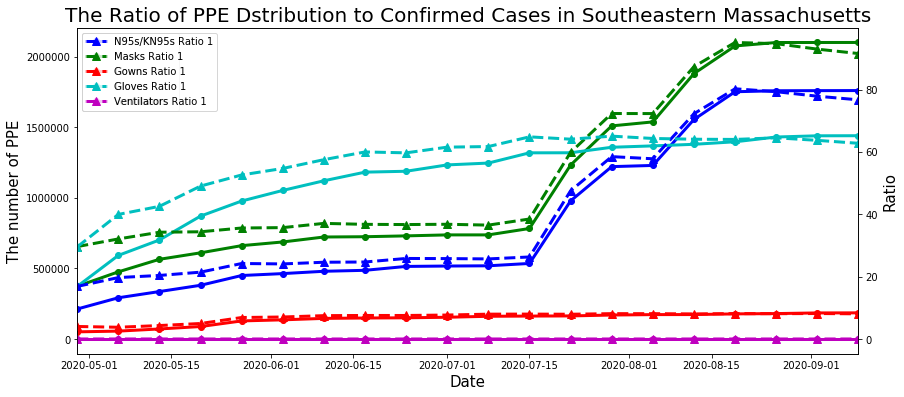

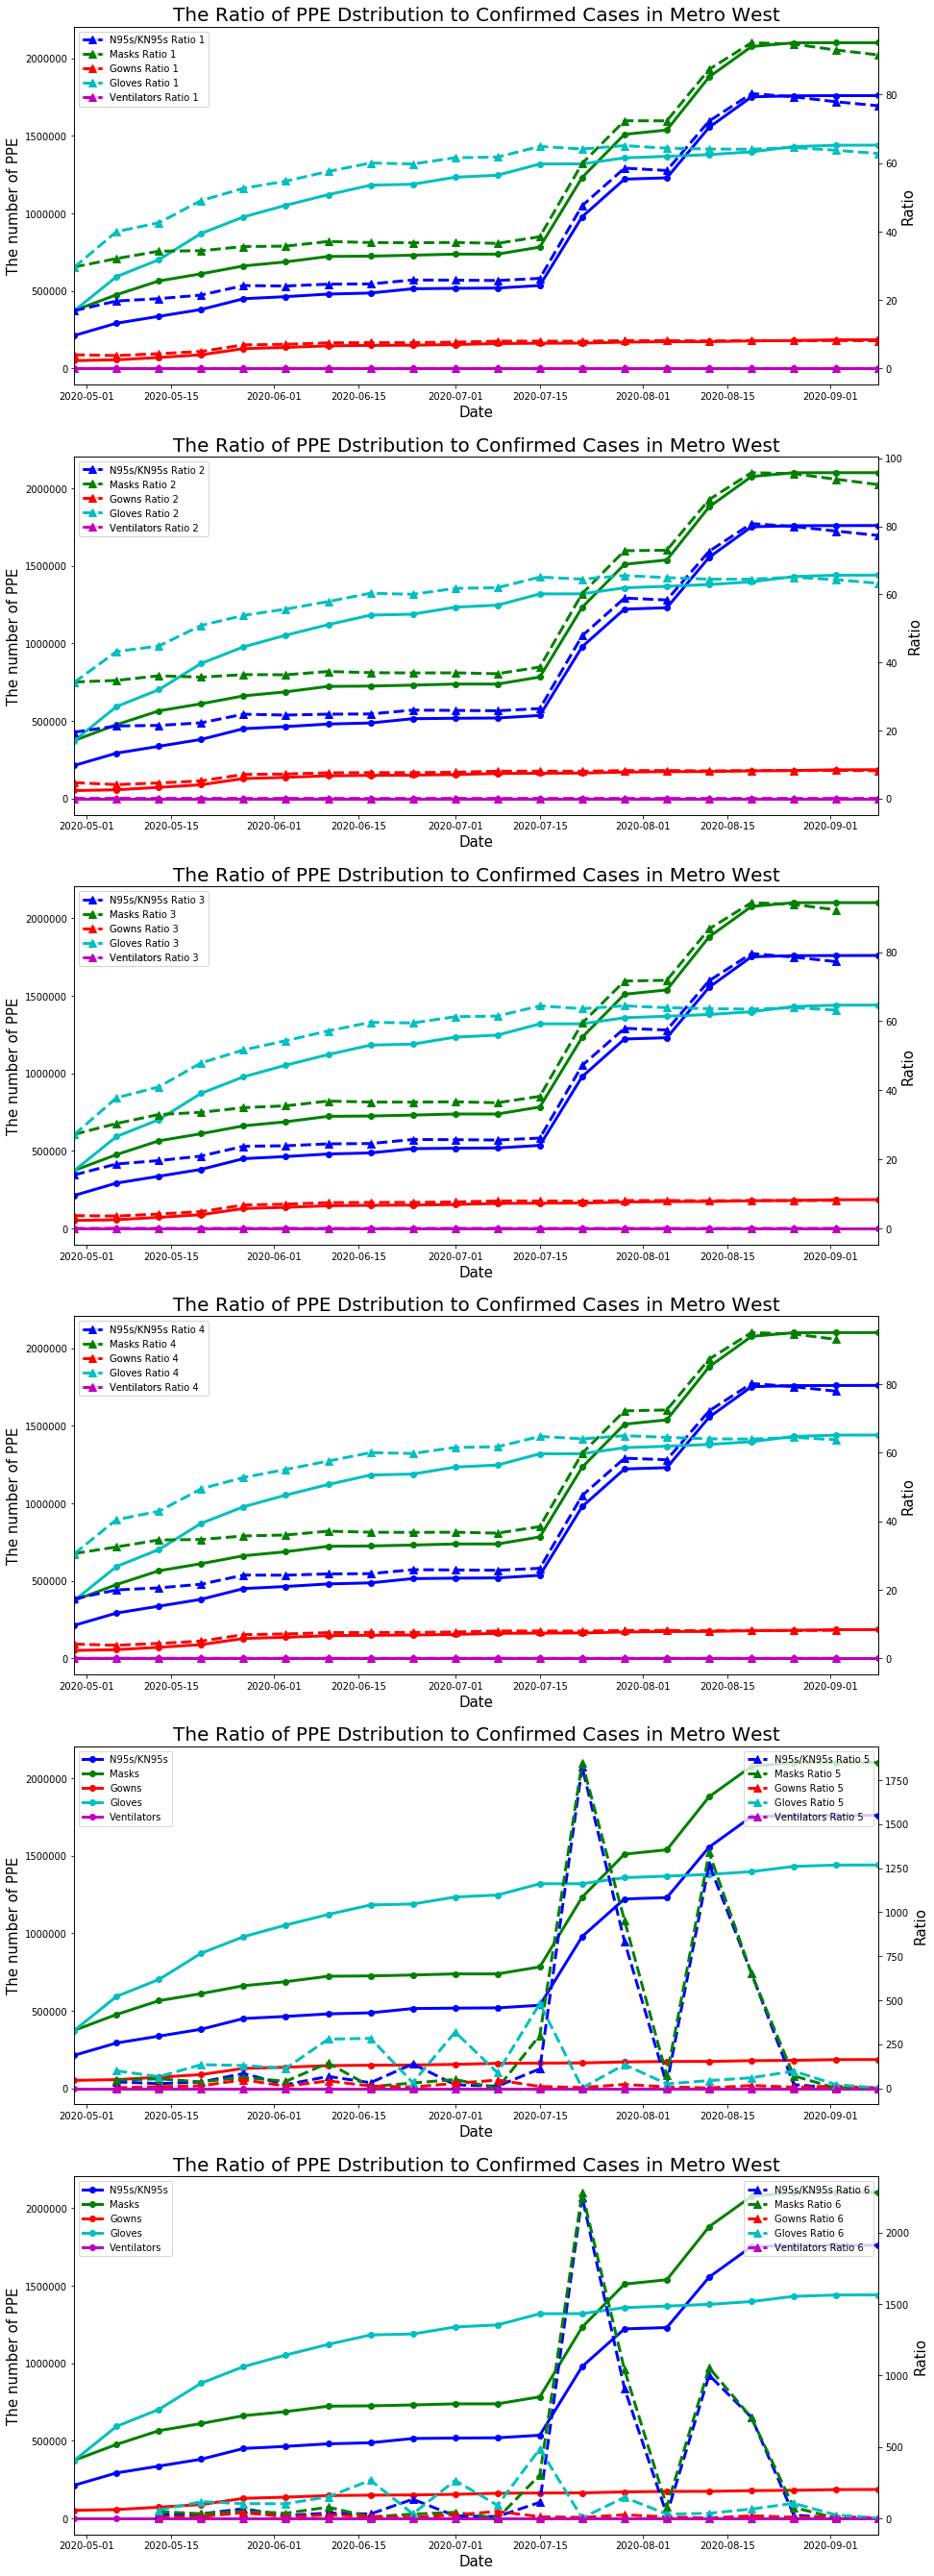

In [18]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))
        
        
fig, ax = plt.subplots(1,1,figsize=(14, 6))
color = ['b', 'g', 'r', 'c', 'm']

for category in categories:
    ax.plot('Time', category, data=MW_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('The number of PPE', fontsize=15)
    ax.set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
    ax.legend(loc='best')
    ax.set_title('The Ratio of PPE Dstribution to Confirmed Cases in Southeastern Massachusetts', fontsize=20)
ax1 = ax.twinx()
for ratio in RATIO1:
    ax1.plot('Time', ratio, data=MW_CC, color=color[RATIO1.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
    ax1.set_ylabel('Ratio', fontsize=15)
    ax1.legend(loc='best')
plt.show()


fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=MW_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Metro West', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=MW_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

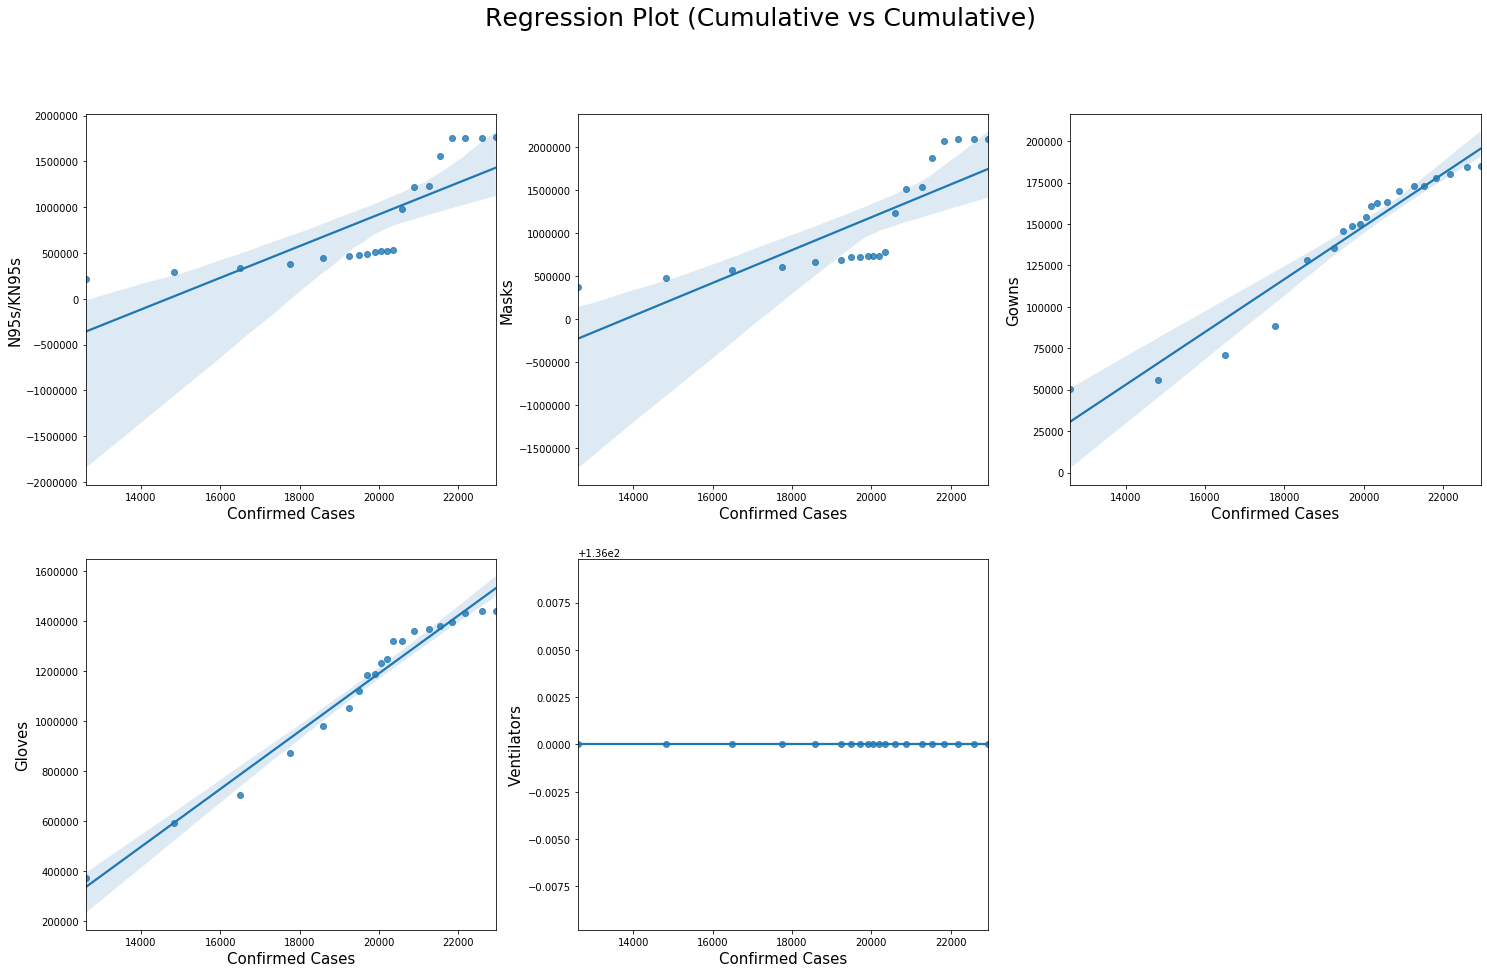

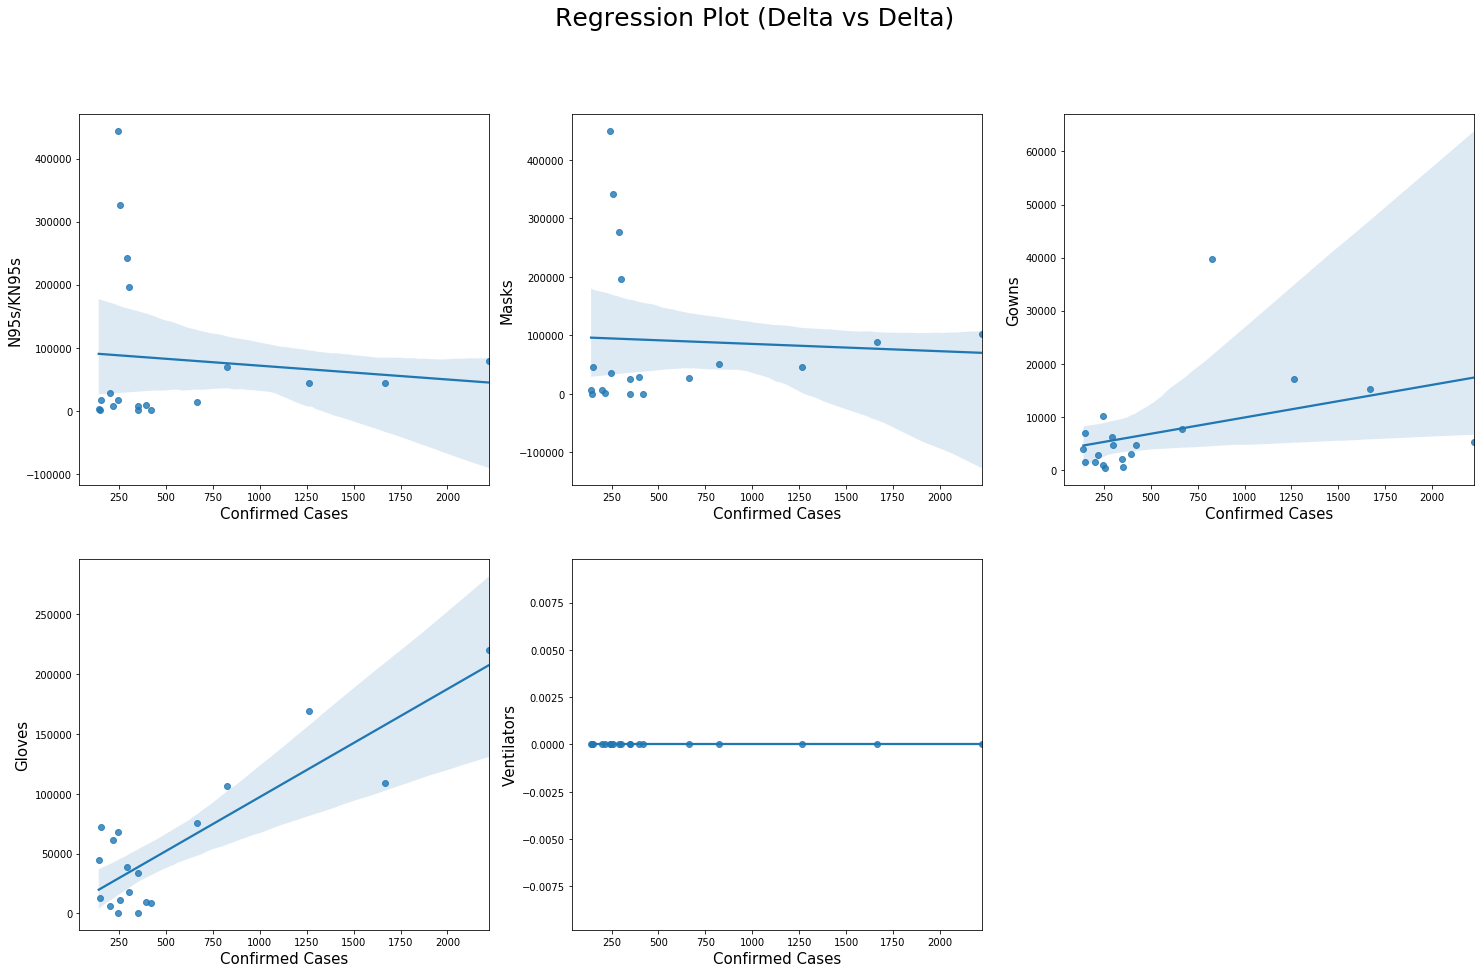

In [19]:
for category in categories:
    MW_CC['{} delta'.format(category)] = MW_CC[category].diff()
    MW_CC['Confirmed Cases delta'] = MW_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=MW_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=MW_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [20]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = MW_CC[category]
    X[categories.index(category)] = MW_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           4.97e-05
Time:                        20:58:14   Log-Likelihood:                -283.76
No. Observations:                  20   AIC:                             571.5
Df Residuals:                      18   BIC:                             573.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -2.54e+06   6.48e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Metro Boston

Time        Region  N95s/KN95s     Masks    Gowns    Gloves  \
44 2020-04-29  Metro Boston     94235.0  130800.0  23036.0  465692.0   
51 2020-05-06  Metro Boston    115642.0  146600.0  27956.0  535892.0   
58 2020-05-13  Metro Boston    127621.0  187600.0  31366.0  575792.0   
65 2020-05-20  Metro Boston    135101.0  217400.0  37846.0  626992.0   
72 2020-05-27  Metro Boston    157158.0  234150.0  43206.0  646892.0   
73 2020-06-03  Metro Boston    159715.0  238150.0  46156.0  676892.0   
74 2020-06-10  Metro Boston    161838.0  242350.0  47216.0  673292.0   
75 2020-06-17  Metro Boston    163040.0  246350.0  48436.0  678892.0   
76 2020-06-24  Metro Boston    163736.0  251350.0  48511.0  691942.0   
77 2020-07-01  Metro Boston    165116.0  256850.0  49011.0  701342.0   
78 2020-07-08  Metro Boston    168236.0  259850.0  49511.0  716342.0   
79 2020-07-15  Metro Boston    179881.0  294100.0  51711.0  720342.0   
80 2020-07-22  Metro Boston    345331.0  467100.0  54111.0  720342.0   
81 2020-07-29  Metro Boston    370891.0  475350.0  54111.0  720342.0   
82 2020-08-05  Metro Boston    371961.0  478450.0  54111.0  722342.0   
83 2020-08-12  Metro Boston    371961.0  478450.0  54111.0  785742.0   
84 2020-08-19  Metro Boston    372901.0  478450.0  54111.0  785742.0   
85 2020-08-26  Metro Boston    384201.0  478450.0  54111.0  789742.0   
86 2020-09-02  Metro Boston    384701.0  489450.0  54111.0  789742.0   
87 2020-09-09  Metro Boston    385701.0  489450.0  54111.0  789742.0   

    Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
44        204.0          12539.0     24.432138   26.723874   42.571751   
51        204.0          14476.0     29.982292   29.951987   51.664172   
58        204.0          15587.0     33.088066   38.328736   57.966033   
65        204.0          16962.0     35.027392   44.417203   69.941417   
72        204.0          17596.0     40.746070   47.839412   79.846981   
73        204.0          18108.0     41.409019   48.656655   85.298738   
74        204.0          18398.0     41.959445   49.514761   87.257674   
75        204.0          18652.0     42.271086   50.332005   89.512299   
76        204.0          18805.0     42.451536   51.353560   89.650903   
77        204.0          18978.0     42.809326   52.477270   90.574929   
78        204.0          19186.0     43.618243   53.090203   91.498956   
79        204.0          19428.0     46.637421   60.087854   95.564673   
80        204.0          19637.0     89.533343   95.433650  100.000000   
81        204.0          19940.0     96.160238   97.119215  100.000000   
82        204.0          20448.0     96.437655   97.752579  100.000000   
83        204.0          20899.0     96.437655   97.752579  100.000000   
84        204.0          21393.0     96.681367   97.752579  100.000000   
85        204.0          21946.0     99.611098   97.752579  100.000000   
86        204.0          22508.0     99.740732  100.000000  100.000000   
87        204.0          22831.0    100.000000  100.000000  100.000000   

      Gloves %  Ventilators %  
44   58.967612          100.0  
51   67.856591          100.0  
58   72.908874          100.0  
65   79.392004          100.0  
72   81.911814          100.0  
73   85.710523          100.0  
74   85.254678          100.0  
75   85.963770          100.0  
76   87.616209          100.0  
77   88.806471          100.0  
78   90.705825          100.0  
79   91.212320          100.0  
80   91.212320          100.0  
81   91.212320          100.0  
82   91.465567          100.0  
83   99.493505          100.0  
84   99.493505          100.0  
85  100.000000          100.0  
86  100.000000          100.0  
87  100.000000          100.0

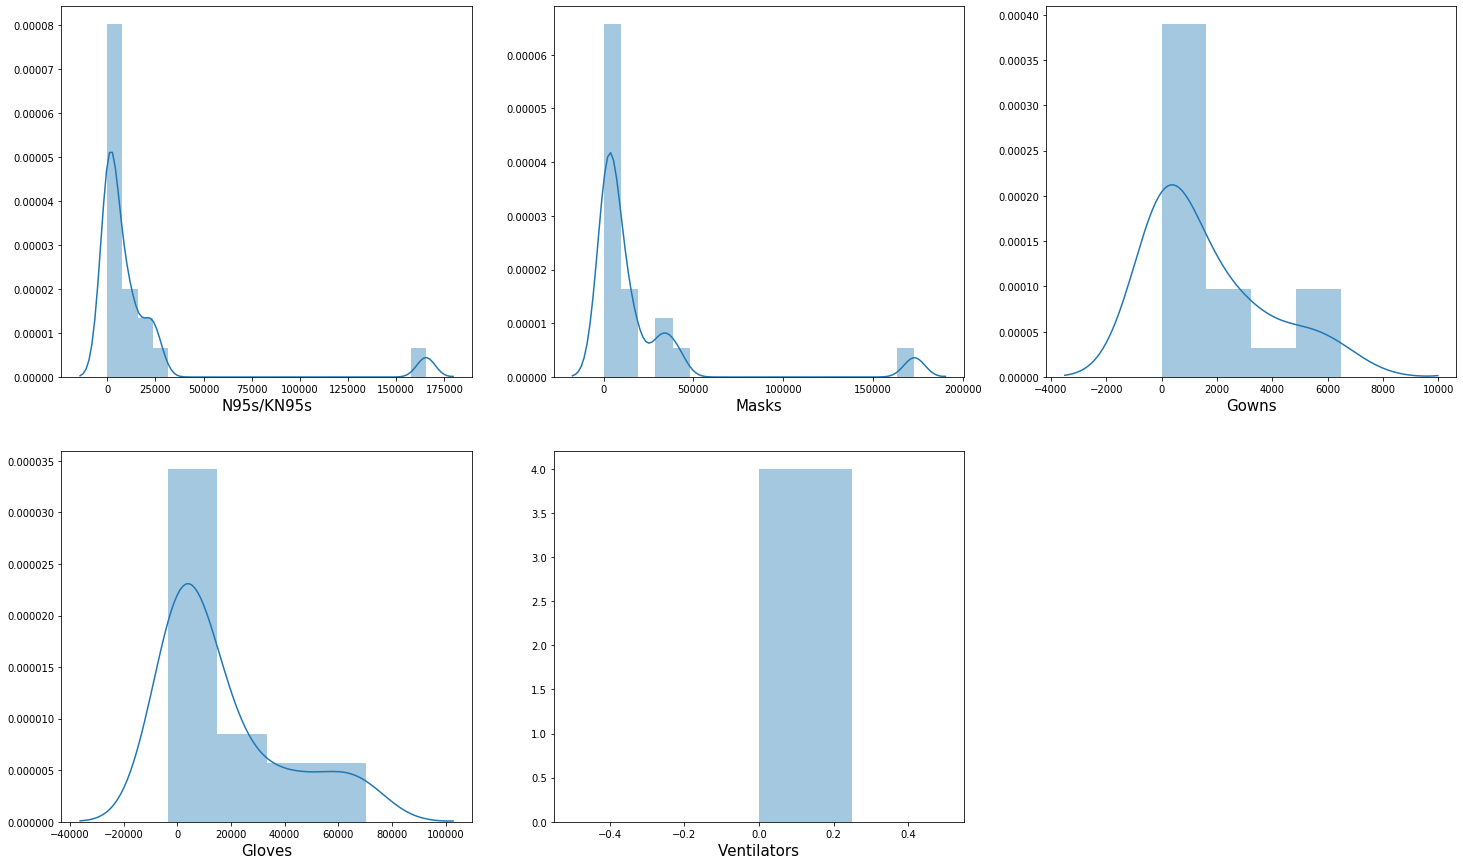

In [21]:
MB = df.loc[df['Region']=='Metro Boston']
MB_CC = MB.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    MB_CC['{} %'.format(category)] = MB_CC[category]/MB_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(MB_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
MB_CC

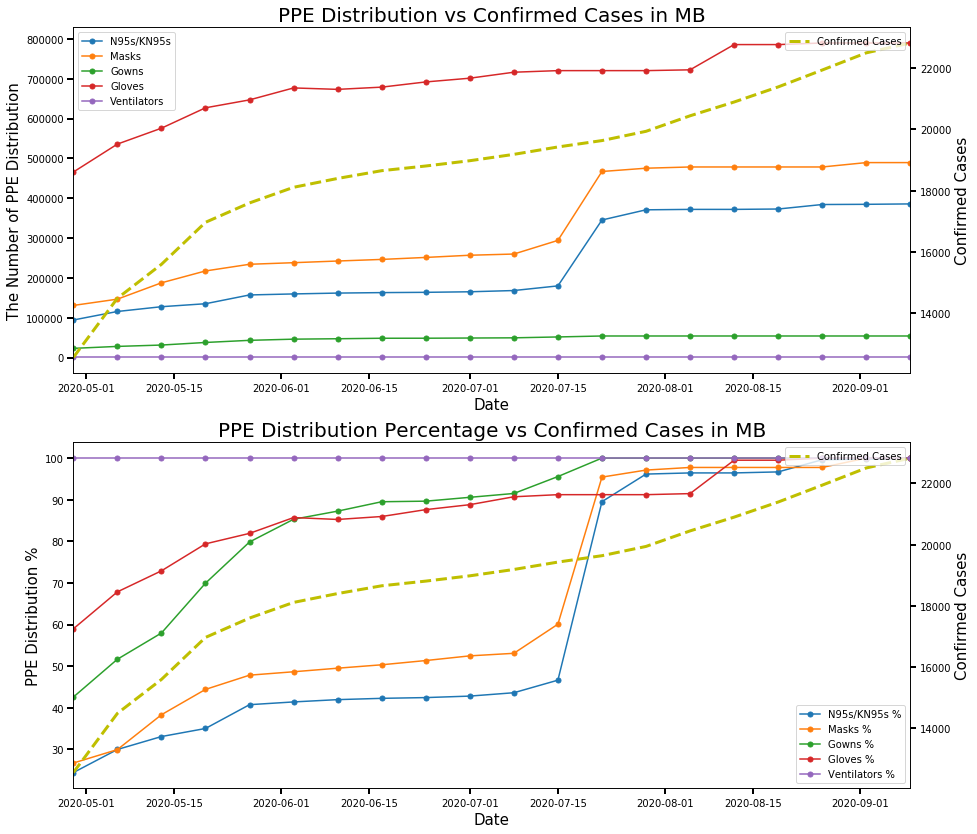

In [22]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=MB_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in MB', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=MB_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=MB_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in MB', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=MB_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    MB_CC['{} Ratio 1'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
MB_CC['Confirmed Cases(ma1)'] = MB_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
MB_CC.iloc[0,-1] = (9060+12539) / 2
for category in categories:
    MB_CC['{} Ratio 2'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
MB_CC['Confirmed Cases(ma2)'] = MB_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    MB_CC['{} Ratio 3'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
MB_CC['Confirmed Cases(ma3)'] = MB_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
MB_CC.iloc[0,-1] = (9060+12539+14476)/3
for category in categories:
    MB_CC['{} Ratio 4'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    MB_CC['{} Ratio 5'.format(category)] = MB_CC[category].diff()/MB_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    MB_CC['{} Ratio 6'.format(category)] = MB_CC[category].diff()/MB_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
MB_CC

Time        Region  N95s/KN95s     Masks    Gowns    Gloves  \
44 2020-04-29  Metro Boston     94235.0  130800.0  23036.0  465692.0   
51 2020-05-06  Metro Boston    115642.0  146600.0  27956.0  535892.0   
58 2020-05-13  Metro Boston    127621.0  187600.0  31366.0  575792.0   
65 2020-05-20  Metro Boston    135101.0  217400.0  37846.0  626992.0   
72 2020-05-27  Metro Boston    157158.0  234150.0  43206.0  646892.0   
73 2020-06-03  Metro Boston    159715.0  238150.0  46156.0  676892.0   
74 2020-06-10  Metro Boston    161838.0  242350.0  47216.0  673292.0   
75 2020-06-17  Metro Boston    163040.0  246350.0  48436.0  678892.0   
76 2020-06-24  Metro Boston    163736.0  251350.0  48511.0  691942.0   
77 2020-07-01  Metro Boston    165116.0  256850.0  49011.0  701342.0   
78 2020-07-08  Metro Boston    168236.0  259850.0  49511.0  716342.0   
79 2020-07-15  Metro Boston    179881.0  294100.0  51711.0  720342.0   
80 2020-07-22  Metro Boston    345331.0  467100.0  54111.0  720342.0   
81 2020-07-29  Metro Boston    370891.0  475350.0  54111.0  720342.0   
82 2020-08-05  Metro Boston    371961.0  478450.0  54111.0  722342.0   
83 2020-08-12  Metro Boston    371961.0  478450.0  54111.0  785742.0   
84 2020-08-19  Metro Boston    372901.0  478450.0  54111.0  785742.0   
85 2020-08-26  Metro Boston    384201.0  478450.0  54111.0  789742.0   
86 2020-09-02  Metro Boston    384701.0  489450.0  54111.0  789742.0   
87 2020-09-09  Metro Boston    385701.0  489450.0  54111.0  789742.0   

    Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
44        204.0          12539.0     24.432138   26.723874   42.571751   
51        204.0          14476.0     29.982292   29.951987   51.664172   
58        204.0          15587.0     33.088066   38.328736   57.966033   
65        204.0          16962.0     35.027392   44.417203   69.941417   
72        204.0          17596.0     40.746070   47.839412   79.846981   
73        204.0          18108.0     41.409019   48.656655   85.298738   
74        204.0          18398.0     41.959445   49.514761   87.257674   
75        204.0          18652.0     42.271086   50.332005   89.512299   
76        204.0          18805.0     42.451536   51.353560   89.650903   
77        204.0          18978.0     42.809326   52.477270   90.574929   
78        204.0          19186.0     43.618243   53.090203   91.498956   
79        204.0          19428.0     46.637421   60.087854   95.564673   
80        204.0          19637.0     89.533343   95.433650  100.000000   
81        204.0          19940.0     96.160238   97.119215  100.000000   
82        204.0          20448.0     96.437655   97.752579  100.000000   
83        204.0          20899.0     96.437655   97.752579  100.000000   
84        204.0          21393.0     96.681367   97.752579  100.000000   
85        204.0          21946.0     99.611098   97.752579  100.000000   
86        204.0          22508.0     99.740732  100.000000  100.000000   
87        204.0          22831.0    100.000000  100.000000  100.000000   

      Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
44   58.967612          100.0            7.515352      10.431454   
51   67.856591          100.0            7.988533      10.127107   
58   72.908874          100.0            8.187656      12.035671   
65   79.392004          100.0            7.964922      12.816885   
72   81.911814          100.0            8.931462      13.307002   
73   85.710523          100.0            8.820135      13.151646   
74   85.254678          100.0            8.796500      13.172627   
75   85.963770          100.0            8.741154      13.207699   
76   87.616209          100.0            8.707046      13.366126   
77   88.806471          100.0            8.700390      13.534092   
78   90.705825          100.0            8.768685      13.543730   
79   91.212320          100.0            9.258853      15.137945   
80   91.212320          100.0           17.585731      23

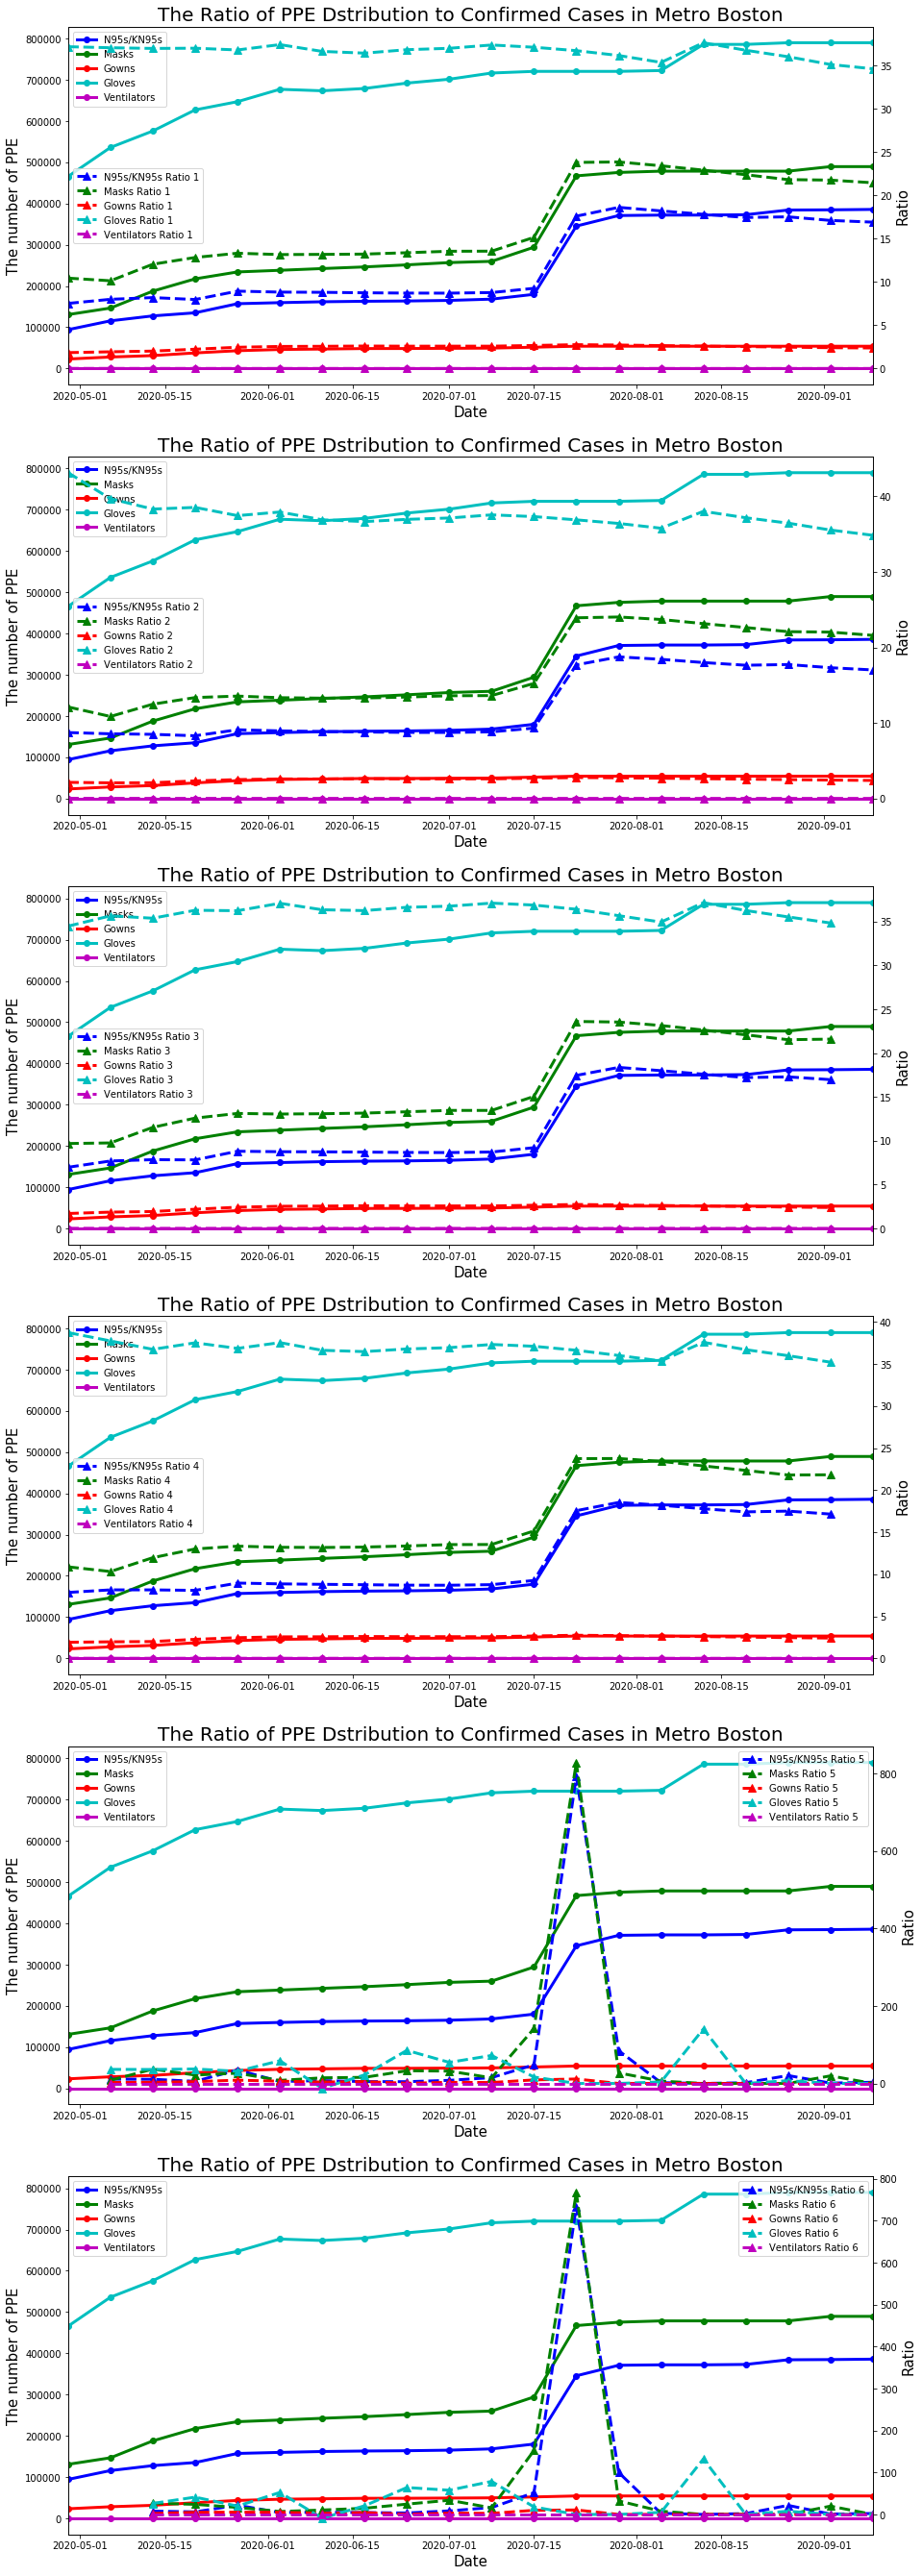

In [24]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=MB_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Metro Boston', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=MB_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

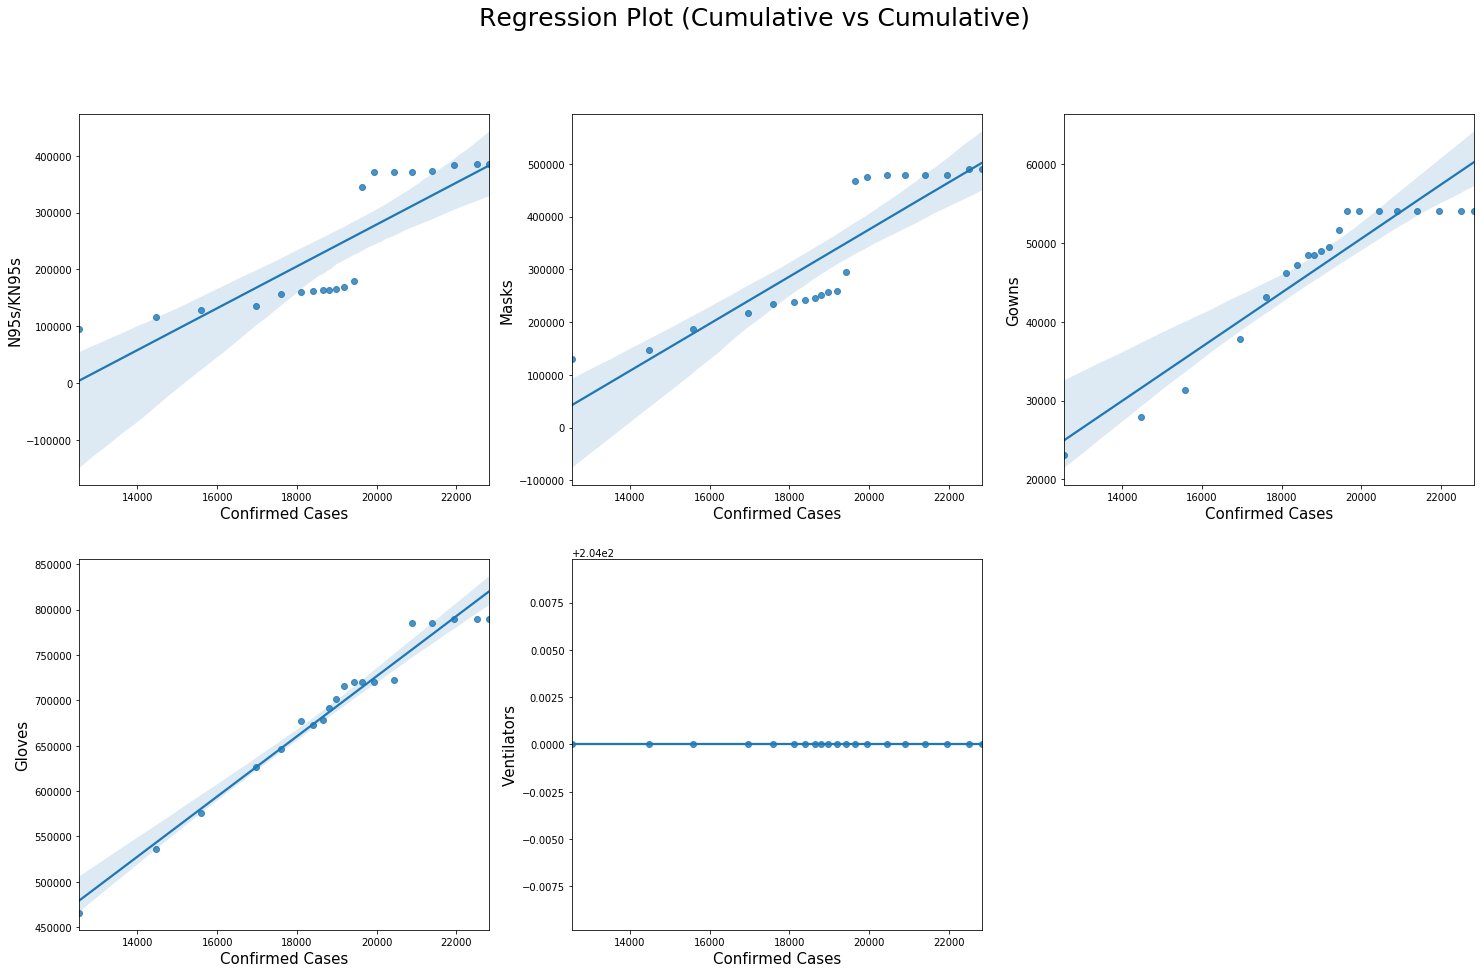

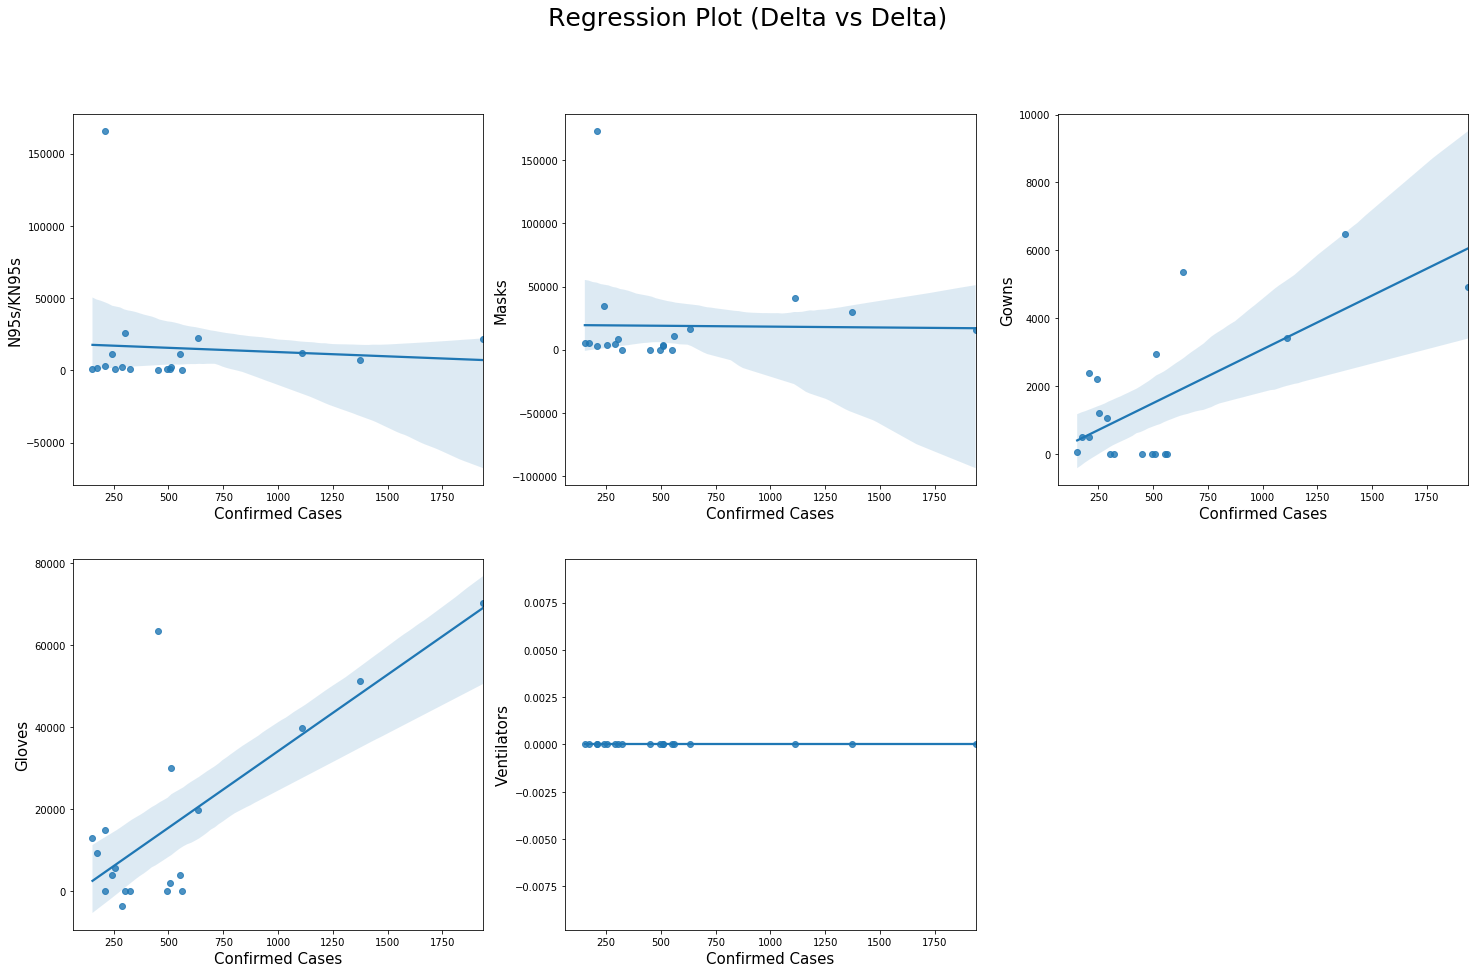

In [25]:
for category in categories:
    MB_CC['{} delta'.format(category)] = MB_CC[category].diff()
    MB_CC['Confirmed Cases delta'] = MB_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=MB_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=MB_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [26]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = MB_CC[category]
    X[categories.index(category)] = MB_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     43.13
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           3.60e-06
Time:                        20:58:22   Log-Likelihood:                -248.62
No. Observations:                  20   AIC:                             501.2
Df Residuals:                      18   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.578e+05   1.07e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Central Massachusetts

In [27]:
CM = df.loc[df['Region']=='Central Massachusetts']
CM_CC = CM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    CM_CC['{} %'.format(category)] = CM_CC[category]/CM_CC[category].iloc[-1] * 100
    
# fig, axes = plt.subplots(2, 3, figsize=(25,15))
# for ax, category in zip(axes.flatten(), categories):
#     sns.distplot(CM_CC[category].diff(), ax=ax)
#     ax.set_xlabel(category, fontsize=15)
# fig.delaxes(axes[1,2])
CM_CC

Time                 Region  N95s/KN95s      Masks    Gowns  \
0  2020-04-29  Central Massachusetts    138350.0   263767.0  43293.0   
7  2020-05-06  Central Massachusetts    170144.0   292767.0  46627.0   
14 2020-05-13  Central Massachusetts    184220.0   350367.0  54390.0   
21 2020-05-20  Central Massachusetts    191280.0   364617.0  60380.0   
28 2020-05-27  Central Massachusetts    220534.0   392367.0  69922.0   
29 2020-06-03  Central Massachusetts    239254.0   420667.0  75489.0   
30 2020-06-10  Central Massachusetts    246659.0   456767.0  79129.0   
31 2020-06-17  Central Massachusetts    245449.0   462867.0  83339.0   
32 2020-06-24  Central Massachusetts    246509.0   465367.0  84339.0   
33 2020-07-01  Central Massachusetts    248049.0   472067.0  88739.0   
34 2020-07-08  Central Massachusetts    249229.0   474167.0  90249.0   
35 2020-07-15  Central Massachusetts    254659.0   493317.0  93149.0   
36 2020-07-22  Central Massachusetts    425969.0   687317.0  93149.0   
37 2020-07-29  Central Massachusetts    546539.0   814117.0  93179.0   
38 2020-08-05  Central Massachusetts    549419.0   820117.0  95779.0   
39 2020-08-12  Central Massachusetts    864179.0  1141467.0  95779.0   
40 2020-08-19  Central Massachusetts   1088389.0  1371917.0  95829.0   
41 2020-08-26  Central Massachusetts   1091409.0  1374017.0  95904.0   
42 2020-09-02  Central Massachusetts   1091759.0  1374767.0  95904.0   
43 2020-09-09  Central Massachusetts   1101259.0  1374767.0  95954.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
0    454250.0         79.0           5363.0     12.562894   19.186306   
7    794650.0         79.0           7056.0     15.449953   21.295754   
14   858250.0         79.0           8335.0     16.728127   25.485555   
21   889350.0         79.0           9857.0     17.369211   26.522094   
28   905950.0         83.0          10743.0     20.025625   28.540618   
29   975650.0         83.0          11296.0     21.725498   30.599149   
30   986150.0         83.0          11641.0     22.397910   33.225048   
31  1003150.0         83.0          11827.0     22.288036   33.668760   
32  1007650.0         83.0          12001.0     22.384289   33.850609   
33  1013850.0         83.0          12148.0     22.524129   34.337964   
34  1015450.0         83.0          12296.0     22.631279   34.490717   
35  1026050.0         83.0          12409.0     23.124351   35.883681   
36  1027050.0         83.0          12541.0     38.680183   49.995163   
37  1027650.0         83.0          12726.0     49.628561   59.218544   
38  1037650.0         83.0          12968.0     49.890080   59.654982   
39  1067250.0         83.0          13138.0     78.471913   83.029852   
40  1071930.0         83.0          13317.0     98.831338   99.792692   
41  1072002.0         83.0          13513.0     99.105569   99.945445   
42  1076802.0         83.0          13705.0     99.137351  100.000000   
43  1082802.0         83.0          13906.0    100.000000  100.000000   

       Gowns %    Gloves %  Ventilators %  
0    45.118494   41.951345      95.180723  
7    48.593076   73.388302      95.180723  
14   56.683411   79.261952      95.180723  
21   62.925985   82.134130      95.180723  
28   72.870334   83.667189     100.000000  
29   78.672072   90.104193     100.000000  
30   82.465556   91.073899     100.000000  
31   86.853075   92.643900     100.000000  
32   87.895241   93.059488     100.000000  
33   92.480772   93.632077     100.000000  
34   94.054443   93.779842     100.000000  
35   97.076724   94.758783     100.000000  
36   97.076724   94.851136     100.000000  
37   97.107989   94.906548     100.000000  
38   99.817621   95.830078     100.000000  
39   99.817621   98.563726     100.000000  
40   99.869729   98.995938     100.000000  
41   99.947892   99.002588     100.000000  
42   99.947892   99.445882     100.000000  
43  100.000000  100.000000     100.000000

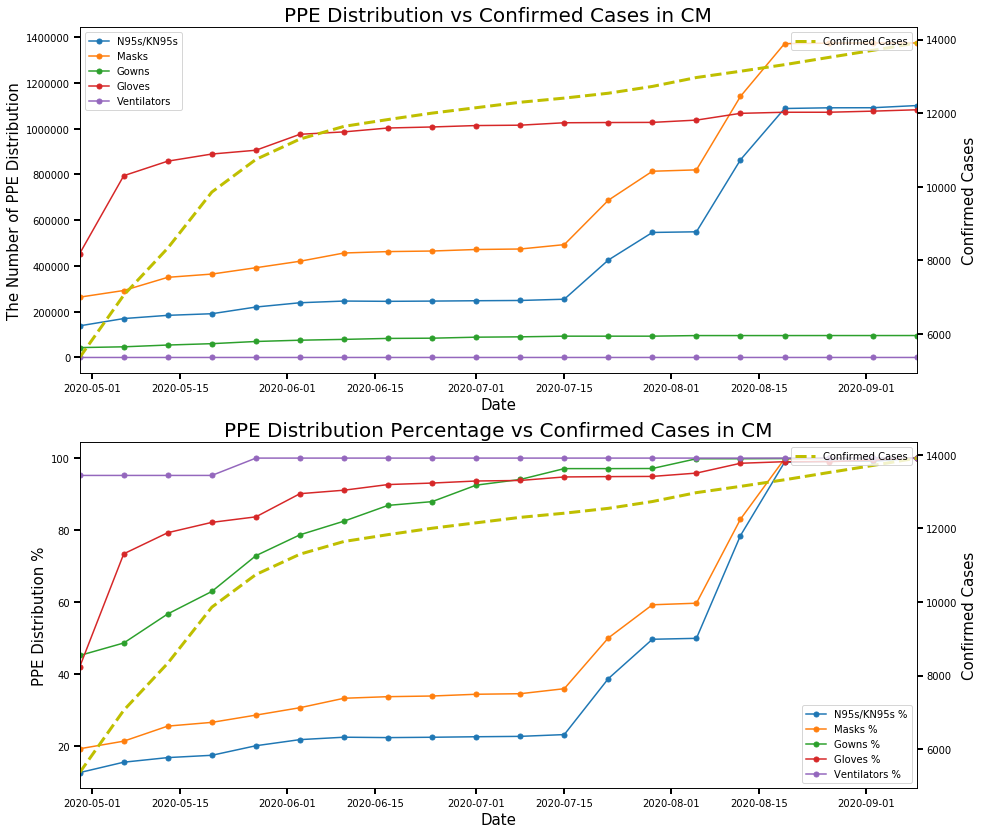

In [28]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=CM_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in CM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=CM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=CM_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in CM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=CM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [29]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    CM_CC['{} Ratio 1'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
CM_CC['Confirmed Cases(ma1)'] = CM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
CM_CC.iloc[0,-1] = (3474+5363) / 2
for category in categories:
    CM_CC['{} Ratio 2'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
CM_CC['Confirmed Cases(ma2)'] = CM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    CM_CC['{} Ratio 3'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
CM_CC['Confirmed Cases(ma3)'] = CM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
CM_CC.iloc[0,-1] = (3474+5363+7056)/3
for category in categories:
    CM_CC['{} Ratio 4'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    CM_CC['{} Ratio 5'.format(category)] = CM_CC[category].diff()/CM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    CM_CC['{} Ratio 6'.format(category)] = CM_CC[category].diff()/CM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
CM_CC

Time                 Region  N95s/KN95s      Masks    Gowns  \
0  2020-04-29  Central Massachusetts    138350.0   263767.0  43293.0   
7  2020-05-06  Central Massachusetts    170144.0   292767.0  46627.0   
14 2020-05-13  Central Massachusetts    184220.0   350367.0  54390.0   
21 2020-05-20  Central Massachusetts    191280.0   364617.0  60380.0   
28 2020-05-27  Central Massachusetts    220534.0   392367.0  69922.0   
29 2020-06-03  Central Massachusetts    239254.0   420667.0  75489.0   
30 2020-06-10  Central Massachusetts    246659.0   456767.0  79129.0   
31 2020-06-17  Central Massachusetts    245449.0   462867.0  83339.0   
32 2020-06-24  Central Massachusetts    246509.0   465367.0  84339.0   
33 2020-07-01  Central Massachusetts    248049.0   472067.0  88739.0   
34 2020-07-08  Central Massachusetts    249229.0   474167.0  90249.0   
35 2020-07-15  Central Massachusetts    254659.0   493317.0  93149.0   
36 2020-07-22  Central Massachusetts    425969.0   687317.0  93149.0   
37 2020-07-29  Central Massachusetts    546539.0   814117.0  93179.0   
38 2020-08-05  Central Massachusetts    549419.0   820117.0  95779.0   
39 2020-08-12  Central Massachusetts    864179.0  1141467.0  95779.0   
40 2020-08-19  Central Massachusetts   1088389.0  1371917.0  95829.0   
41 2020-08-26  Central Massachusetts   1091409.0  1374017.0  95904.0   
42 2020-09-02  Central Massachusetts   1091759.0  1374767.0  95904.0   
43 2020-09-09  Central Massachusetts   1101259.0  1374767.0  95954.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
0    454250.0         79.0           5363.0     12.562894   19.186306   
7    794650.0         79.0           7056.0     15.449953   21.295754   
14   858250.0         79.0           8335.0     16.728127   25.485555   
21   889350.0         79.0           9857.0     17.369211   26.522094   
28   905950.0         83.0          10743.0     20.025625   28.540618   
29   975650.0         83.0          11296.0     21.725498   30.599149   
30   986150.0         83.0          11641.0     22.397910   33.225048   
31  1003150.0         83.0          11827.0     22.288036   33.668760   
32  1007650.0         83.0          12001.0     22.384289   33.850609   
33  1013850.0         83.0          12148.0     22.524129   34.337964   
34  1015450.0         83.0          12296.0     22.631279   34.490717   
35  1026050.0         83.0          12409.0     23.124351   35.883681   
36  1027050.0         83.0          12541.0     38.680183   49.995163   
37  1027650.0         83.0          12726.0     49.628561   59.218544   
38  1037650.0         83.0          12968.0     49.890080   59.654982   
39  1067250.0         83.0          13138.0     78.471913   83.029852   
40  1071930.0         83.0          13317.0     98.831338   99.792692   
41  1072002.0         83.0          13513.0     99.105569   99.945445   
42  1076802.0         83.0          13705.0     99.137351  100.000000   
43  1082802.0         83.0          13906.0    100.000000  100.000000   

       Gowns %    Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
0    45.118494   41.951345      95.180723           25.797128      49.182734   
7    48.593076   73.388302      95.180723           24.113379      41.491922   
14   56.683411   79.261952      95.180723           22.101980      42.035633   
21   62.925985   82.134130      95.180723           19.405499      36.990667   
28   72.870334   83.667189     100.000000           20.528158      36.523038   
29   78.672072   90.104193     100.000000           21.180418      37.240351   
30   82.465556   91.073899     100.000000           21.188815      39.237780   
31   86.853075   92.643900     100.000000           20.753276      39.136467   
32   87.895241   93.059488     100.000000           20.540705      38.777352   
33   92.480772   93.632077     100.000000           20.418917      38.859648   
34   94.054443   93.779842     100.000000           20.269112      38.562703   
35

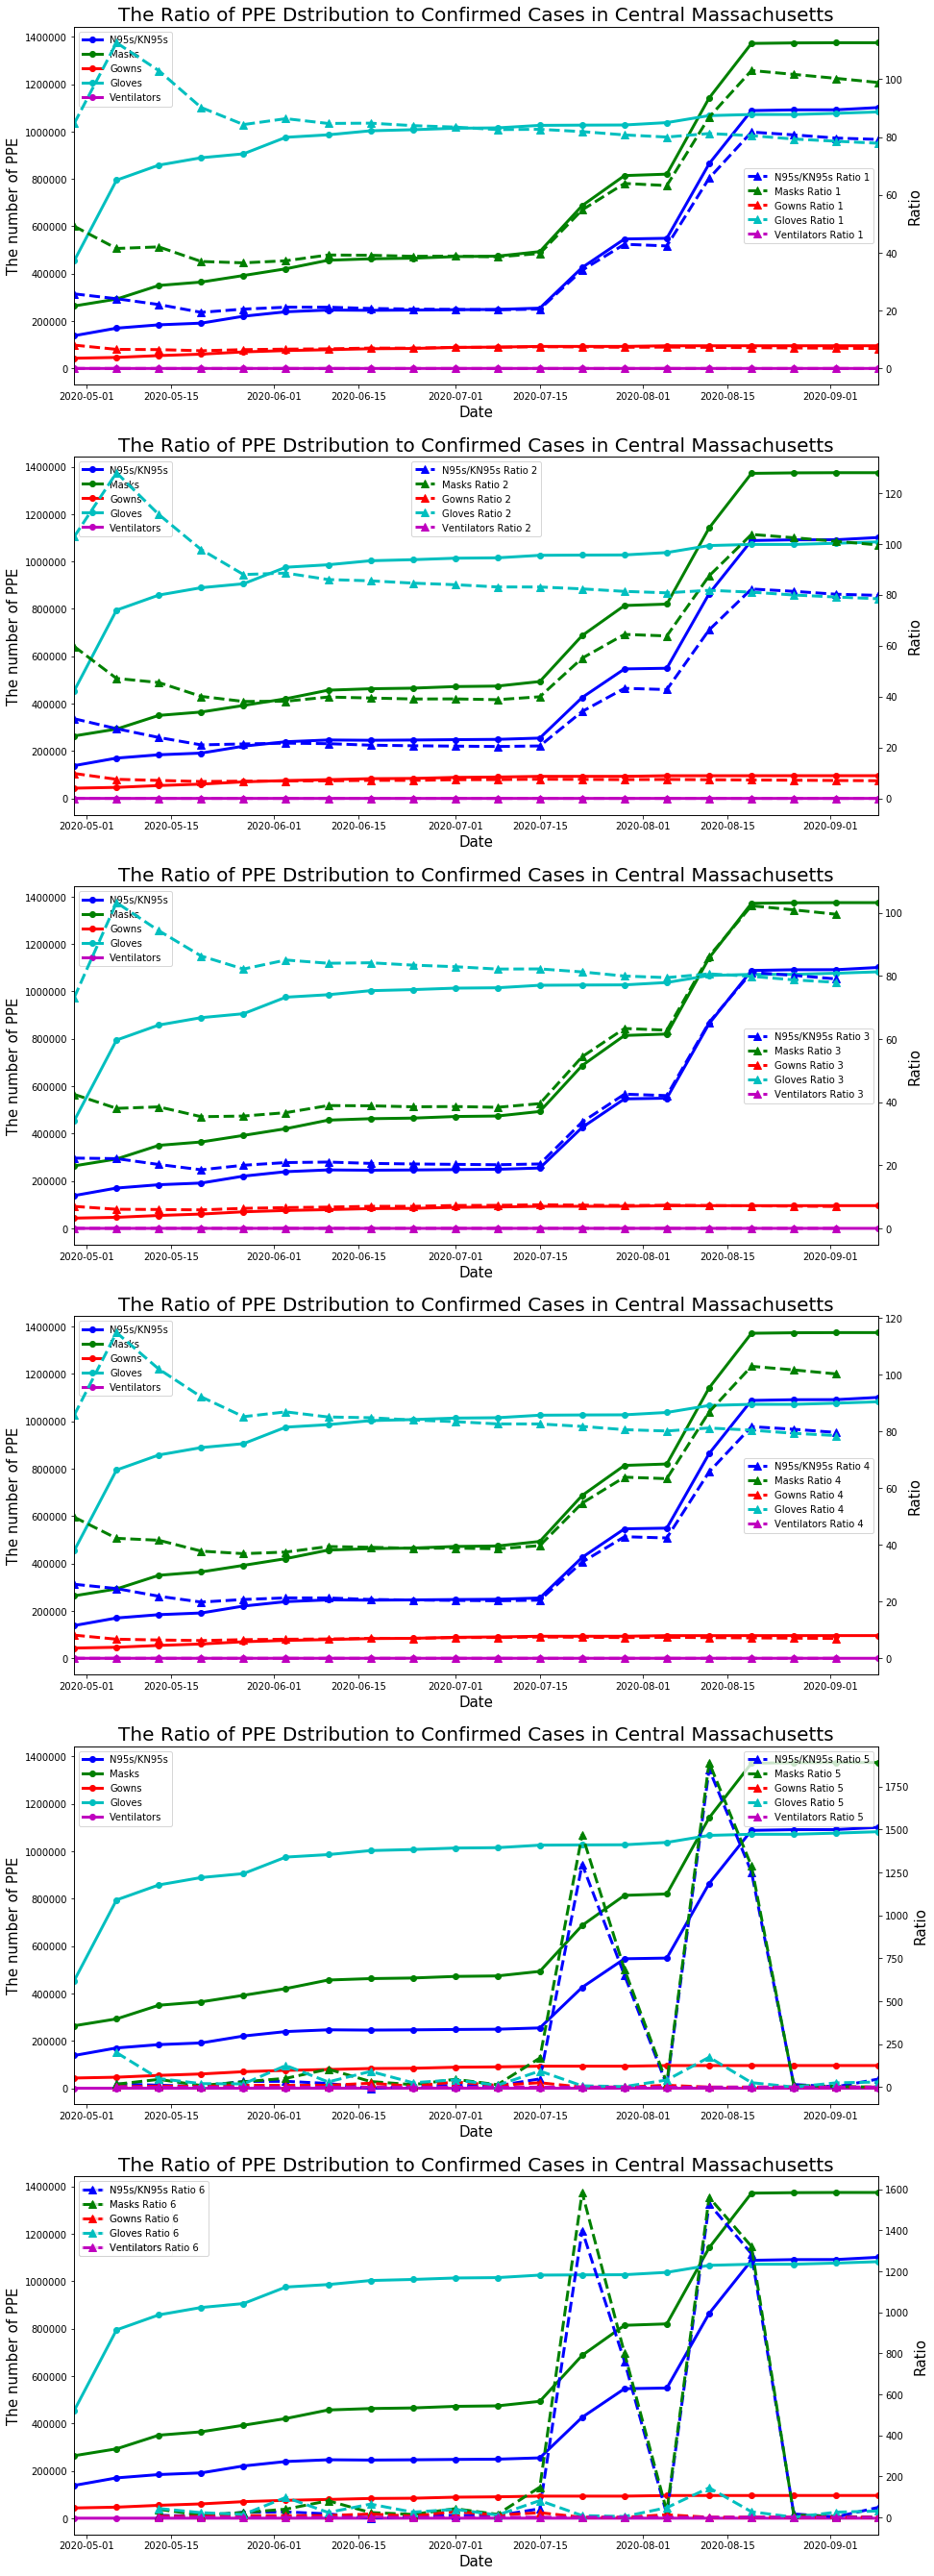

In [30]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=CM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Central Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=CM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

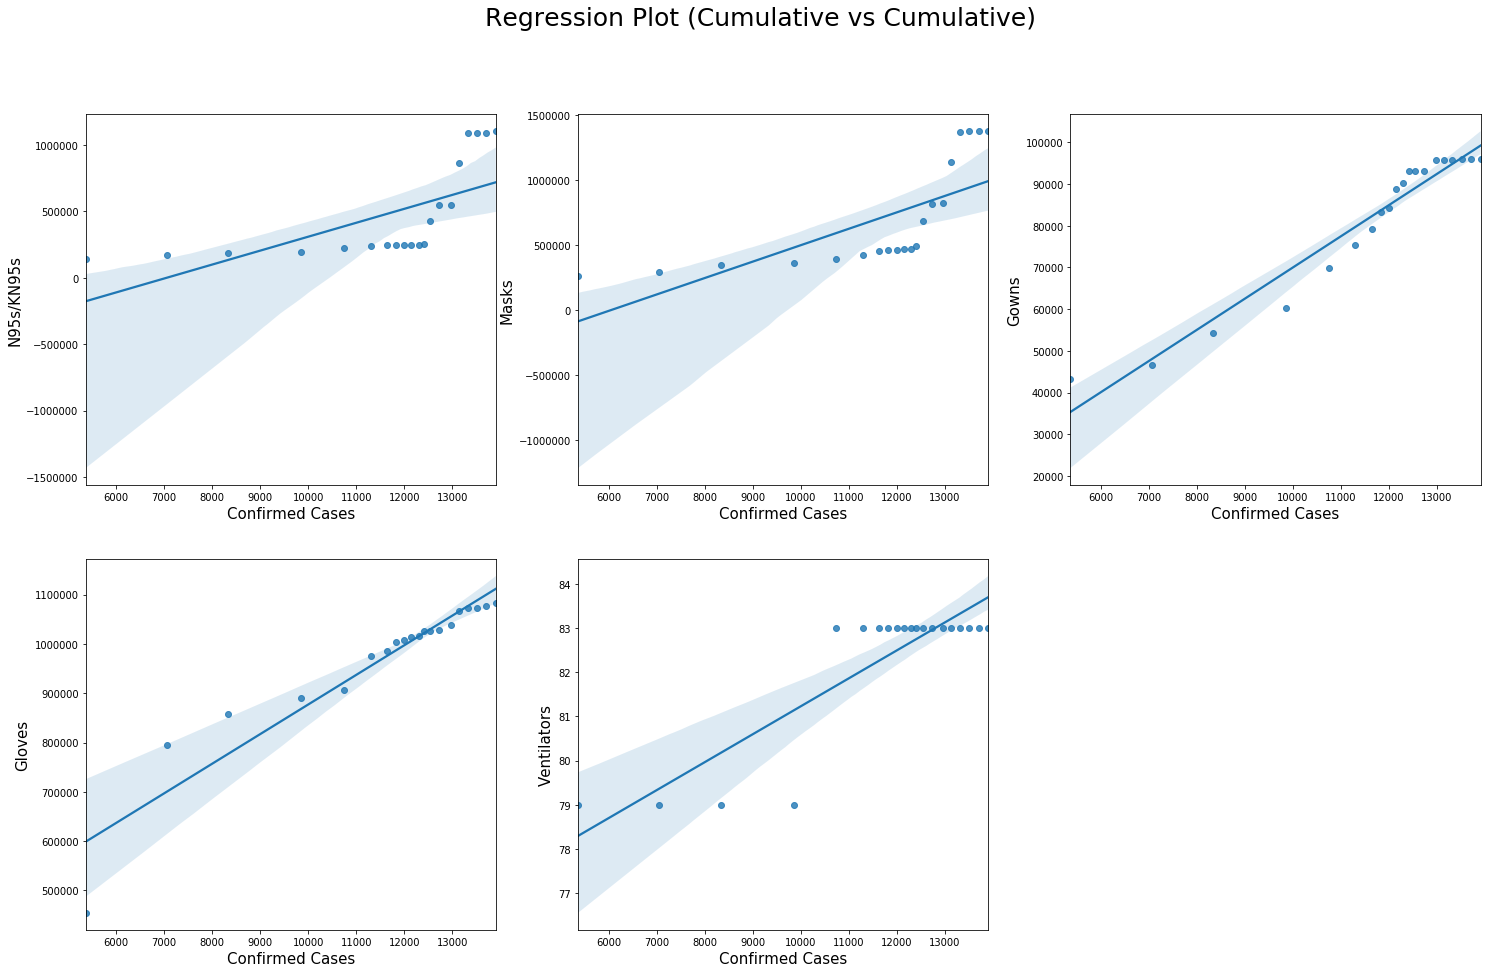

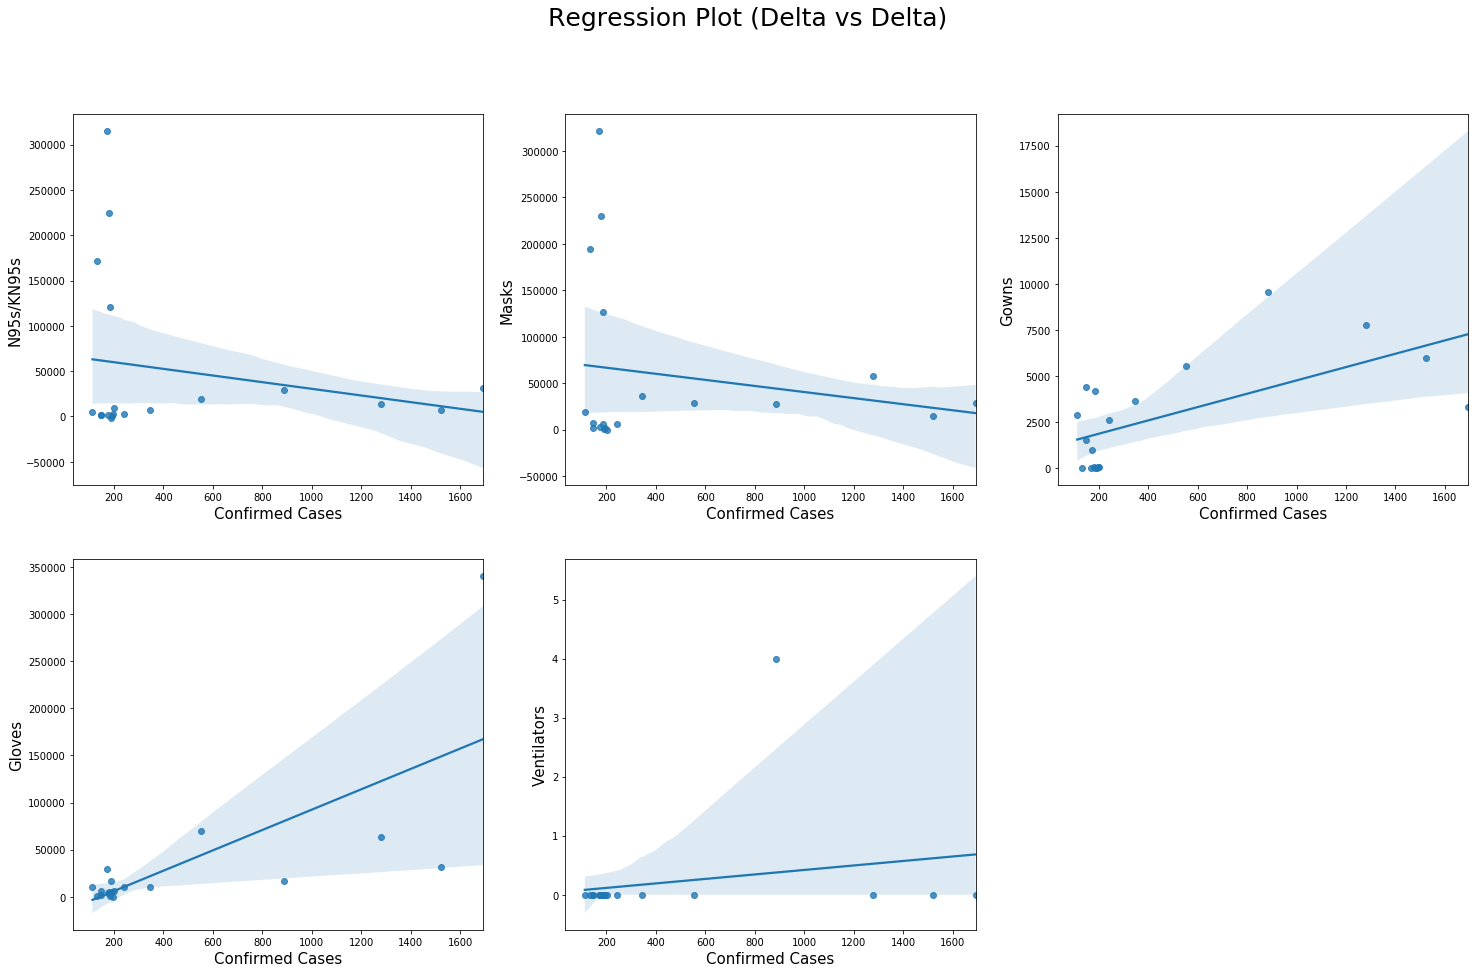

In [31]:
for category in categories:
    CM_CC['{} delta'.format(category)] = CM_CC[category].diff()
    CM_CC['Confirmed Cases delta'] = CM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=CM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=CM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [32]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = CM_CC[category]
    X[categories.index(category)] = CM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     13.76
Date:                Sun, 13 Sep 2020   Prob (F-statistic):            0.00160
Time:                        20:58:28   Log-Likelihood:                -278.18
No. Observations:                  20   AIC:                             560.4
Df Residuals:                      18   BIC:                             562.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.393e+05   3.32e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Western Massachusetts

Time                 Region  N95s/KN95s      Masks    Gowns  \
220 2020-04-29  Western Massachusetts    156323.0   300642.0  50128.0   
227 2020-05-06  Western Massachusetts    196135.0   356892.0  52813.0   
234 2020-05-13  Western Massachusetts    217121.0   402897.0  58829.0   
241 2020-05-20  Western Massachusetts    223347.0   435347.0  69279.0   
248 2020-05-27  Western Massachusetts    259107.0   467597.0  73949.0   
249 2020-06-03  Western Massachusetts    269912.0   483597.0  74919.0   
250 2020-06-10  Western Massachusetts    274382.0   493747.0  77299.0   
251 2020-06-17  Western Massachusetts    274972.0   496797.0  76569.0   
252 2020-06-24  Western Massachusetts    275262.0   508247.0  83649.0   
253 2020-07-01  Western Massachusetts    276162.0   512647.0  85099.0   
254 2020-07-08  Western Massachusetts    276922.0   515447.0  87499.0   
255 2020-07-15  Western Massachusetts    294047.0   566447.0  88599.0   
256 2020-07-22  Western Massachusetts    626547.0   908947.0  90399.0   
257 2020-07-29  Western Massachusetts   1076842.0  1377397.0  91849.0   
258 2020-08-05  Western Massachusetts   1298047.0  1627297.0  93699.0   
259 2020-08-12  Western Massachusetts   1298292.0  1630897.0  93699.0   
260 2020-08-19  Western Massachusetts   1299942.0  1635997.0  93999.0   
261 2020-08-26  Western Massachusetts   1300342.0  1640997.0  93999.0   
262 2020-09-02  Western Massachusetts   1300342.0  1641497.0  93999.0   
263 2020-09-09  Western Massachusetts   1300342.0  1643497.0  95999.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
220  324630.0         60.0           5052.0     12.021684   18.292823   
227  366030.0         60.0           5773.0     15.083340   21.715403   
234  399030.0         60.0           6526.0     16.697223   24.514617   
241  433930.0         60.0           7164.0     17.176020   26.489066   
248  467930.0         60.0           7693.0     19.926066   28.451345   
249  484930.0         60.0           7982.0     20.757001   29.424879   
250  504643.0         60.0           8157.0     21.100757   30.042464   
251  499630.0         60.0           8281.0     21.146129   30.228044   
252  536043.0         60.0           8394.0     21.168431   30.924729   
253  540443.0         60.0           8549.0     21.237644   31.192451   
254  547443.0         60.0           8689.0     21.296090   31.362820   
255  548443.0         60.0           8844.0     22.613051   34.465959   
256  550943.0         60.0           9002.0     48.183247   55.305668   
257  557183.0         60.0           9207.0     82.812214   83.808915   
258  574481.0         60.0           9428.0     99.823508   99.014297   
259  587977.0         60.0           9587.0     99.842349   99.233342   
260  603241.0         60.0           9759.0     99.969239   99.543656   
261  603541.0         60.0           9904.0    100.000000   99.847885   
262  607941.0         60.0          10082.0    100.000000   99.878308   
263  611941.0         60.0          10212.0    100.000000  100.000000   

        Gowns %    Gloves %  Ventilators %  
220   52.217211   53.049232          100.0  
227   55.014115   59.814590          100.0  
234   61.280847   65.207267          100.0  
241   72.166377   70.910431          100.0  
248   77.031011   76.466522          100.0  
249   78.041438   79.244568          100.0  
250   80.520630   82.465957          100.0  
251   79.760206   81.646760          100.0  
252   87.135283   87.597170          100.0  
253   88.645715   88.316194          100.0  
254   91.145741   89.460095          100.0  
255   92.291586   89.623509          100.0  
256   94.166606   90.032046          100.0  
257   95.677038   91.051752          100.0  
258   97.604142   93.878495          100.0  
259   97.604142   96.083936          100.0  
260   97.916645   98.578294          100.0  
261   97.916645   98.627319          100.0  
262   97.916645   99.346342          100.0  
263  100.000000  100.000000          100.0

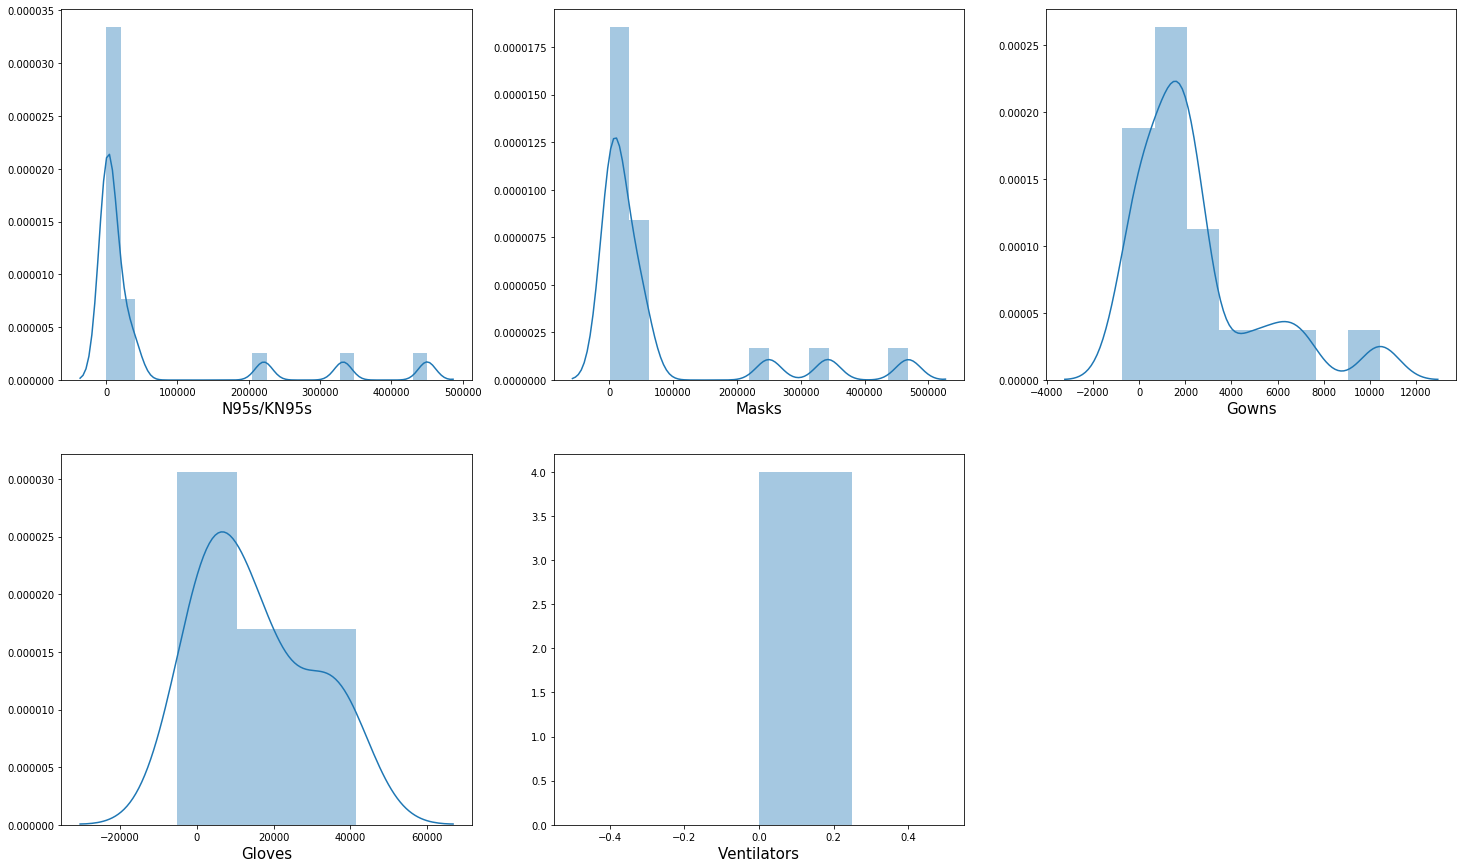

In [33]:
WM = df.loc[df['Region']=='Western Massachusetts']
WM_CC = WM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    WM_CC['{} %'.format(category)] = WM_CC[category]/WM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(WM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
WM_CC

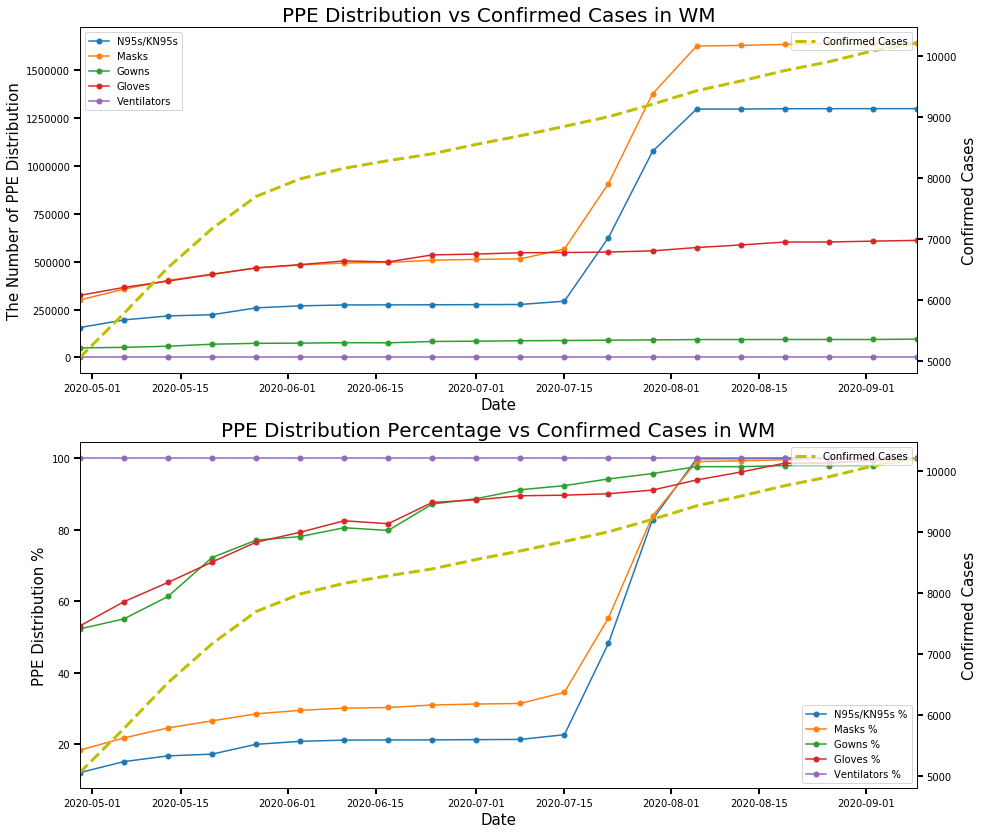

In [34]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=WM_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in WM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=WM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=WM_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in WM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=WM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [35]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    WM_CC['{} Ratio 1'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
WM_CC['Confirmed Cases(ma1)'] = WM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
WM_CC.iloc[0,-1] = (3763+5052) / 2
for category in categories:
    WM_CC['{} Ratio 2'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
WM_CC['Confirmed Cases(ma2)'] = WM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    WM_CC['{} Ratio 3'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
WM_CC['Confirmed Cases(ma3)'] = WM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
WM_CC.iloc[0,-1] = (3763+5052+5773)/3
for category in categories:
    WM_CC['{} Ratio 4'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    WM_CC['{} Ratio 5'.format(category)] = WM_CC[category].diff()/WM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    WM_CC['{} Ratio 6'.format(category)] = WM_CC[category].diff()/WM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
WM_CC

Time                 Region  N95s/KN95s      Masks    Gowns  \
220 2020-04-29  Western Massachusetts    156323.0   300642.0  50128.0   
227 2020-05-06  Western Massachusetts    196135.0   356892.0  52813.0   
234 2020-05-13  Western Massachusetts    217121.0   402897.0  58829.0   
241 2020-05-20  Western Massachusetts    223347.0   435347.0  69279.0   
248 2020-05-27  Western Massachusetts    259107.0   467597.0  73949.0   
249 2020-06-03  Western Massachusetts    269912.0   483597.0  74919.0   
250 2020-06-10  Western Massachusetts    274382.0   493747.0  77299.0   
251 2020-06-17  Western Massachusetts    274972.0   496797.0  76569.0   
252 2020-06-24  Western Massachusetts    275262.0   508247.0  83649.0   
253 2020-07-01  Western Massachusetts    276162.0   512647.0  85099.0   
254 2020-07-08  Western Massachusetts    276922.0   515447.0  87499.0   
255 2020-07-15  Western Massachusetts    294047.0   566447.0  88599.0   
256 2020-07-22  Western Massachusetts    626547.0   908947.0  90399.0   
257 2020-07-29  Western Massachusetts   1076842.0  1377397.0  91849.0   
258 2020-08-05  Western Massachusetts   1298047.0  1627297.0  93699.0   
259 2020-08-12  Western Massachusetts   1298292.0  1630897.0  93699.0   
260 2020-08-19  Western Massachusetts   1299942.0  1635997.0  93999.0   
261 2020-08-26  Western Massachusetts   1300342.0  1640997.0  93999.0   
262 2020-09-02  Western Massachusetts   1300342.0  1641497.0  93999.0   
263 2020-09-09  Western Massachusetts   1300342.0  1643497.0  95999.0   

       Gloves  Ventilators  Confirmed Cases  N95s/KN95s %     Masks %  \
220  324630.0         60.0           5052.0     12.021684   18.292823   
227  366030.0         60.0           5773.0     15.083340   21.715403   
234  399030.0         60.0           6526.0     16.697223   24.514617   
241  433930.0         60.0           7164.0     17.176020   26.489066   
248  467930.0         60.0           7693.0     19.926066   28.451345   
249  484930.0         60.0           7982.0     20.757001   29.424879   
250  504643.0         60.0           8157.0     21.100757   30.042464   
251  499630.0         60.0           8281.0     21.146129   30.228044   
252  536043.0         60.0           8394.0     21.168431   30.924729   
253  540443.0         60.0           8549.0     21.237644   31.192451   
254  547443.0         60.0           8689.0     21.296090   31.362820   
255  548443.0         60.0           8844.0     22.613051   34.465959   
256  550943.0         60.0           9002.0     48.183247   55.305668   
257  557183.0         60.0           9207.0     82.812214   83.808915   
258  574481.0         60.0           9428.0     99.823508   99.014297   
259  587977.0         60.0           9587.0     99.842349   99.233342   
260  603241.0         60.0           9759.0     99.969239   99.543656   
261  603541.0         60.0           9904.0    100.000000   99.847885   
262  607941.0         60.0          10082.0    100.000000   99.878308   
263  611941.0         60.0          10212.0    100.000000  100.000000   

        Gowns %    Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
220   52.217211   53.049232          100.0           30.942795      59.509501   
227   55.014115   59.814590          100.0           33.974537      61.820890   
234   61.280847   65.207267          100.0           33.270150      61.737205   
241   72.166377   70.910431          100.0           31.176298      60.768705   
248   77.031011   76.466522          100.0           33.680879      60.782140   
249   78.041438   79.244568          100.0           33.815084      60.585943   
250   80.520630   82.465957          100.0           33.637612      60.530465   
251   79.760206   81.646760          100.0           33.205168      59.992392   
252   87.135283   87.597170          100.0           32.792709      60.548844   
253   88.645715   88.316194          100.0           32.303427      59.965727   
254   91.145741   89.460095          100.0         

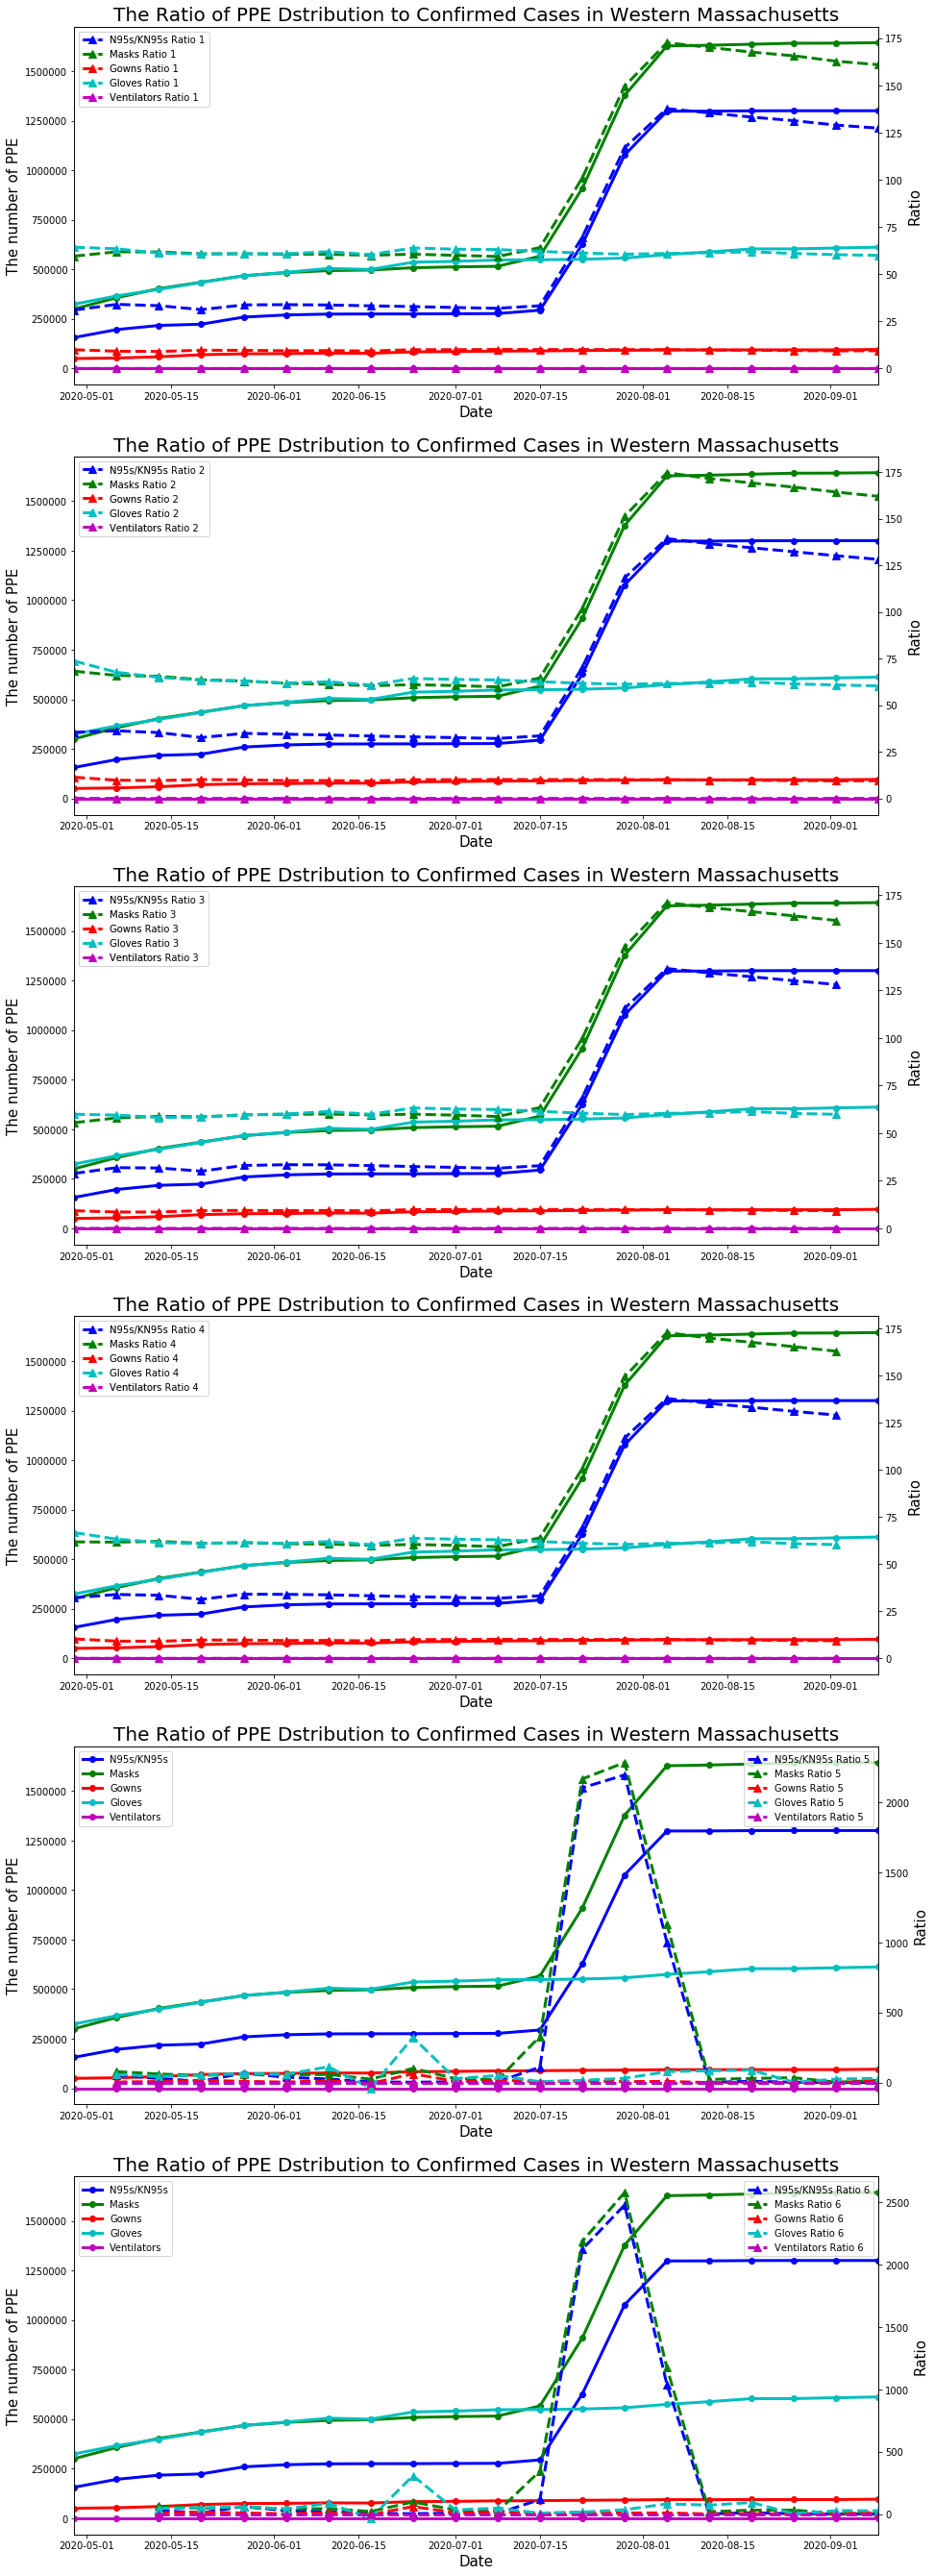

In [36]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=WM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Western Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=WM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

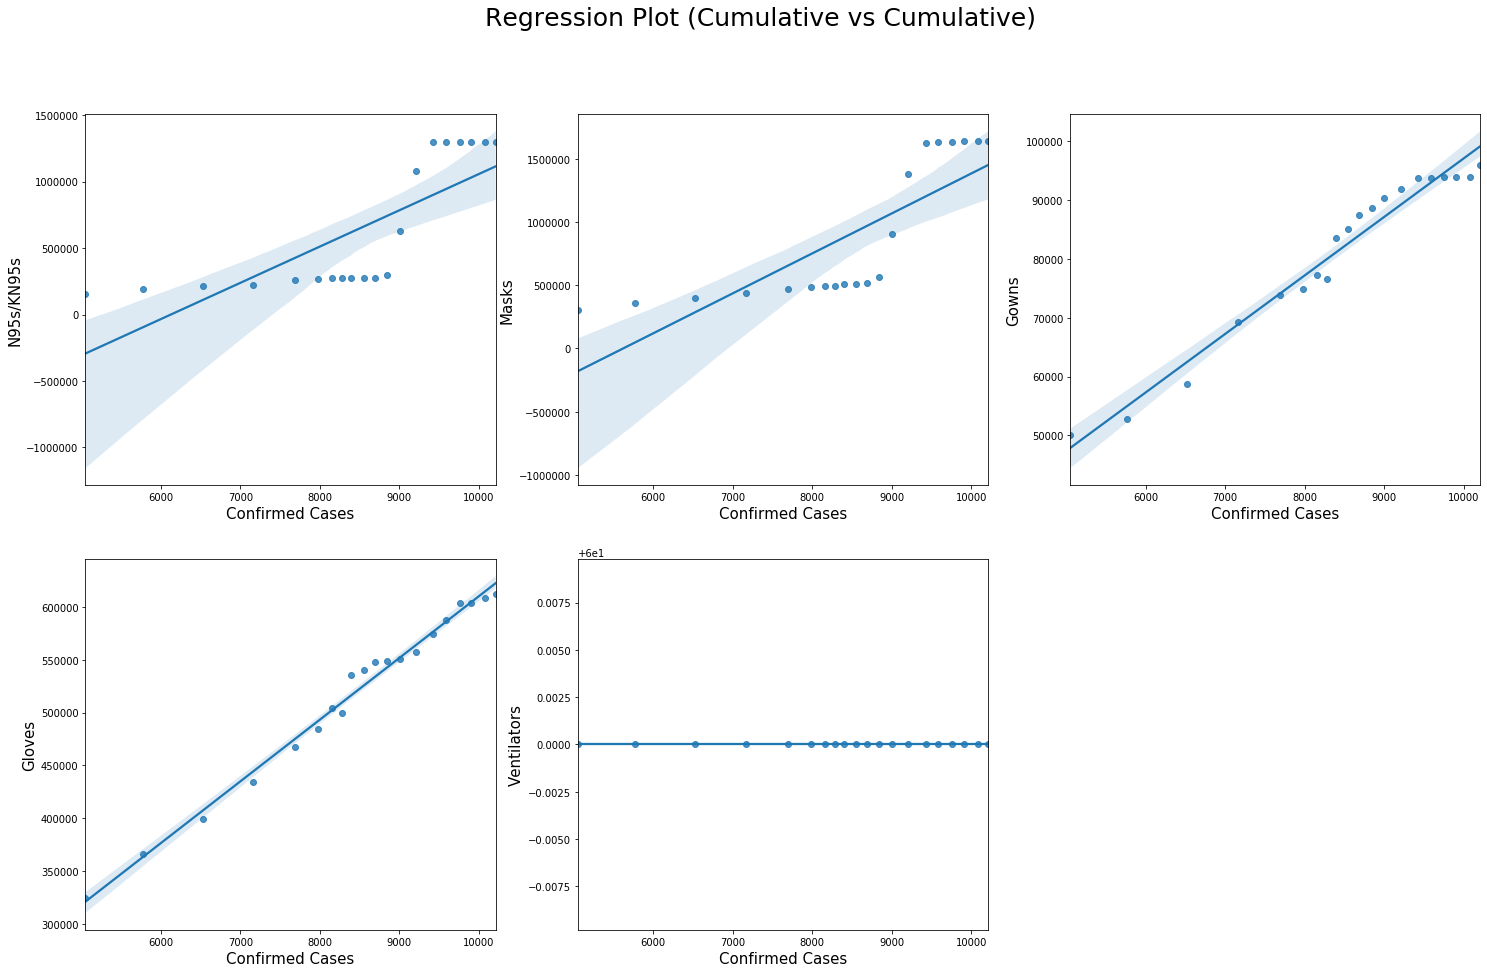

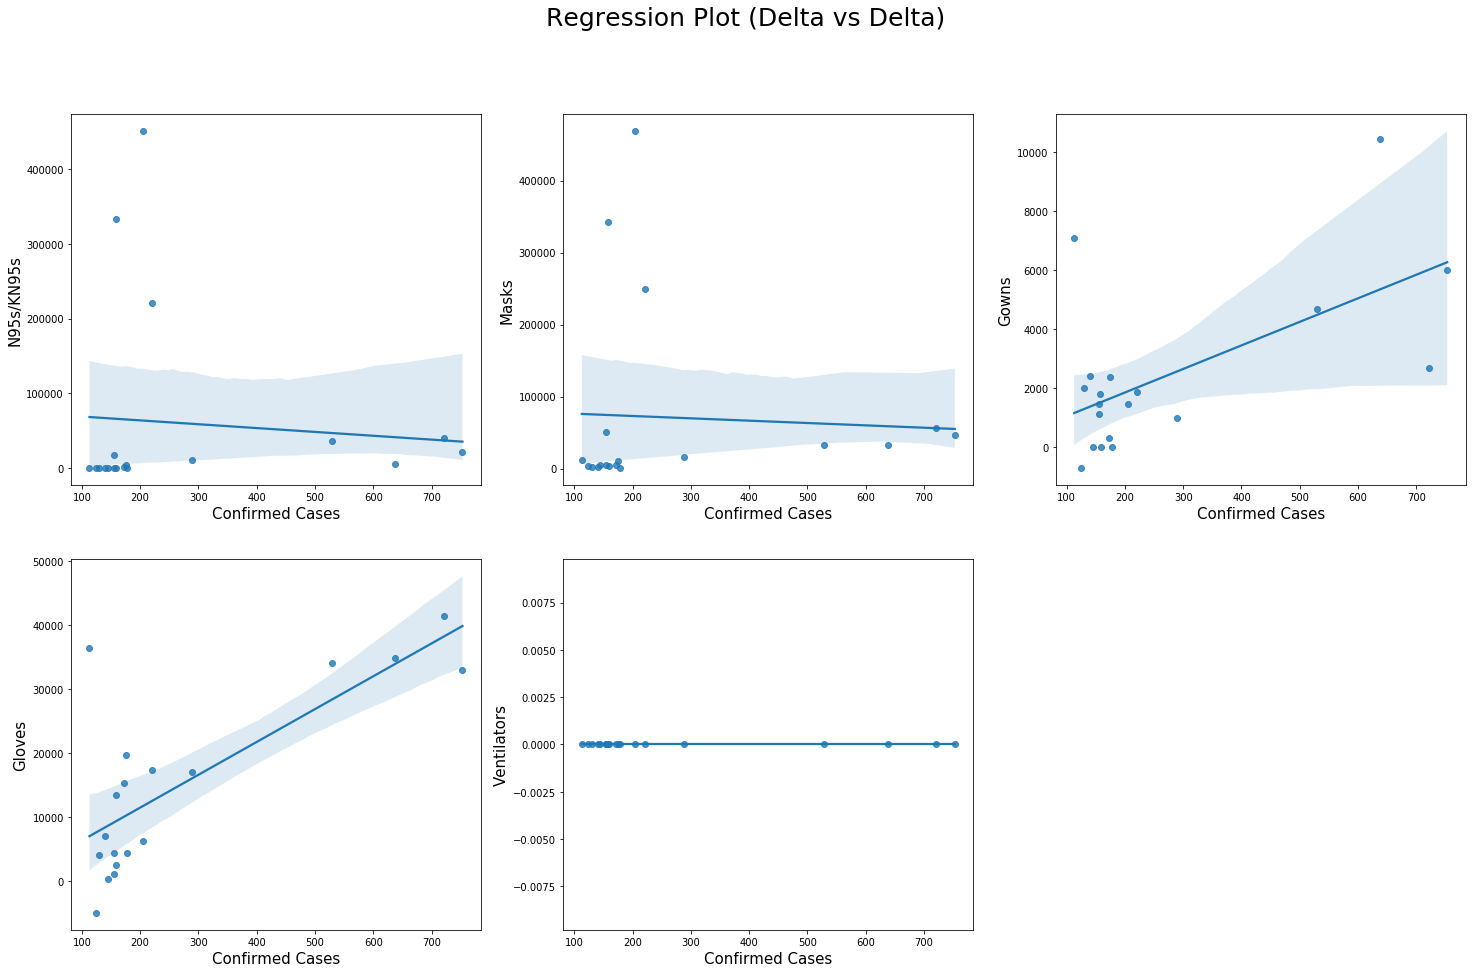

In [37]:
for category in categories:
    WM_CC['{} delta'.format(category)] = WM_CC[category].diff()
    WM_CC['Confirmed Cases delta'] = WM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=WM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=WM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [38]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = WM_CC[category]
    X[categories.index(category)] = WM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     27.87
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           5.10e-05
Time:                        20:58:36   Log-Likelihood:                -280.74
No. Observations:                  20   AIC:                             565.5
Df Residuals:                      18   BIC:                             567.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.672e+06   4.41e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Massachusetts

In [39]:
MA_CC = df.loc[df['Region']=='Massachusetts'].dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    MA_CC['{} %'.format(category)] = MA_CC[category]/MA_CC[category].iloc[-1] * 100
    
# fig, axes = plt.subplots(2, 3, figsize=(25,15))
# for ax, category in zip(axes.flatten(), categories):
#     sns.distplot(MA_CC[category].diff(), ax=ax)
#     ax.set_xlabel(category, fontsize=15)
# fig.delaxes(axes[1,2])
MA_CC

Time         Region  N95s/KN95s       Masks     Gowns      Gloves  \
308 2020-04-29  Massachusetts    990826.0   1863412.0  285795.0   3987284.0   
315 2020-05-06  Massachusetts   1246197.0   2290427.0  340057.0   5273534.0   
322 2020-05-13  Massachusetts   1385499.0   2744148.0  411454.0   6083122.0   
329 2020-05-20  Massachusetts   1481001.0   2951030.0  476763.0   6643694.0   
336 2020-05-27  Massachusetts   1713615.0   3154780.0  576570.0   7097694.0   
337 2020-06-03  Massachusetts   1784126.0   3290580.0  608770.0   7618366.0   
338 2020-06-10  Massachusetts   2544530.0   3469230.0  638660.0   7888596.0   
339 2020-06-17  Massachusetts   2556595.0   3434680.0  647490.0   7839666.0   
340 2020-06-24  Massachusetts   4388525.0   3538480.0  666890.0   8271946.0   
341 2020-07-01  Massachusetts   4409365.0   4007230.0  678510.0   8867546.0   
342 2020-07-08  Massachusetts   4437140.0   4041230.0  691495.0   8922946.0   
343 2020-07-15  Massachusetts   4530795.0   4689430.0  705322.0   9469546.0   
344 2020-07-22  Massachusetts   7447255.0   6733830.0  714422.0   9590446.0   
345 2020-07-29  Massachusetts   8923945.0  10001695.0  726012.0   9906079.0   
346 2020-08-05  Massachusetts   9292070.0  10451295.0  734962.0   9971377.0   
347 2020-08-12  Massachusetts  10476785.0  11665045.0  736612.0  10116833.0   
348 2020-08-19  Massachusetts  11161755.0  12488545.0  742512.0  10422377.0   
349 2020-08-26  Massachusetts  11192185.0  12525245.0  747887.0  10502349.0   
350 2020-09-02  Massachusetts  11194995.0  12544695.0  752587.0  10527949.0   
351 2020-09-09  Massachusetts  11206955.0  12547295.0  756087.0  10546549.0   

     Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
308        675.0          60265.0      8.841171   14.851105   37.799222   
315        675.0          72025.0     11.119854   18.254349   44.975909   
322        675.0          80497.0     12.362850   21.870435   54.418870   
329        675.0          88970.0     13.215017   23.519253   63.056632   
336        679.0          94220.0     15.290639   25.143109   76.257097   
337        679.0          97964.0     15.919811   26.225414   80.515867   
338        679.0         100158.0     22.704919   27.649226   84.469115   
339        679.0         101654.0     22.812575   27.373868   85.636970   
340        679.0         102762.0     39.158942   28.201138   88.202813   
341        679.0         103858.0     39.344898   31.937003   89.739673   
342        679.0         104961.0     39.592735   32.207978   91.457068   
343        679.0         106128.0     40.428421   37.374032   93.285826   
344        679.0         107413.0     66.452083   53.667583   94.489391   
345        679.0         109096.0     79.628632   79.711962   96.022283   
346        679.0         111371.0     82.913423   83.295204   97.206009   
347        679.0         113198.0     93.484671   92.968604   97.424238   
348        679.0         115048.0     99.596679   99.531772   98.204572   
349        679.0         117085.0     99.868207   99.824265   98.915469   
350        679.0         119426.0     99.893281   99.979278   99.537090   
351        679.0         121396.0    100.000000  100.000000  100.000000   

       Gloves %  Ventilators %  
308   37.806528      99.410898  
315   50.002461      99.410898  
322   57.678791      99.410898  
329   62.994009      99.410898  
336   67.298734     100.000000  
337   72.235629     100.000000  
338   74.797889     100.000000  
339   74.333946     100.000000  
340   78.432727     100.000000  
341   84.080072     100.000000  
342   84.605362     100.000000  
343   89.788100     100.000000  
344   90.934447     100.000000  
345   93.927208     100.000000  
346   94.546349     100.000000  
347   95.925530     100.000000  
348   98.822629     100.000000  
349   99.580906     100.000000  
350   99.823639     100.000000  
351  100.000000     100.000000

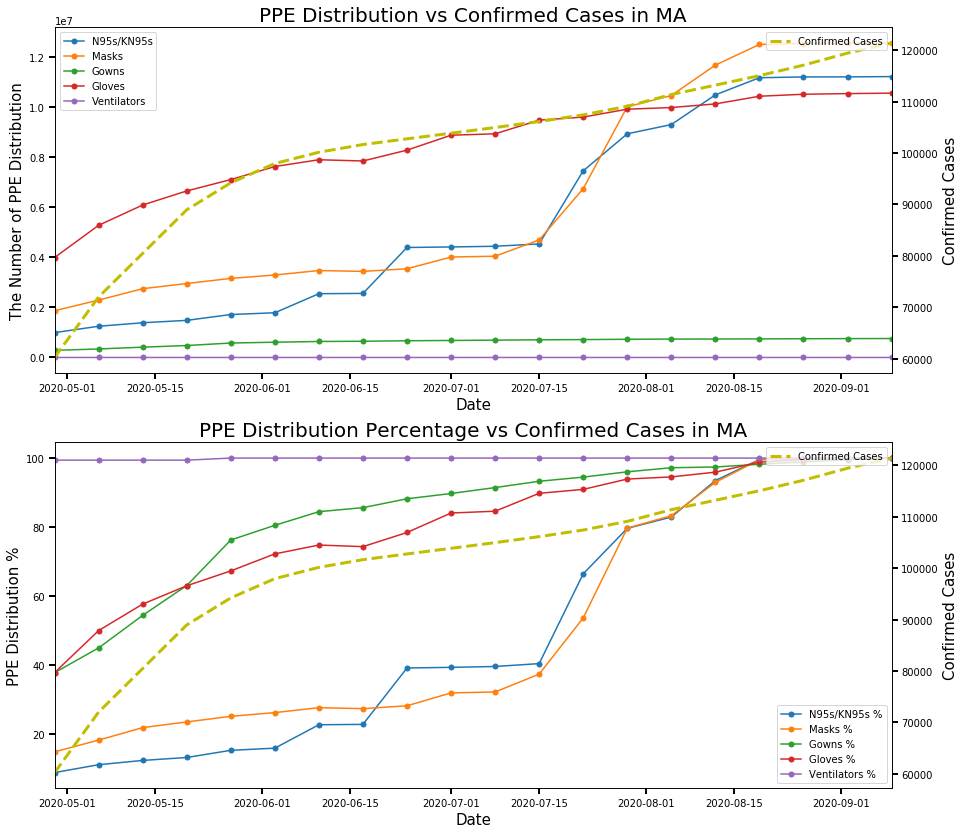

In [40]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=MA_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in MA', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=MA_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=MA_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in MA', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=MA_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [41]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    MA_CC['{} Ratio 1'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
MA_CC['Confirmed Cases(ma1)'] = MA_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
MA_CC.iloc[0,-1] = (42944+60265) / 2
for category in categories:
    MA_CC['{} Ratio 2'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
MA_CC['Confirmed Cases(ma2)'] = MA_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    MA_CC['{} Ratio 3'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
MA_CC['Confirmed Cases(ma3)'] = MA_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
MA_CC.iloc[0,-1] = (42944+60265+72025)/3
for category in categories:
    MA_CC['{} Ratio 4'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    MA_CC['{} Ratio 5'.format(category)] = MA_CC[category].diff()/MA_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    MA_CC['{} Ratio 6'.format(category)] = MA_CC[category].diff()/MA_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
MA_CC

Time         Region  N95s/KN95s       Masks     Gowns      Gloves  \
308 2020-04-29  Massachusetts    990826.0   1863412.0  285795.0   3987284.0   
315 2020-05-06  Massachusetts   1246197.0   2290427.0  340057.0   5273534.0   
322 2020-05-13  Massachusetts   1385499.0   2744148.0  411454.0   6083122.0   
329 2020-05-20  Massachusetts   1481001.0   2951030.0  476763.0   6643694.0   
336 2020-05-27  Massachusetts   1713615.0   3154780.0  576570.0   7097694.0   
337 2020-06-03  Massachusetts   1784126.0   3290580.0  608770.0   7618366.0   
338 2020-06-10  Massachusetts   2544530.0   3469230.0  638660.0   7888596.0   
339 2020-06-17  Massachusetts   2556595.0   3434680.0  647490.0   7839666.0   
340 2020-06-24  Massachusetts   4388525.0   3538480.0  666890.0   8271946.0   
341 2020-07-01  Massachusetts   4409365.0   4007230.0  678510.0   8867546.0   
342 2020-07-08  Massachusetts   4437140.0   4041230.0  691495.0   8922946.0   
343 2020-07-15  Massachusetts   4530795.0   4689430.0  705322.0   9469546.0   
344 2020-07-22  Massachusetts   7447255.0   6733830.0  714422.0   9590446.0   
345 2020-07-29  Massachusetts   8923945.0  10001695.0  726012.0   9906079.0   
346 2020-08-05  Massachusetts   9292070.0  10451295.0  734962.0   9971377.0   
347 2020-08-12  Massachusetts  10476785.0  11665045.0  736612.0  10116833.0   
348 2020-08-19  Massachusetts  11161755.0  12488545.0  742512.0  10422377.0   
349 2020-08-26  Massachusetts  11192185.0  12525245.0  747887.0  10502349.0   
350 2020-09-02  Massachusetts  11194995.0  12544695.0  752587.0  10527949.0   
351 2020-09-09  Massachusetts  11206955.0  12547295.0  756087.0  10546549.0   

     Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
308        675.0          60265.0      8.841171   14.851105   37.799222   
315        675.0          72025.0     11.119854   18.254349   44.975909   
322        675.0          80497.0     12.362850   21.870435   54.418870   
329        675.0          88970.0     13.215017   23.519253   63.056632   
336        679.0          94220.0     15.290639   25.143109   76.257097   
337        679.0          97964.0     15.919811   26.225414   80.515867   
338        679.0         100158.0     22.704919   27.649226   84.469115   
339        679.0         101654.0     22.812575   27.373868   85.636970   
340        679.0         102762.0     39.158942   28.201138   88.202813   
341        679.0         103858.0     39.344898   31.937003   89.739673   
342        679.0         104961.0     39.592735   32.207978   91.457068   
343        679.0         106128.0     40.428421   37.374032   93.285826   
344        679.0         107413.0     66.452083   53.667583   94.489391   
345        679.0         109096.0     79.628632   79.711962   96.022283   
346        679.0         111371.0     82.913423   83.295204   97.206009   
347        679.0         113198.0     93.484671   92.968604   97.424238   
348        679.0         115048.0     99.596679   99.531772   98.204572   
349        679.0         117085.0     99.868207   99.824265   98.915469   
350        679.0         119426.0     99.893281   99.979278   99.537090   
351        679.0         121396.0    100.000000  100.000000  100.000000   

       Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
308   37.806528      99.410898           16.441152      30.920302   
315   50.002461      99.410898           17.302284      31.800444   
322   57.678791      99.410898           17.211809      34.090065   
329   62.994009      99.410898           16.646072      33.168821   
336   67.298734     100.000000           18.187381      33.483125   
337   72.235629     100.000000           18.212057      33.589686   
338   74.797889     100.000000           25.405160      34.637573   
339   74.333946     100.000000           25.149970      33.787947   
340   78.432727     100.000000           42.705718      34.433740   
341   84.080072     100.000000           42.455709      38.583739   
342   84.605362

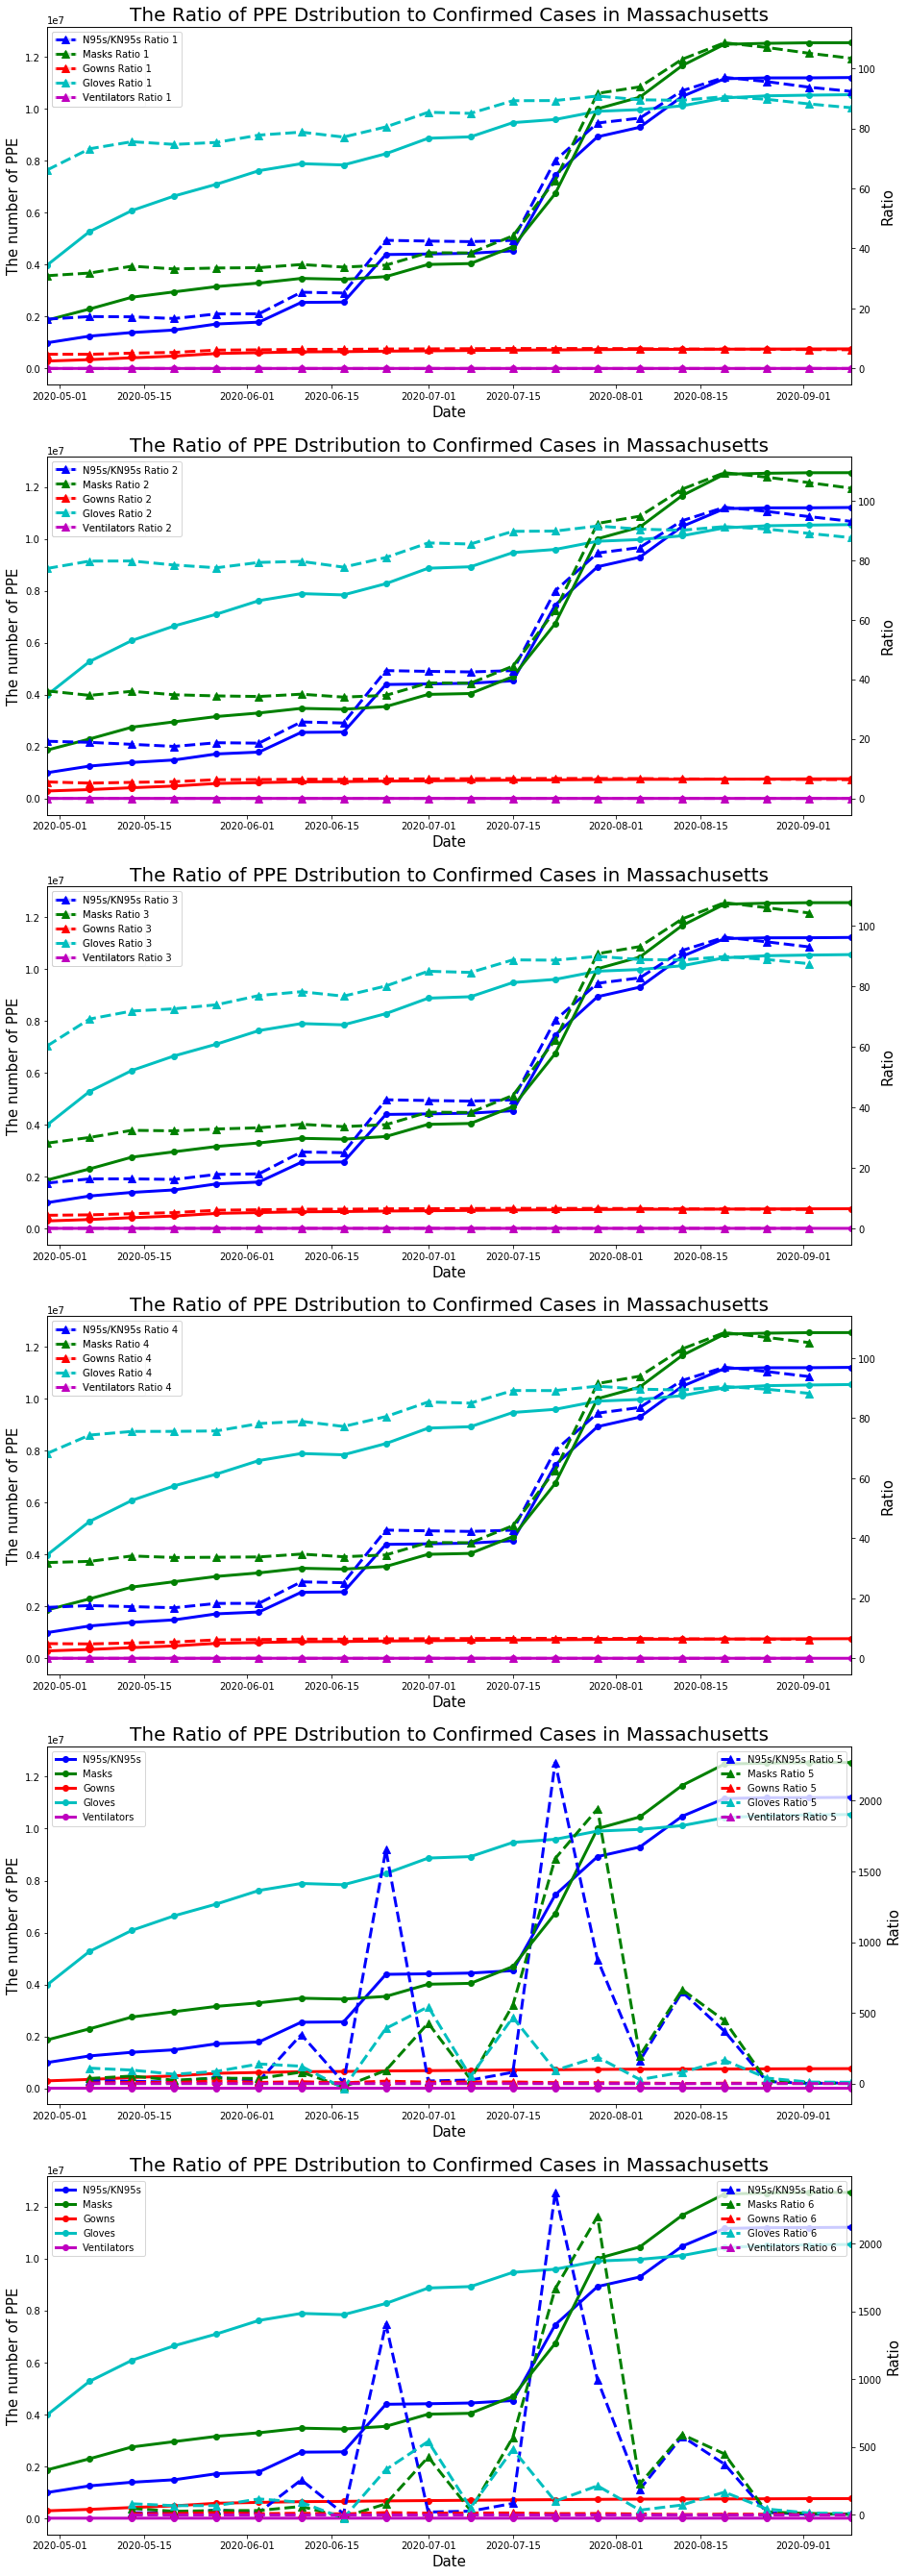

In [42]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=MA_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=MA_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

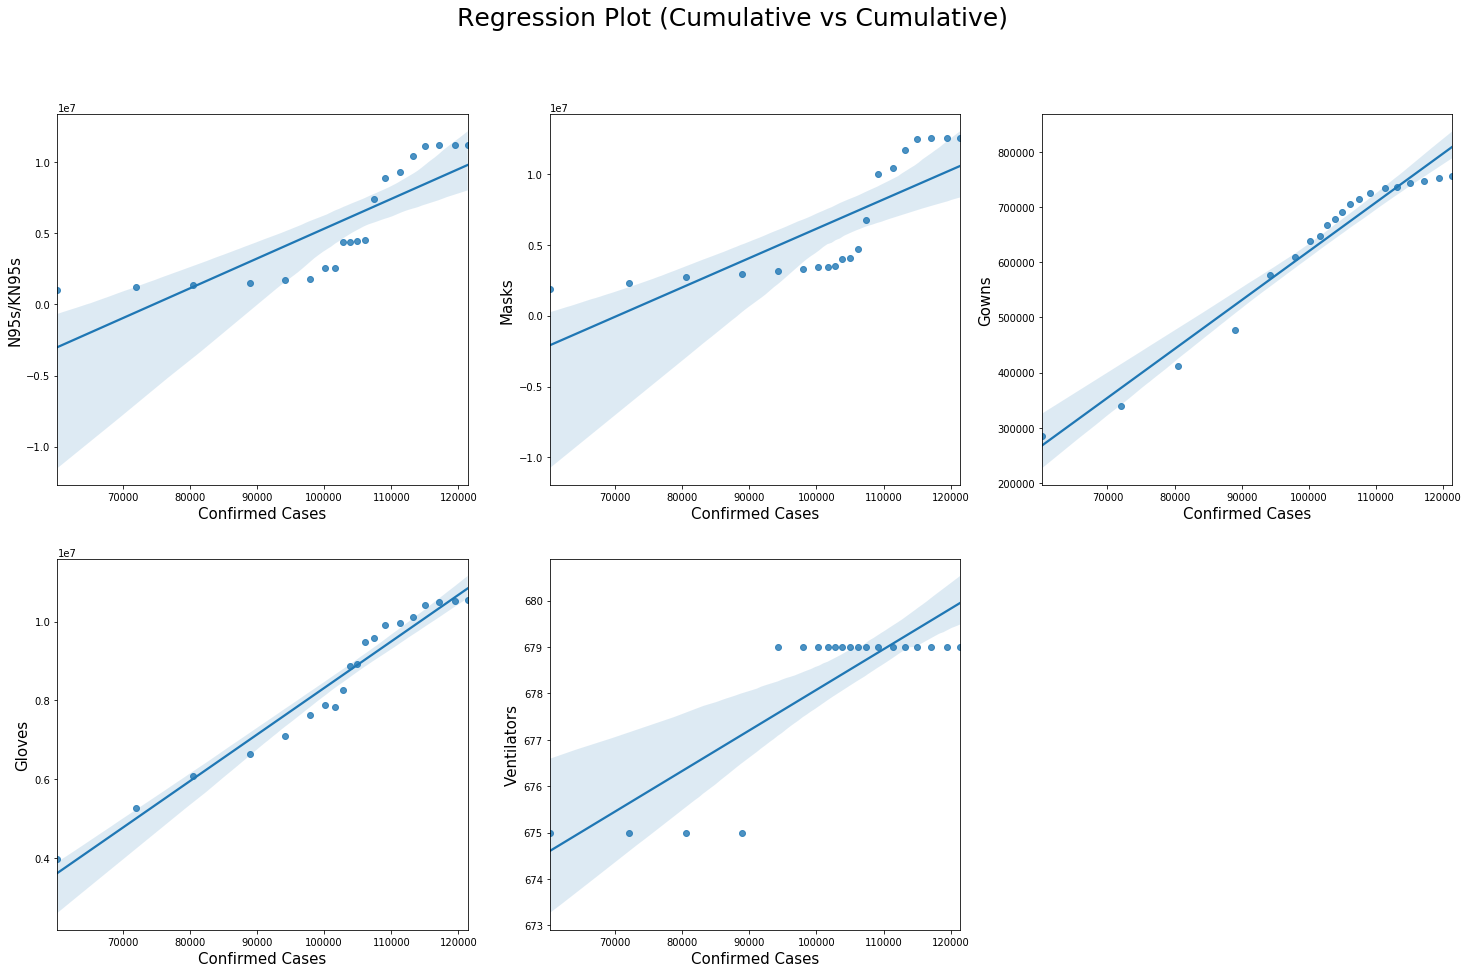

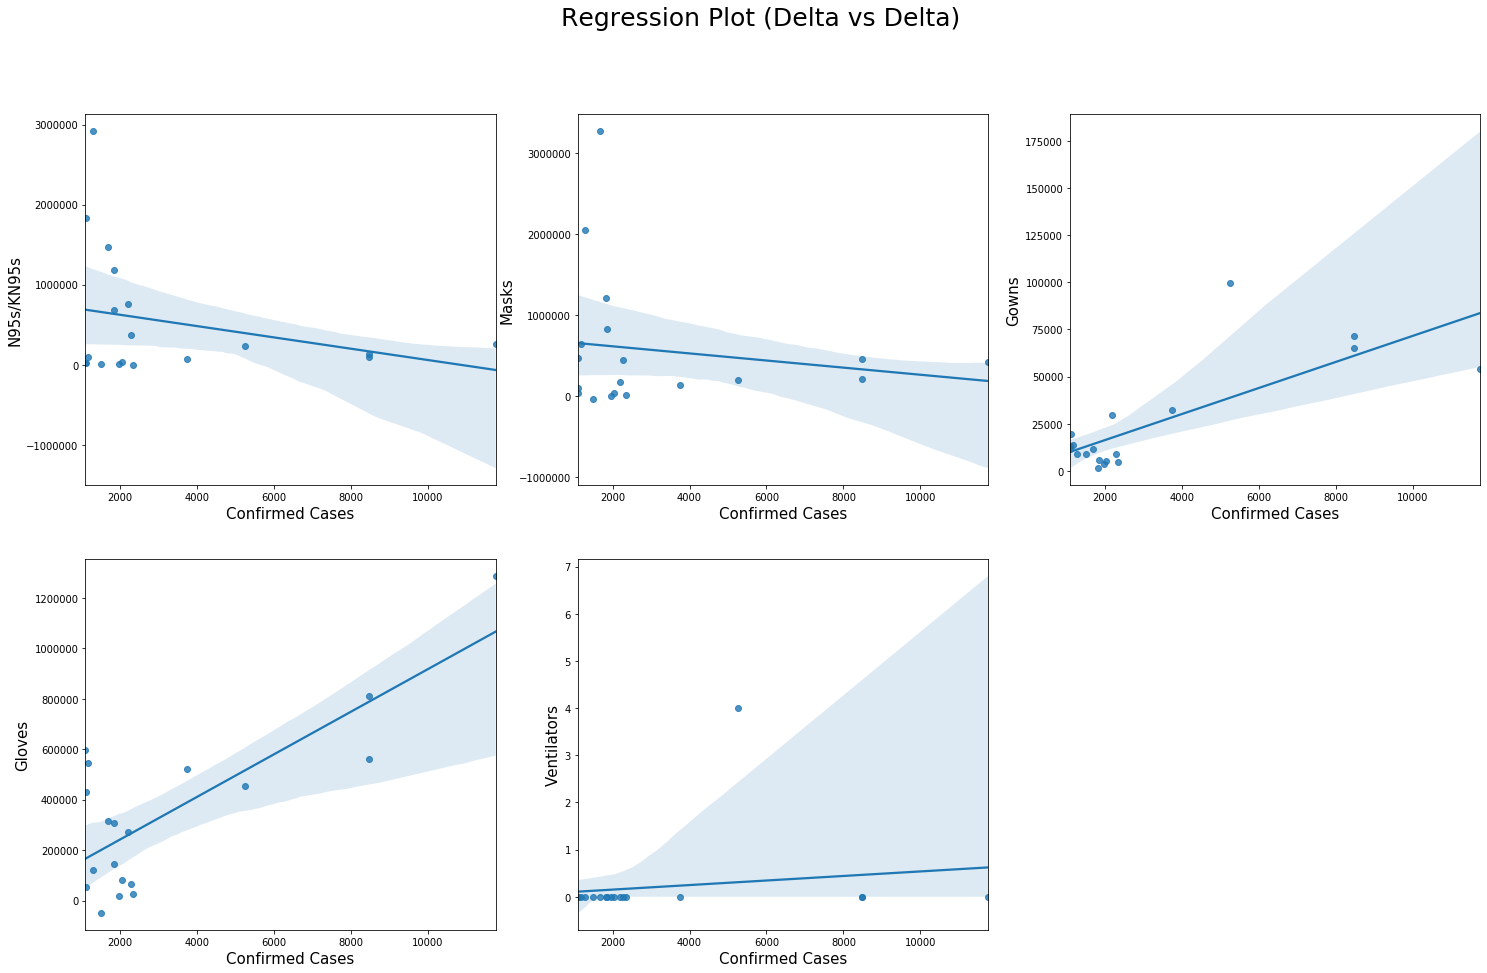

In [43]:
for category in categories:
    MA_CC['{} delta'.format(category)] = MA_CC[category].diff()
    MA_CC['Confirmed Cases delta'] = MA_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=MA_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=MA_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [44]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = MA_CC[category]
    X[categories.index(category)] = MA_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     38.74
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           7.15e-06
Time:                        20:58:41   Log-Likelihood:                -320.47
No. Observations:                  20   AIC:                             644.9
Df Residuals:                      18   BIC:                             646.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.563e+07   3.45e+06     